# Lito - Case

<img align="left" width="80" height="200" src="https://img.shields.io/badge/python-v3.6-blue.svg">
<br>

## Table of contents

1. [Import Libraries and Data](#Import-Libraries-and-Data)
4. [Data Cleaning](#Data-Cleaning)
5. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Features Through Time](#Features-Through-Time)


## Import Libraries and Data
[[go back to the top]](#Table-of-contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
import seaborn as sns; sns.set(rc={'figure.figsize':(16,9)})
import itertools, math, warnings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set(color_codes=True)
plt.style.use('seaborn')
warnings.filterwarnings("ignore")
%matplotlib inline
%autosave 30

Autosaving every 30 seconds


In [2]:
PATH = 'data/orders-6-months-clean.csv'
df = pd.read_csv(PATH)
print('(number of observations, number of features) =', df.shape)

(number of observations, number of features) = (18913, 22)


In [3]:
num = 3
print('First {} rows:\n'.format(num))
df.head(num)
print('Last {} rows:\n'.format(num))
df.tail(num)

First 3 rows:



Origin Sequence         Creation Date Client Document State  \
0  B2C Channel   614743  2018-02-28 02:01:51Z     XYA87A9X7YX    RJ   
1  B2C Channel   614743  2018-02-28 02:01:51Z     XYA87A9X7YX    RJ   
2  B2C Channel   614746  2018-02-28 02:09:26Z     XYA87A9X7YX    RJ   

              City  Neighborhood Carrier Delivery Deadline    Status  \
0  Duque de Caxias  Parque Duque     Pac              12bd  Canceled   
1  Duque de Caxias  Parque Duque     Pac              12bd  Canceled   
2  Duque de Caxias  Parque Duque     Pac              12bd  Canceled   

        Utmi Payment System Name Installments  ID_SKU Category Ids Sku  \
0   -  -  -                 Visa            5  126755           /3/42/   
1   -  -  -                 Visa            5  116363           /3/36/   
2   -  -  -                 Visa            5  126755           /3/42/   

  SKU Value SKU Selling Price SKU Total Price  Shipping List Price  \
0       199               199             199                  9.3   
1       239               239             239                  9.3   
2       199               199             199                  9.3   

   Shipping Value  Total Value  Discounts Totals  
0             0.0        438.0               0.0  
1             0.0        438.0               0.0  
2             0.0        438.0               0.0

Last 3 rows:



Origin Sequence         Creation Date Client Document State  \
18910  B2C Channel   658042  2018-08-30 19:50:37Z      8570203748    RJ   
18911  B2C Channel   658045  2018-08-30 19:55:28Z     15506641745    RJ   
18912  B2C Channel   658045  2018-08-30 19:55:28Z     15506641745    RJ   

                 City Neighborhood                     Carrier  \
18910     Teres�polis       V�rzea              Transportadora   
18911  Rio de Janeiro     Botafogo  Retirada em Loja (18fd71a)   
18912  Rio de Janeiro     Botafogo  Retirada em Loja (18fd71a)   

      Delivery Deadline           Status                     Utmi  \
18910               8bd  Payment pending  cpc - google -  - brand   
18911               6bd  Payment pending                 -  -  -    
18912               6bd  Payment pending                 -  -  -    

      Payment System Name Installments  ID_SKU Category Ids Sku SKU Value  \
18910          Mastercard            4  131834           /3/35/       199   
18911          Mastercard            5  131837           /3/35/       199   
18912          Mastercard            5  131434              /3/       159   

      SKU Selling Price SKU Total Price  Shipping List Price  Shipping Value  \
18910               199             199                26.58           26.58   
18911               199             199                 0.00            0.00   
18912               159             159                 0.00            0.00   

       Total Value  Discounts Totals  
18910       225.58               0.0  
18911       358.00               0.0  
18912       358.00               0.0

## Data Cleaning
[[go back to the top]](#Table-of-contents)

### Drop `NaNs`

In [4]:
df.dropna(inplace=True)

### Tidying up the names of the columns:

In [5]:
df.columns = [col.lower().replace('-','_').replace(' ','_') 
              for col in df.columns]

### Types of `status` 

In [6]:
df['status'].value_counts()

Invoiced              11939
Canceled               5685
Ready for shipping      378
Payment pending         111
Name: status, dtype: int64

### Dropping the canceled orders and reseting the indexes

In [7]:
df = df[df.status != 'Canceled'].copy()
df.reset_index(inplace=True, drop=True)

### Checking data types

In [8]:
df.head(num-2)

origin sequence         creation_date client_document state  \
0  B2C Channel   614845  2018-02-28 16:52:40Z     X0AX9YK97K0    RJ   

             city  neighborhood carrier delivery_deadline    status  \
0  Rio de Janeiro  Campo Grande   Sedex               4bd  Invoiced   

        utmi payment_system_name installments  id_sku category_ids_sku  \
0   -  -  -           Mastercard            4  123911           /3/39/   

  sku_value sku_selling_price sku_total_price  shipping_list_price  \
0       239               239             239                12.78   

   shipping_value  total_value  discounts_totals  
0             0.0        239.0               0.0

We see below that there is something wrong with:
- installments
- sku_value
- sku_selling_price
- sku_total_price 

since they should be integers or floats and are, instead, objects.

In [9]:
df.dtypes

origin                  object
sequence                object
creation_date           object
client_document         object
state                   object
city                    object
neighborhood            object
carrier                 object
delivery_deadline       object
status                  object
utmi                    object
payment_system_name     object
installments            object
id_sku                  object
category_ids_sku        object
sku_value               object
sku_selling_price       object
sku_total_price         object
shipping_list_price    float64
shipping_value         float64
total_value            float64
discounts_totals       float64
dtype: object

### Let us convert them into numerical variables

In [10]:
cols = ['installments', 'sku_value', 
        'sku_selling_price', 'sku_total_price']

df[cols] = df[cols].apply(pd.to_numeric)

### Note that `city` for example, has different entries corresponding to the same entity

See for example `BARRA MANSA` and `Barra Mansa`. We can solve this specific issue by removing problematic characters. This is a temporary solution.

In [11]:
print('Cities:\n')
pd.Series(df.city.unique()).sort_values().iloc[38:51].to_frame(name='Cities')

Cities:



Cities
470         BARRA MANSA
206            BARRINHA
359        BELFORD ROXO
275            BLUMENAU
14             BRAS�LIA
513                Bag�
309  Balne�rio Cambori�
266             Bananal
7             Barbacena
182            Barbalha
452              Bariri
459        Barra Bonita
21          Barra Mansa

In [12]:
cols = ['state','city','neighborhood',
        'carrier','status','payment_system_name']
df[cols] = df[cols].apply(lambda x: x.str.lower())

In [13]:
import unidecode

for col in cols:
    df[col] = [unidecode.unidecode(str(row)) for row in df[col]]

### The `origin` column has problems as well

In [14]:
df['origin'].value_counts()

B2C Channel                                                12375
Marketplace                                                   49
Vtex.Commerce.Oms.Helper.ReadWriteCsv+CsvRowB2C Channel        4
Name: origin, dtype: int64

In [15]:
df['origin'].replace('Vtex.Commerce.Oms.Helper.ReadWriteCsv+CsvRowB2C Channel',
                     'B2C Channel', inplace=True)

In [16]:
df['origin'].value_counts()

B2C Channel    12379
Marketplace       49
Name: origin, dtype: int64

### Number of unique clients

In [17]:
df['client_document'].nunique()

6295

In [18]:
cols = ['origin', 'client_document', 'state', 'city', 
        'neighborhood', 'status', 'payment_system_name']

for col in cols:
    print(col,':', df[col].nunique())

origin : 2
client_document : 6295
state : 27
city : 505
neighborhood : 1527
status : 3
payment_system_name : 9


### Checking memory usage

Checking memory usage is useful when `pandas` is dealing with very large datasets. This dataset is not particularly large but I will optimize it anyway and use the same code in the second part of the challenge.

Below, choosing the parameter `deep` in the method `info()` provides more [accuracy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html).

In [19]:
df.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12428 entries, 0 to 12427
Data columns (total 22 columns):
origin                 12428 non-null object
sequence               12428 non-null object
creation_date          12428 non-null object
client_document        12428 non-null object
state                  12428 non-null object
city                   12428 non-null object
neighborhood           12428 non-null object
carrier                12428 non-null object
delivery_deadline      12428 non-null object
status                 12428 non-null object
utmi                   12428 non-null object
payment_system_name    12428 non-null object
installments           12428 non-null int64
id_sku                 12428 non-null object
category_ids_sku       12428 non-null object
sku_value              12428 non-null float64
sku_selling_price      12428 non-null float64
sku_total_price        12428 non-null float64
shipping_list_price    12428 non-null float64
shipping_value         12428 non-

### Reducing memory usage

Though the dataframe's memory usage is relatively low, it can be reduced. We can use a [function](https://www.dataquest.io/blog/pandas-big-data/) to memory reducing.
Let us use a [function](https://www.dataquest.io/blog/pandas-big-data/) for that which assumes the input to be a `Dataframe`.

In [20]:
def compute_memory(x):
    usage_mb = x.memory_usage(deep=True).sum()/(1024 ** 2 ) 
    return "Total usage is {} MB".format(usage_mb)

### Downcasting to float32

In [21]:
df_floats = df.select_dtypes(include=['float'])
converted_float = df_floats.apply(pd.to_numeric, downcast='float')
compare_floats = pd.concat([df_floats.dtypes, converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.head()

before    after
sku_value            float64  float32
sku_selling_price    float64  float32
sku_total_price      float64  float32
shipping_list_price  float64  float32
shipping_value       float64  float32

### Checking the memory gain:

In [22]:
optimized_df = df.copy()
optimized_df[converted_float.columns] = converted_float
df = optimized_df.copy()
df.info(memory_usage='deep')

df.to_csv('df_clean.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12428 entries, 0 to 12427
Data columns (total 22 columns):
origin                 12428 non-null object
sequence               12428 non-null object
creation_date          12428 non-null object
client_document        12428 non-null object
state                  12428 non-null object
city                   12428 non-null object
neighborhood           12428 non-null object
carrier                12428 non-null object
delivery_deadline      12428 non-null object
status                 12428 non-null object
utmi                   12428 non-null object
payment_system_name    12428 non-null object
installments           12428 non-null int64
id_sku                 12428 non-null object
category_ids_sku       12428 non-null object
sku_value              12428 non-null float32
sku_selling_price      12428 non-null float32
sku_total_price        12428 non-null float32
shipping_list_price    12428 non-null float32
shipping_value         12428 non-

In [23]:
df = pd.read_csv('df_clean.csv')
df = df.iloc[:,1:]
df.head()

origin  sequence         creation_date client_document state  \
0  B2C Channel    614845  2018-02-28 16:52:40Z     X0AX9YK97K0    rj   
1  B2C Channel    614737  2018-02-28 01:09:59Z     X0YKY79YK0K    mg   
2  B2C Channel    614752  2018-02-28 02:29:28Z     XBY0YBXA709    rj   
3  B2C Channel    614752  2018-02-28 02:29:28Z     XBY0YBXA709    rj   
4  B2C Channel    614752  2018-02-28 02:29:28Z     XBY0YBXA709    rj   

             city  neighborhood      carrier delivery_deadline  \
0  rio de janeiro  campo grande        sedex               4bd   
1       carangola   santa maria        sedex               6bd   
2  rio de janeiro       maracan  ciclo verde               2bd   
3  rio de janeiro       maracan  ciclo verde               2bd   
4  rio de janeiro       maracan  ciclo verde               2bd   

               status       utmi payment_system_name  installments  id_sku  \
0            invoiced   -  -  -           mastercard             4  123911   
1            invoiced   -  -  -           mastercard             4  116363   
2  ready for shipping   -  -  -           mastercard             5  122075   
3  ready for shipping   -  -  -           mastercard             5  126811   
4  ready for shipping   -  -  -           mastercard             5  122038   

  category_ids_sku  sku_value  sku_selling_price  sku_total_price  \
0           /3/39/      239.0              239.0            239.0   
1           /3/36/      239.0              239.0            239.0   
2           /3/42/      199.0              159.2            199.0   
3           /3/39/      199.0              159.2            199.0   
4         /1/6/28/       99.0               79.2             99.0   

   shipping_list_price  shipping_value  total_value  discounts_totals  
0                12.78             0.0        239.0               0.0  
1                41.35             0.0        239.0               0.0  
2                 4.22             0.0        397.6             -99.4  
3                 4.24             0.0        397.6             -99.4  
4                 1.52             0.0        397.6             -99.4

## Exploratory Data Analysis 
[[go back to the top]](#Table-of-contents)

In [24]:
cols = ['sequence','installments', 'id_sku', 
        'category_ids_sku', 'sku_value', 'sku_selling_price', 'sku_total_price', 
        'shipping_list_price', 'shipping_value', 'total_value', 'discounts_totals']

### The column  `sequence` defines an order, which may contain several SKUs

In [25]:
data = df[['client_document','state',
           'city','neighborhood',
           'sequence', 'total_value']]

df1 = data.copy()

df1 = df1['total_value'].groupby(df1['client_document']).sum()
df1 = df1.sort_values(ascending=False)
df1 = df1.to_frame(name='total_value_per_client')
df1.head()

total_value_per_client
client_document                        
7213315722                     81871.95
4333596173                     60044.40
AB0870YB888                    35190.54
5368706758                     29216.20
5129001320                     26117.60

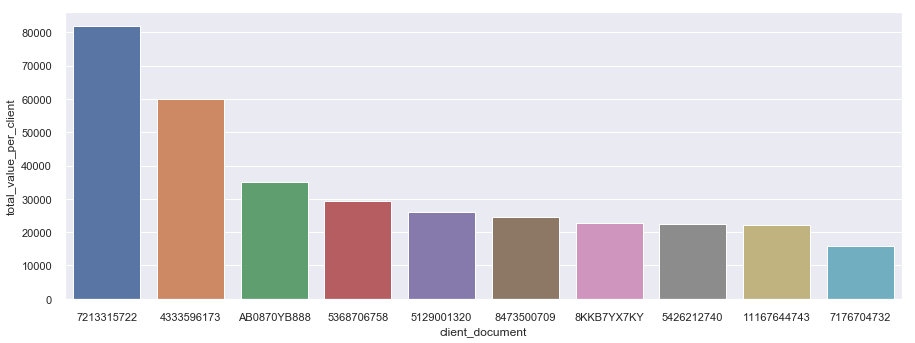

In [26]:
df1['client_document'] = df1.index
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5.27)})
ax = sns.barplot(x="client_document", y="total_value_per_client", data=df1.iloc[:10,:])

In [27]:
df2 = data.copy()

df2 = df2['total_value'].groupby(df2['neighborhood']).sum()
df2 = df2.sort_values(ascending=False).to_frame(name='total_value_per_neighborhood')
df2.head()
df2['neighborhood'] = df2.index

total_value_per_neighborhood
neighborhood                               
centro                            477544.61
tijuca                            143773.29
cachambi                          134236.70
santos dumont                     107832.84
botafogo                           96018.67

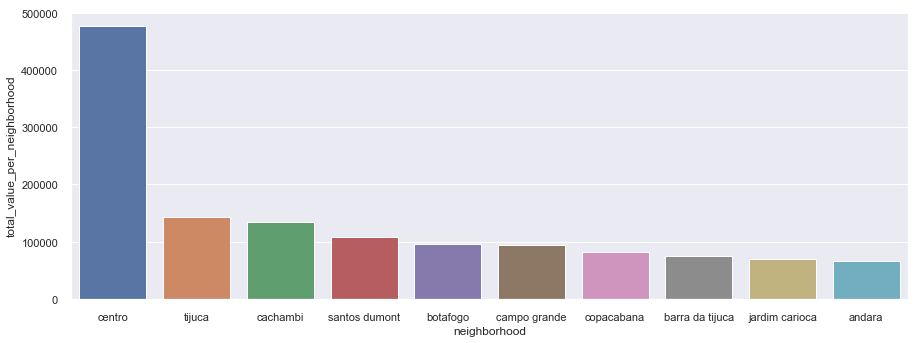

In [28]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5.27)})
ax = sns.barplot(x="neighborhood", y="total_value_per_neighborhood", data=df2.iloc[:10,:],orient='v')

In [29]:
df4 = data.copy()

df4 = df4['total_value'].groupby(df4['state']).sum()
df4 = df4.sort_values(ascending=False).to_frame(name='total_value_per_state')
df4.head()
df4['state'] = df4.index

total_value_per_state
state                       
rj                2513766.97
sp                 353627.61
mg                 255238.78
se                 203092.41
pa                 145371.40

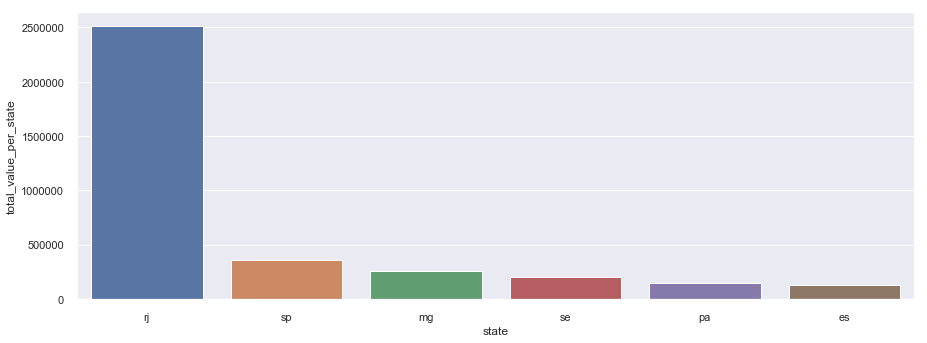

In [30]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5.27)})
ax = sns.barplot(x="state", y="total_value_per_state", data=df4.iloc[:6,:])

In [31]:
df5 = data.copy()
df5 = df5['total_value'].groupby(df5['city']).sum()
df5 = df5.sort_values(ascending=False).to_frame(name='total_value_per_city')
df5.head()
df5.shape
df5['city'] = df5.index

total_value_per_city
city                                 
rio de janeiro             1686175.25
aracaju                     201882.48
so paulo                    185235.12
nova iguau                  140898.18
duque de caxias             129231.78

(505, 1)

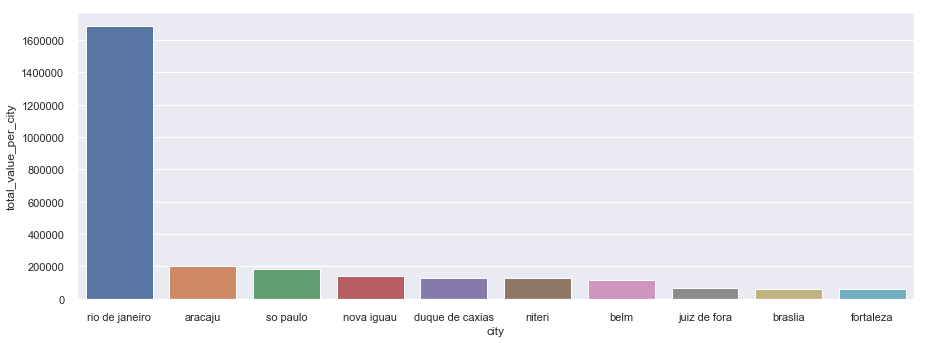

In [32]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5.27)})
ax = sns.barplot(x="city", y="total_value_per_city", data=df5.iloc[:10,:])

### Excluding `rio de janeiro`

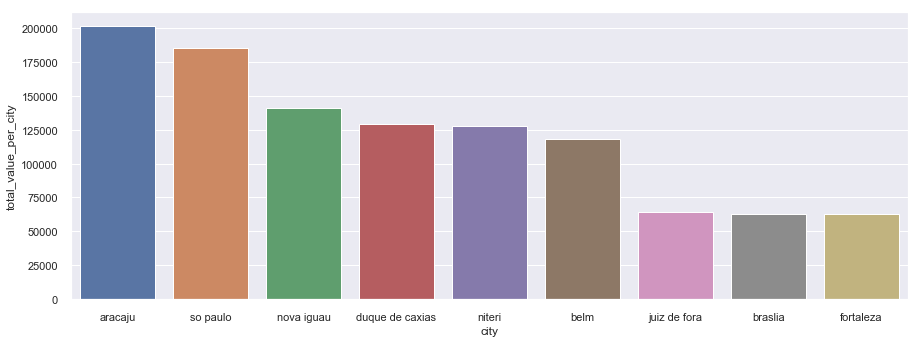

In [33]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5.27)})
ax = sns.barplot(x="city", y="total_value_per_city", data=df5.iloc[1:10,:])

### Total value per `sequence` i.e. per purchase 

In [34]:
df1 = data.copy()

df1 = df1['total_value'].groupby(df1['sequence']).sum()
df1 = df1.to_frame(name='total_value_per_purchase')
df1['sequence'] = df1.index
df1['sequence'] = [str(x) for x in df1['sequence']]
df1.dtypes
df2 = pd.DataFrame()

df2 = pd.DataFrame(columns=['sequence', 'total_value_per_purchase'])
df2['sequence'] = df1.index
df2['total_value_per_purchase'] = list(df1['total_value_per_purchase'])
df2 = df2.sort_values(by='total_value_per_purchase', ascending=False)
df2.reset_index(inplace=True, drop=True)
df2['purchase'] = df2.index
df2.head()

total_value_per_purchase    float64
sequence                     object
dtype: object

sequence  total_value_per_purchase  purchase
0    653493                  81871.95         0
1    624290                  46184.40         1
2    622809                  35190.54         2
3    644022                  29216.20         3
4    643430                  24650.88         4

### Dictionary

In [35]:
dictionary = df2[['purchase', 'sequence']].copy()
dictionary.head()

purchase  sequence
0         0    653493
1         1    624290
2         2    622809
3         3    644022
4         4    643430

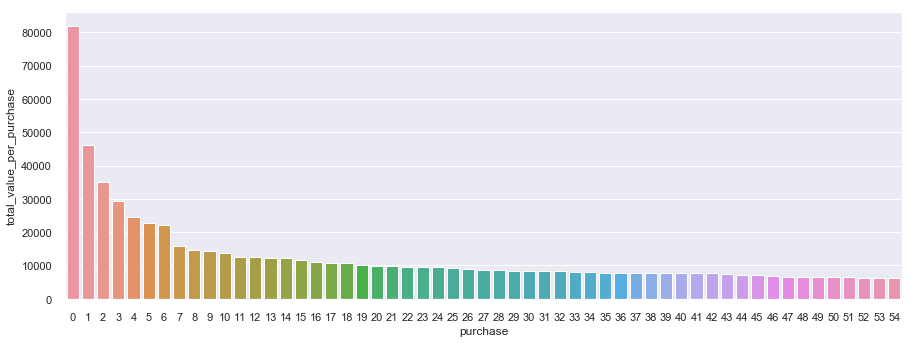

In [42]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5.27)})
ax = sns.barplot(x="purchase", y="total_value_per_purchase", data=df2.iloc[:55,:])

### Example of a purchase event involving several SKUs

The total purchase is defined by the `sequence` and the products are defined by `id_sku`. Note that the `creation_dates` are the same and are in match 1-1 with the` sequences`. Note also that sometimes two `sequences` are essentially the same purchase since they are associated with the same client but and the `creation_dates` differ by a few minutes only.

Consider the client:

    doc = '5129001320'
    
for example.

In [36]:
cols = ['origin','sequence', 'installments', 'creation_date', 'id_sku', 'category_ids_sku', 'sku_value', 
        'sku_selling_price', 'sku_total_price', 'shipping_list_price', 
        'shipping_value', 'total_value', 'discounts_totals', ]

doc = '5129001320'

df[df['client_document'] == doc][cols].iloc[:5, :]

origin  sequence  installments         creation_date  id_sku  \
5181  B2C Channel    635283             5  2018-06-06 22:23:42Z  131436   
5182  B2C Channel    635283             5  2018-06-06 22:23:42Z  131485   
5183  B2C Channel    635283             5  2018-06-06 22:23:42Z  129067   
5184  B2C Channel    635283             5  2018-06-06 22:23:42Z  127646   
5185  B2C Channel    635283             5  2018-06-06 22:23:42Z  128064   

     category_ids_sku  sku_value  sku_selling_price  sku_total_price  \
5181              /3/      299.0              299.0            299.0   
5182         /1/6/28/      179.0              179.0            179.0   
5183         /1/6/28/      199.0              199.0            199.0   
5184         /1/6/28/      139.0              139.0            139.0   
5185         /1/6/28/       99.0               99.0             99.0   

      shipping_list_price  shipping_value  total_value  discounts_totals  
5181                14.88             0.0        915.0               0.0  
5182                 6.38             0.0        915.0               0.0  
5183                 5.32             0.0        915.0               0.0  
5184                 5.32             0.0        915.0               0.0  
5185                 5.32             0.0        915.0               0.0

Adding the sales prices of the skus of this purchase, given by the `sku_selling_price` column, we get the value that appears (repeated five times) in the `total_value` column.

In [37]:
df[df['client_document'] == doc][cols].iloc[:5, :]['sku_selling_price'].sum()

915.0

Similarly fixing the `sequence`:

In [38]:
seq = 635283
df1 = df[df['client_document'] == doc]
df1[df1.sequence == seq][cols].sku_selling_price.sum()

915.0

## Payment methods

In [39]:
psn = df['payment_system_name'].value_counts().to_frame(name='total')
psn['payment_system_name'] = psn.index

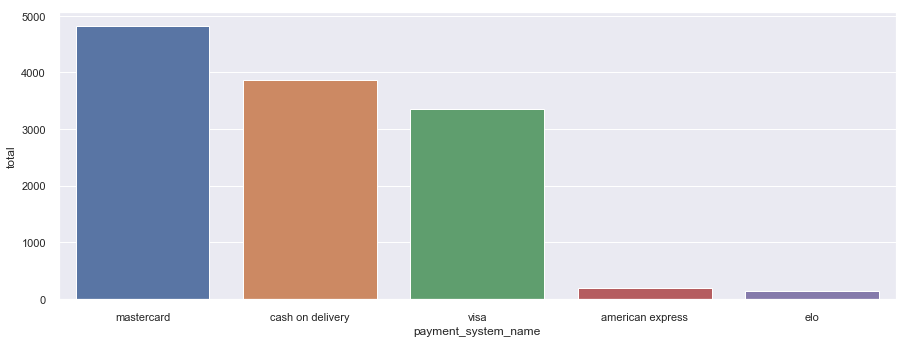

In [40]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5.27)})
ax = sns.barplot(x="payment_system_name", y="total", data=psn.iloc[:5,:])

### Clients

In [41]:
client_neigh = pd.Series(df['neighborhood'].groupby(df['client_document']).count())
client_neigh = client_neigh.sort_values(ascending=False)
client_neigh = client_neigh.to_frame(name='document')

client_neigh.sort_values(by='document', ascending=False).head()

document
client_document          
5129001320             43
4333596173             39
5032994642             35
11153171724            31
7213315722             23

### Combos

Take `sequence` 614752 for illustration:

In [53]:
row = 2
val = df.sequence.iloc[row]
seq = df.loc[df['sequence'] == val][['sequence', 'client_document',
                                     'id_sku', 'sku_selling_price',
                                     'total_value']]
seq

sequence client_document  id_sku  sku_selling_price  total_value
2    614752     XBY0YBXA709  122075              159.2        397.6
3    614752     XBY0YBXA709  126811              159.2        397.6
4    614752     XBY0YBXA709  122038               79.2        397.6

The bundle can be build as following:

In [95]:
cols = ['sequence', 'id_sku', 'total_value']


data= [seq.sequence.unique().tolist()[0], 
       seq.id_sku.unique().tolist(), 
       seq.total_value.unique().tolist()[0]]
print(data)

','.join([str(x) for x in data[1]])

[614752, [122075, 126811, 122038], 397.6]


'122075,126811,122038'

In [91]:
list(range(len(data[1])))

[0, 1, 2]

In [98]:
idx = list(range(len(data[1])))
seq = pd.DataFrame(
    {'sequence': data[0],
     'skus': ','.join([str(x) for x in data[1]]),
     'total_value': data[2]}, index=idx)

seq.iloc[0]

sequence                     614752
skus           122075,126811,122038
total_value                   397.6
Name: 0, dtype: object

### Generalizing

In [ ]:
cols = ['sequence', 'id_sku', 'total_value']

combos = pd.DataFrame(
    {'sequence': data[0],
     'skus': ','.join([str(x) for x in data[1]]),
     'total_value': data[2]}, index=idx)

combos = combos.iloc[0].to_frame(name='seq_{}'.format(str(combos.iloc[0,0])))

# combos

seqs = [combos.T]

for row in list(df.index):

    val = df.sequence.iloc[row]
    seq = df.loc[df.sequence == val][cols]
    cols = ['sequence', 'id_sku', 'total_value']
    
    data= [seq.sequence.unique().tolist()[0], 
           seq.id_sku.unique().tolist(), 
           seq.total_value.unique().tolist()[0]]

    idx = list(range(len(data[1])))
    seq = pd.DataFrame(
        {'sequence': data[0],
         'skus': ','.join([str(x) for x in data[1]]),
         'total_value': data[2]}, index=idx)
    
    print('seq:\n')
    
#     seq

    seq = seq.iloc[0].to_frame(name='seq_{}'.format(str(seq.iloc[0,0])))
    
    seqs.append(seq.T)
                        
                    
seqs[0]
seqs[1]

seq_614752
sequence                   614752
skus         122075,126811,122038
total_value                 397.6

seq:



sequence    skus  total_value
0    614845  123911        239.0

seq:



sequence    skus  total_value
0    614737  116363        239.0

seq:



sequence                  skus  total_value
0    614752  122075,126811,122038        397.6
1    614752  122075,126811,122038        397.6
2    614752  122075,126811,122038        397.6

seq:



sequence                  skus  total_value
0    614752  122075,126811,122038        397.6
1    614752  122075,126811,122038        397.6
2    614752  122075,126811,122038        397.6

seq:



sequence                  skus  total_value
0    614752  122075,126811,122038        397.6
1    614752  122075,126811,122038        397.6
2    614752  122075,126811,122038        397.6

seq:



sequence    skus  total_value
0    614887  122520       189.05

seq:



sequence    skus  total_value
0    614884  115042        89.28

seq:



sequence                 skus  total_value
0    614968  117117,113532,10251       196.94
1    614968  117117,113532,10251       196.94
2    614968  117117,113532,10251       196.94

seq:



sequence                 skus  total_value
0    614968  117117,113532,10251       196.94
1    614968  117117,113532,10251       196.94
2    614968  117117,113532,10251       196.94

seq:



sequence                 skus  total_value
0    614968  117117,113532,10251       196.94
1    614968  117117,113532,10251       196.94
2    614968  117117,113532,10251       196.94

seq:



sequence    skus  total_value
0    614956  116362        239.0

seq:



sequence    skus  total_value
0    614998  126500        78.98

seq:



sequence                         skus  total_value
0    615019  126501,127477,122241,117938        260.8
1    615019  126501,127477,122241,117938        260.8
2    615019  126501,127477,122241,117938        260.8
3    615019  126501,127477,122241,117938        260.8

seq:



sequence                         skus  total_value
0    615019  126501,127477,122241,117938        260.8
1    615019  126501,127477,122241,117938        260.8
2    615019  126501,127477,122241,117938        260.8
3    615019  126501,127477,122241,117938        260.8

seq:



sequence                         skus  total_value
0    615019  126501,127477,122241,117938        260.8
1    615019  126501,127477,122241,117938        260.8
2    615019  126501,127477,122241,117938        260.8
3    615019  126501,127477,122241,117938        260.8

seq:



sequence                         skus  total_value
0    615019  126501,127477,122241,117938        260.8
1    615019  126501,127477,122241,117938        260.8
2    615019  126501,127477,122241,117938        260.8
3    615019  126501,127477,122241,117938        260.8

seq:



sequence    skus  total_value
0    614971  120144       104.03

seq:



sequence    skus  total_value
0    614770  123209       105.15

seq:



sequence    skus  total_value
0    614848  116366        239.0

seq:



sequence    skus  total_value
0    614899  121650        74.99

seq:



sequence    skus  total_value
0    614923  121954       225.08

seq:



sequence    skus  total_value
0    614938  127717       211.78

seq:



sequence    skus  total_value
0    614953  126767        239.0

seq:



sequence    skus  total_value
0    614776  130157        379.0

seq:



sequence                  skus  total_value
0    614773  113505,113504,112586        221.6
1    614773  113505,113504,112586        221.6
2    614773  113505,113504,112586        221.6

seq:



sequence                  skus  total_value
0    614773  113505,113504,112586        221.6
1    614773  113505,113504,112586        221.6
2    614773  113505,113504,112586        221.6

seq:



sequence                  skus  total_value
0    614773  113505,113504,112586        221.6
1    614773  113505,113504,112586        221.6
2    614773  113505,113504,112586        221.6

seq:



sequence                  skus  total_value
0    614809  118572,122823,119365        221.6
1    614809  118572,122823,119365        221.6
2    614809  118572,122823,119365        221.6

seq:



sequence                  skus  total_value
0    614809  118572,122823,119365        221.6
1    614809  118572,122823,119365        221.6
2    614809  118572,122823,119365        221.6

seq:



sequence                  skus  total_value
0    614809  118572,122823,119365        221.6
1    614809  118572,122823,119365        221.6
2    614809  118572,122823,119365        221.6

seq:



sequence    skus  total_value
0    614926  127714       211.78

seq:



sequence    skus  total_value
0    614851  127657        239.0

seq:



sequence                         skus  total_value
0    614875  118347,117862,118238,118577        284.8
1    614875  118347,117862,118238,118577        284.8
2    614875  118347,117862,118238,118577        284.8
3    614875  118347,117862,118238,118577        284.8

seq:



sequence                         skus  total_value
0    614875  118347,117862,118238,118577        284.8
1    614875  118347,117862,118238,118577        284.8
2    614875  118347,117862,118238,118577        284.8
3    614875  118347,117862,118238,118577        284.8

seq:



sequence                         skus  total_value
0    614875  118347,117862,118238,118577        284.8
1    614875  118347,117862,118238,118577        284.8
2    614875  118347,117862,118238,118577        284.8
3    614875  118347,117862,118238,118577        284.8

seq:



sequence                         skus  total_value
0    614875  118347,117862,118238,118577        284.8
1    614875  118347,117862,118238,118577        284.8
2    614875  118347,117862,118238,118577        284.8
3    614875  118347,117862,118238,118577        284.8

seq:



sequence    skus  total_value
0    614935  126749       227.05

seq:



sequence                  skus  total_value
0    614881  118300,122091,129114        237.6
1    614881  118300,122091,129114        237.6
2    614881  118300,122091,129114        237.6

seq:



sequence                  skus  total_value
0    614881  118300,122091,129114        237.6
1    614881  118300,122091,129114        237.6
2    614881  118300,122091,129114        237.6

seq:



sequence                  skus  total_value
0    614881  118300,122091,129114        237.6
1    614881  118300,122091,129114        237.6
2    614881  118300,122091,129114        237.6

seq:



sequence    skus  total_value
0    614995  126462        239.0

seq:



sequence    skus  total_value
0    614767  122075       215.39

seq:



sequence    skus  total_value
0    614740  127303       118.96

seq:



sequence    skus  total_value
0    614833  126755       189.05

seq:



sequence                  skus  total_value
0    615045  113505,119236,116946        285.6
1    615045  113505,119236,116946        285.6
2    615045  113505,119236,116946        285.6

seq:



sequence                  skus  total_value
0    615045  113505,119236,116946        285.6
1    615045  113505,119236,116946        285.6
2    615045  113505,119236,116946        285.6

seq:



sequence                  skus  total_value
0    615045  113505,119236,116946        285.6
1    615045  113505,119236,116946        285.6
2    615045  113505,119236,116946        285.6

seq:



sequence                  skus  total_value
0    614986  119430,116990,117005        237.6
1    614986  119430,116990,117005        237.6
2    614986  119430,116990,117005        237.6

seq:



sequence                  skus  total_value
0    614986  119430,116990,117005        237.6
1    614986  119430,116990,117005        237.6
2    614986  119430,116990,117005        237.6

seq:



sequence                  skus  total_value
0    614986  119430,116990,117005        237.6
1    614986  119430,116990,117005        237.6
2    614986  119430,116990,117005        237.6

seq:



sequence    skus  total_value
0    615051  118094       128.98

seq:



sequence           skus  total_value
0    615078  127713,127654        394.2
1    615078  127713,127654        394.2

seq:



sequence           skus  total_value
0    615078  127713,127654        394.2
1    615078  127713,127654        394.2

seq:



sequence    skus  total_value
0    615153  120340       246.72

seq:



sequence    skus  total_value
0    615195  113544        81.08

seq:



sequence    skus  total_value
0    615252  127789       148.98

seq:



sequence    skus  total_value
0    614932  116361        239.0

seq:



sequence    skus  total_value
0    614779  127770        299.0

seq:



sequence                  skus  total_value
0    614821  122283,122288,117646       201.18
1    614821  122283,122288,117646       201.18
2    614821  122283,122288,117646       201.18

seq:



sequence                  skus  total_value
0    614821  122283,122288,117646       201.18
1    614821  122283,122288,117646       201.18
2    614821  122283,122288,117646       201.18

seq:



sequence                  skus  total_value
0    614821  122283,122288,117646       201.18
1    614821  122283,122288,117646       201.18
2    614821  122283,122288,117646       201.18

seq:



sequence    skus  total_value
0    614803  122419       210.58

seq:



sequence    skus  total_value
0    614941  111316       171.87

seq:



sequence    skus  total_value
0    614734  114032        459.0

seq:



sequence    skus  total_value
0    615039  116361       226.68

seq:



sequence    skus  total_value
0    615117  120552       110.58

seq:



sequence    skus  total_value
0    615033  117032       104.82

seq:



sequence    skus  total_value
0    614896  116422       213.07

seq:



sequence    skus  total_value
0    615150  113551        90.58

seq:



sequence    skus  total_value
0    615057  119953       284.05

seq:



sequence                  skus  total_value
0    614878  121391,121411,121401       238.14
1    614878  121391,121411,121401       238.14
2    614878  121391,121411,121401       238.14

seq:



sequence                  skus  total_value
0    614878  121391,121411,121401       238.14
1    614878  121391,121411,121401       238.14
2    614878  121391,121411,121401       238.14

seq:



sequence                  skus  total_value
0    614878  121391,121411,121401       238.14
1    614878  121391,121411,121401       238.14
2    614878  121391,121411,121401       238.14

seq:



sequence    skus  total_value
0    614797  128664        319.0

seq:



sequence    skus  total_value
0    614863  118040       192.15

seq:



sequence                                skus  total_value
0    614983  122075,122507,122514,117620,116570        732.0
1    614983  122075,122507,122514,117620,116570        732.0
2    614983  122075,122507,122514,117620,116570        732.0
3    614983  122075,122507,122514,117620,116570        732.0
4    614983  122075,122507,122514,117620,116570        732.0

seq:



sequence                                skus  total_value
0    614983  122075,122507,122514,117620,116570        732.0
1    614983  122075,122507,122514,117620,116570        732.0
2    614983  122075,122507,122514,117620,116570        732.0
3    614983  122075,122507,122514,117620,116570        732.0
4    614983  122075,122507,122514,117620,116570        732.0

seq:



sequence                                skus  total_value
0    614983  122075,122507,122514,117620,116570        732.0
1    614983  122075,122507,122514,117620,116570        732.0
2    614983  122075,122507,122514,117620,116570        732.0
3    614983  122075,122507,122514,117620,116570        732.0
4    614983  122075,122507,122514,117620,116570        732.0

seq:



sequence                                skus  total_value
0    614983  122075,122507,122514,117620,116570        732.0
1    614983  122075,122507,122514,117620,116570        732.0
2    614983  122075,122507,122514,117620,116570        732.0
3    614983  122075,122507,122514,117620,116570        732.0
4    614983  122075,122507,122514,117620,116570        732.0

seq:



sequence                                skus  total_value
0    614983  122075,122507,122514,117620,116570        732.0
1    614983  122075,122507,122514,117620,116570        732.0
2    614983  122075,122507,122514,117620,116570        732.0
3    614983  122075,122507,122514,117620,116570        732.0
4    614983  122075,122507,122514,117620,116570        732.0

seq:



sequence    skus  total_value
0    614992  111724       155.73

seq:



sequence    skus  total_value
0    614866  117386        233.1

seq:



sequence    skus  total_value
0    614914  120223        413.1

seq:



sequence    skus  total_value
0    614812  126966       145.54

seq:



sequence    skus  total_value
0    615264  118591       111.36

seq:



sequence    skus  total_value
0    616142  113502       115.75

seq:



sequence    skus  total_value
0    615048  127344        287.1

seq:



sequence    skus  total_value
0    615111  122539       209.02

seq:



sequence    skus  total_value
0    615246  116408       216.77

seq:



sequence                  skus  total_value
0    615237  116793,126749,116797        357.3
1    615237  116793,126749,116797        357.3
2    615237  116793,126749,116797        357.3

seq:



sequence                  skus  total_value
0    615237  116793,126749,116797        357.3
1    615237  116793,126749,116797        357.3
2    615237  116793,126749,116797        357.3

seq:



sequence                  skus  total_value
0    615237  116793,126749,116797        357.3
1    615237  116793,126749,116797        357.3
2    615237  116793,126749,116797        357.3

seq:



sequence    skus  total_value
0    615219  120253       176.77

seq:



sequence           skus  total_value
0    615231  117453,122141        286.2
1    615231  117453,122141        286.2

seq:



sequence           skus  total_value
0    615231  117453,122141        286.2
1    615231  117453,122141        286.2

seq:



sequence    skus  total_value
0    615267  127333         99.0

seq:



sequence    skus  total_value
0    615282  122278        78.96

seq:



sequence    skus  total_value
0    615261  122278        66.03

seq:



sequence    skus  total_value
0    615285  127344       303.05

seq:



sequence    skus  total_value
0    615288  126965       139.88

seq:



sequence    skus  total_value
0    615303  119776       108.98

seq:



sequence    skus  total_value
0    615324  116383       208.98

seq:



sequence    skus  total_value
0    615306  122048       152.01

seq:



sequence    skus  total_value
0    615318  126749        239.0

seq:



sequence    skus  total_value
0    615315  121955        239.0

seq:



sequence    skus  total_value
0    615321  121896       193.86

seq:



sequence    skus  total_value
0    615345  130326        269.1

seq:



sequence                                               skus  total_value
0     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
1     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
2     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
3     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
4     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
5     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
6     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
7     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
8     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
9     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
10    615471  122290,117916,123694,123674,117651,117809,1268...       993.65

seq:



sequence                                               skus  total_value
0     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
1     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
2     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
3     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
4     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
5     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
6     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
7     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
8     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
9     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
10    615471  122290,117916,123694,123674,117651,117809,1268...       993.65

seq:



sequence                                               skus  total_value
0     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
1     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
2     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
3     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
4     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
5     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
6     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
7     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
8     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
9     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
10    615471  122290,117916,123694,123674,117651,117809,1268...       993.65

seq:



sequence                                               skus  total_value
0     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
1     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
2     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
3     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
4     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
5     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
6     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
7     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
8     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
9     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
10    615471  122290,117916,123694,123674,117651,117809,1268...       993.65

seq:



sequence                                               skus  total_value
0     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
1     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
2     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
3     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
4     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
5     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
6     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
7     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
8     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
9     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
10    615471  122290,117916,123694,123674,117651,117809,1268...       993.65

seq:



sequence                                               skus  total_value
0     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
1     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
2     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
3     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
4     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
5     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
6     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
7     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
8     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
9     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
10    615471  122290,117916,123694,123674,117651,117809,1268...       993.65

seq:



sequence                                               skus  total_value
0     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
1     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
2     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
3     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
4     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
5     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
6     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
7     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
8     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
9     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
10    615471  122290,117916,123694,123674,117651,117809,1268...       993.65

seq:



sequence                                               skus  total_value
0     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
1     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
2     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
3     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
4     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
5     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
6     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
7     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
8     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
9     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
10    615471  122290,117916,123694,123674,117651,117809,1268...       993.65

seq:



sequence                                               skus  total_value
0     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
1     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
2     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
3     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
4     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
5     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
6     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
7     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
8     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
9     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
10    615471  122290,117916,123694,123674,117651,117809,1268...       993.65

seq:



sequence                                               skus  total_value
0     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
1     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
2     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
3     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
4     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
5     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
6     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
7     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
8     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
9     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
10    615471  122290,117916,123694,123674,117651,117809,1268...       993.65

seq:



sequence                                               skus  total_value
0     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
1     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
2     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
3     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
4     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
5     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
6     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
7     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
8     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
9     615471  122290,117916,123694,123674,117651,117809,1268...       993.65
10    615471  122290,117916,123694,123674,117651,117809,1268...       993.65

seq:



sequence    skus  total_value
0    615489  118901       208.98

seq:



sequence    skus  total_value
0    615141  125009         19.0

seq:



sequence    skus  total_value
0    614902  127344        319.0

seq:



sequence    skus  total_value
0    615180  127188        299.0

seq:



sequence           skus  total_value
0    615129  127361,127712        224.0
1    615129  127361,127712        224.0

seq:



sequence           skus  total_value
0    615129  127361,127712        224.0
1    615129  127361,127712        224.0

seq:



sequence                                       skus  total_value
0    615177  125009,123978,117077,122910,122279,106495        251.2
1    615177  125009,123978,117077,122910,122279,106495        251.2
2    615177  125009,123978,117077,122910,122279,106495        251.2
3    615177  125009,123978,117077,122910,122279,106495        251.2
4    615177  125009,123978,117077,122910,122279,106495        251.2
5    615177  125009,123978,117077,122910,122279,106495        251.2

seq:



sequence                                       skus  total_value
0    615177  125009,123978,117077,122910,122279,106495        251.2
1    615177  125009,123978,117077,122910,122279,106495        251.2
2    615177  125009,123978,117077,122910,122279,106495        251.2
3    615177  125009,123978,117077,122910,122279,106495        251.2
4    615177  125009,123978,117077,122910,122279,106495        251.2
5    615177  125009,123978,117077,122910,122279,106495        251.2

seq:



sequence                                       skus  total_value
0    615177  125009,123978,117077,122910,122279,106495        251.2
1    615177  125009,123978,117077,122910,122279,106495        251.2
2    615177  125009,123978,117077,122910,122279,106495        251.2
3    615177  125009,123978,117077,122910,122279,106495        251.2
4    615177  125009,123978,117077,122910,122279,106495        251.2
5    615177  125009,123978,117077,122910,122279,106495        251.2

seq:



sequence                                       skus  total_value
0    615177  125009,123978,117077,122910,122279,106495        251.2
1    615177  125009,123978,117077,122910,122279,106495        251.2
2    615177  125009,123978,117077,122910,122279,106495        251.2
3    615177  125009,123978,117077,122910,122279,106495        251.2
4    615177  125009,123978,117077,122910,122279,106495        251.2
5    615177  125009,123978,117077,122910,122279,106495        251.2

seq:



sequence                                       skus  total_value
0    615177  125009,123978,117077,122910,122279,106495        251.2
1    615177  125009,123978,117077,122910,122279,106495        251.2
2    615177  125009,123978,117077,122910,122279,106495        251.2
3    615177  125009,123978,117077,122910,122279,106495        251.2
4    615177  125009,123978,117077,122910,122279,106495        251.2
5    615177  125009,123978,117077,122910,122279,106495        251.2

seq:



sequence                                       skus  total_value
0    615177  125009,123978,117077,122910,122279,106495        251.2
1    615177  125009,123978,117077,122910,122279,106495        251.2
2    615177  125009,123978,117077,122910,122279,106495        251.2
3    615177  125009,123978,117077,122910,122279,106495        251.2
4    615177  125009,123978,117077,122910,122279,106495        251.2
5    615177  125009,123978,117077,122910,122279,106495        251.2

seq:



sequence    skus  total_value
0    615093  121749       156.04

seq:



sequence    skus  total_value
0    615240  127717       196.87

seq:



sequence    skus  total_value
0    615255  117395       246.05

seq:



sequence                  skus  total_value
0    615036  117240,116370,120267        274.4
1    615036  117240,116370,120267        274.4
2    615036  117240,116370,120267        274.4

seq:



sequence                  skus  total_value
0    615036  117240,116370,120267        274.4
1    615036  117240,116370,120267        274.4
2    615036  117240,116370,120267        274.4

seq:



sequence                  skus  total_value
0    615036  117240,116370,120267        274.4
1    615036  117240,116370,120267        274.4
2    615036  117240,116370,120267        274.4

seq:



sequence           skus  total_value
0    615381  120253,117073        268.2
1    615381  120253,117073        268.2

seq:



sequence           skus  total_value
0    615381  120253,117073        268.2
1    615381  120253,117073        268.2

seq:



sequence    skus  total_value
0    615393  122421       210.18

seq:



sequence           skus  total_value
0    615360  116417,116418        398.0
1    615360  116417,116418        398.0

seq:



sequence           skus  total_value
0    615360  116417,116418        398.0
1    615360  116417,116418        398.0

seq:



sequence          skus  total_value
0    615414  93691,114084       141.91
1    615414  93691,114084       141.91

seq:



sequence          skus  total_value
0    615414  93691,114084       141.91
1    615414  93691,114084       141.91

seq:



sequence    skus  total_value
0    615516  116367        239.0

seq:



sequence    skus  total_value
0    615540  114088       120.93

seq:



sequence    skus  total_value
0    615528  106229       180.93

seq:



sequence                  skus  total_value
0    615671  119126,122041,120800        277.0
1    615671  119126,122041,120800        277.0
2    615671  119126,122041,120800        277.0

seq:



sequence                  skus  total_value
0    615671  119126,122041,120800        277.0
1    615671  119126,122041,120800        277.0
2    615671  119126,122041,120800        277.0

seq:



sequence                  skus  total_value
0    615671  119126,122041,120800        277.0
1    615671  119126,122041,120800        277.0
2    615671  119126,122041,120800        277.0

seq:



sequence    skus  total_value
0    615618  116789       108.98

seq:



sequence    skus  total_value
0    615680  120708       147.12

seq:



sequence    skus  total_value
0    615689  127392       175.75

seq:



sequence    skus  total_value
0    615695  127072        239.0

seq:



sequence           skus  total_value
0    615701  122235,126871        278.0
1    615701  122235,126871        278.0

seq:



sequence           skus  total_value
0    615701  122235,126871        278.0
1    615701  122235,126871        278.0

seq:



sequence           skus  total_value
0    615728  120606,120605       249.24
1    615728  120606,120605       249.24

seq:



sequence           skus  total_value
0    615728  120606,120605       249.24
1    615728  120606,120605       249.24

seq:



sequence    skus  total_value
0    615737  116365        239.0

seq:



sequence    skus  total_value
0    615770  120731       143.76

seq:



sequence           skus  total_value
0    615797  121867,120713       275.89
1    615797  121867,120713       275.89

seq:



sequence           skus  total_value
0    615797  121867,120713       275.89
1    615797  121867,120713       275.89

seq:



sequence    skus  total_value
0    615465  113507        111.1

seq:



sequence    skus  total_value
0    615782  119974        299.0

seq:



sequence    skus  total_value
0    615839  111249       163.25

seq:



sequence           skus  total_value
0    615722  122904,117092       187.98
1    615722  122904,117092       187.98

seq:



sequence           skus  total_value
0    615722  122904,117092       187.98
1    615722  122904,117092       187.98

seq:



sequence    skus  total_value
0    615773  116373        199.0

seq:



sequence    skus  total_value
0    615884  116410       258.53

seq:



sequence    skus  total_value
0    615636  127623        269.1

seq:



sequence    skus  total_value
0    615570  119411        199.0

seq:



sequence    skus  total_value
0    615662  119541       121.17

seq:



sequence    skus  total_value
0    615567  111228         99.0

seq:



sequence    skus  total_value
0    615698  116367        239.0

seq:



sequence    skus  total_value
0    615564  111228       108.98

seq:



sequence                         skus  total_value
0    615845  126949,126953,122283,118375        276.0
1    615845  126949,126953,122283,118375        276.0
2    615845  126949,126953,122283,118375        276.0
3    615845  126949,126953,122283,118375        276.0

seq:



sequence                         skus  total_value
0    615845  126949,126953,122283,118375        276.0
1    615845  126949,126953,122283,118375        276.0
2    615845  126949,126953,122283,118375        276.0
3    615845  126949,126953,122283,118375        276.0

seq:



sequence                         skus  total_value
0    615845  126949,126953,122283,118375        276.0
1    615845  126949,126953,122283,118375        276.0
2    615845  126949,126953,122283,118375        276.0
3    615845  126949,126953,122283,118375        276.0

seq:



sequence                         skus  total_value
0    615845  126949,126953,122283,118375        276.0
1    615845  126949,126953,122283,118375        276.0
2    615845  126949,126953,122283,118375        276.0
3    615845  126949,126953,122283,118375        276.0

seq:



sequence           skus  total_value
0    615761  120610,126983       232.21
1    615761  120610,126983       232.21

seq:



sequence           skus  total_value
0    615761  120610,126983       232.21
1    615761  120610,126983       232.21

seq:



sequence           skus  total_value
0    615863  114864,127345       393.99
1    615863  114864,127345       393.99

seq:



sequence           skus  total_value
0    615863  114864,127345       393.99
1    615863  114864,127345       393.99

seq:



sequence    skus  total_value
0    615947  114083       111.78

seq:



sequence    skus  total_value
0    615956  121895       144.89

seq:



sequence    skus  total_value
0    615959  127198        111.9

seq:



sequence    skus  total_value
0    615974  126755       208.98

seq:



sequence    skus  total_value
0    615983  127242       148.98

seq:



sequence    skus  total_value
0    615444  114088       104.03

seq:



sequence    skus  total_value
0    615561  121954       227.05

seq:



sequence           skus  total_value
0    615995  122905,126940       127.97
1    615995  122905,126940       127.97

seq:



sequence           skus  total_value
0    615995  122905,126940       127.97
1    615995  122905,126940       127.97

seq:



sequence    skus  total_value
0    615588  119924        299.0

seq:



sequence    skus  total_value
0    616085  122514       213.78

seq:



sequence    skus  total_value
0    615042  123581        99.22

seq:



sequence    skus  total_value
0    614908  127715       203.54

seq:



sequence    skus  total_value
0    615480  114082       110.58

seq:



sequence    skus  total_value
0    615486  117382        259.0

seq:



sequence                skus  total_value
0    615609  122312,8390,122036       243.95
1    615609  122312,8390,122036       243.95
2    615609  122312,8390,122036       243.95

seq:



sequence                skus  total_value
0    615609  122312,8390,122036       243.95
1    615609  122312,8390,122036       243.95
2    615609  122312,8390,122036       243.95

seq:



sequence                skus  total_value
0    615609  122312,8390,122036       243.95
1    615609  122312,8390,122036       243.95
2    615609  122312,8390,122036       243.95

seq:



sequence    skus  total_value
0    614911  127661        239.0

seq:



sequence    skus  total_value
0    615477  127198       118.68

seq:



sequence    skus  total_value
0    615525  119237       109.77

seq:



sequence                  skus  total_value
0    615186  118957,118776,127397        617.0
1    615186  118957,118776,127397        617.0
2    615186  118957,118776,127397        617.0

seq:



sequence                  skus  total_value
0    615186  118957,118776,127397        617.0
1    615186  118957,118776,127397        617.0
2    615186  118957,118776,127397        617.0

seq:



sequence                  skus  total_value
0    615186  118957,118776,127397        617.0
1    615186  118957,118776,127397        617.0
2    615186  118957,118776,127397        617.0

seq:



sequence                  skus  total_value
0    615234  127364,127362,127360         84.4
1    615234  127364,127362,127360         84.4
2    615234  127364,127362,127360         84.4

seq:



sequence                  skus  total_value
0    615234  127364,127362,127360         84.4
1    615234  127364,127362,127360         84.4
2    615234  127364,127362,127360         84.4

seq:



sequence                  skus  total_value
0    615234  127364,127362,127360         84.4
1    615234  127364,127362,127360         84.4
2    615234  127364,127362,127360         84.4

seq:



sequence    skus  total_value
0    616121  126941         59.0

seq:



sequence                         skus  total_value
0    615222  126939,119130,119236,125009        220.8
1    615222  126939,119130,119236,125009        220.8
2    615222  126939,119130,119236,125009        220.8
3    615222  126939,119130,119236,125009        220.8

seq:



sequence                         skus  total_value
0    615222  126939,119130,119236,125009        220.8
1    615222  126939,119130,119236,125009        220.8
2    615222  126939,119130,119236,125009        220.8
3    615222  126939,119130,119236,125009        220.8

seq:



sequence                         skus  total_value
0    615222  126939,119130,119236,125009        220.8
1    615222  126939,119130,119236,125009        220.8
2    615222  126939,119130,119236,125009        220.8
3    615222  126939,119130,119236,125009        220.8

seq:



sequence                         skus  total_value
0    615222  126939,119130,119236,125009        220.8
1    615222  126939,119130,119236,125009        220.8
2    615222  126939,119130,119236,125009        220.8
3    615222  126939,119130,119236,125009        220.8

seq:



sequence    skus  total_value
0    615806  127344       271.15

seq:



sequence    skus  total_value
0    615962  127066        239.0

seq:



sequence           skus  total_value
0    615510  113505,121386       181.19
1    615510  113505,121386       181.19

seq:



sequence           skus  total_value
0    615510  113505,121386       181.19
1    615510  113505,121386       181.19

seq:



sequence    skus  total_value
0    615734  111247        286.2

seq:



sequence    skus  total_value
0    615977  113582        59.77

seq:



sequence    skus  total_value
0    615558  113505       109.77

seq:



sequence    skus  total_value
0    615881  126985       141.48

seq:



sequence    skus  total_value
0    615686  118939       209.77

seq:



sequence    skus  total_value
0    615878  121957        239.0

seq:



sequence    skus  total_value
0    616043  116367       225.39

seq:



sequence    skus  total_value
0    615300  117252        299.0

seq:



sequence           skus  total_value
0    615758  122967,122975        398.0
1    615758  122967,122975        398.0

seq:



sequence           skus  total_value
0    615758  122967,122975        398.0
1    615758  122967,122975        398.0

seq:



sequence    skus  total_value
0    615872  127710       210.58

seq:



sequence   skus  total_value
0    615647  93693        55.77

seq:



sequence                  skus  total_value
0    615851  126956,122822,116851        337.0
1    615851  126956,122822,116851        337.0
2    615851  126956,122822,116851        337.0

seq:



sequence                  skus  total_value
0    615851  126956,122822,116851        337.0
1    615851  126956,122822,116851        337.0
2    615851  126956,122822,116851        337.0

seq:



sequence                  skus  total_value
0    615851  126956,122822,116851        337.0
1    615851  126956,122822,116851        337.0
2    615851  126956,122822,116851        337.0

seq:



sequence    skus  total_value
0    615597  123896        239.0

seq:



sequence    skus  total_value
0    616320  122048       122.05

seq:



sequence           skus  total_value
0    616323  116385,123911        358.2
1    616323  116385,123911        358.2

seq:



sequence           skus  total_value
0    616323  116385,123911        358.2
1    616323  116385,123911        358.2

seq:



sequence                  skus  total_value
0    616344  117265,127711,118590        537.0
1    616344  117265,127711,118590        537.0
2    616344  117265,127711,118590        537.0

seq:



sequence                  skus  total_value
0    616344  117265,127711,118590        537.0
1    616344  117265,127711,118590        537.0
2    616344  117265,127711,118590        537.0

seq:



sequence                  skus  total_value
0    616344  117265,127711,118590        537.0
1    616344  117265,127711,118590        537.0
2    616344  117265,127711,118590        537.0

seq:



sequence    skus  total_value
0    616395  127205         99.0

seq:



sequence    skus  total_value
0    616238  122313        139.0

seq:



sequence    skus  total_value
0    616259  116424        199.0

seq:



sequence    skus  total_value
0    616272  106229        159.0

seq:



sequence    skus  total_value
0    616169  127439        359.0

seq:



sequence   skus  total_value
0    615519  93693        28.82

seq:



sequence    skus  total_value
0    615776  116845        129.8

seq:



sequence    skus  total_value
0    615555  126748       227.05

seq:



sequence           skus  total_value
0    615914  122313,122277       198.07
1    615914  122313,122277       198.07

seq:



sequence           skus  total_value
0    615914  122313,122277       198.07
1    615914  122313,122277       198.07

seq:



sequence    skus  total_value
0    616052  120731       149.24

seq:



sequence    skus  total_value
0    616172  118578        94.63

seq:



sequence                         skus  total_value
0    616061  122234,118818,127899,127455        496.0
1    616061  122234,118818,127899,127455        496.0
2    616061  122234,118818,127899,127455        496.0
3    616061  122234,118818,127899,127455        496.0

seq:



sequence                         skus  total_value
0    616061  122234,118818,127899,127455        496.0
1    616061  122234,118818,127899,127455        496.0
2    616061  122234,118818,127899,127455        496.0
3    616061  122234,118818,127899,127455        496.0

seq:



sequence                         skus  total_value
0    616061  122234,118818,127899,127455        496.0
1    616061  122234,118818,127899,127455        496.0
2    616061  122234,118818,127899,127455        496.0
3    616061  122234,118818,127899,127455        496.0

seq:



sequence                         skus  total_value
0    616061  122234,118818,127899,127455        496.0
1    616061  122234,118818,127899,127455        496.0
2    616061  122234,118818,127899,127455        496.0
3    616061  122234,118818,127899,127455        496.0

seq:



sequence    skus  total_value
0    615384  113633        85.03

seq:



sequence    skus  total_value
0    615459  120141       105.63

seq:



sequence    skus  total_value
0    615779  124040       218.96

seq:



sequence    skus  total_value
0    615612  116359       232.87

seq:



sequence    skus  total_value
0    615731  116620       123.37

seq:



sequence    skus  total_value
0    615764  127714       210.98

seq:



sequence    skus  total_value
0    616082  116622       135.97

seq:



sequence    skus  total_value
0    616025  118902        208.6

seq:



sequence    skus  total_value
0    616094  116366       225.08

seq:



sequence    skus  total_value
0    615468  127241        152.2

seq:



sequence    skus  total_value
0    615543  113505       114.01

seq:



sequence    skus  total_value
0    615576  127768        299.0

seq:



sequence    skus  total_value
0    615869  126957       178.96

seq:



sequence           skus  total_value
0    615902  126700,122884       217.96
1    615902  126700,122884       217.96

seq:



sequence           skus  total_value
0    615902  126700,122884       217.96
1    615902  126700,122884       217.96

seq:



sequence    skus  total_value
0    615875  122075       216.77

seq:



sequence    skus  total_value
0    615920  122077       216.77

seq:



sequence    skus  total_value
0    615929  127625        299.0

seq:



sequence    skus  total_value
0    616055  120712       147.12

seq:



sequence    skus  total_value
0    616019  127072        239.0

seq:



sequence           skus  total_value
0    615950  118856,118789        302.1
1    615950  118856,118789        302.1

seq:



sequence           skus  total_value
0    615950  118856,118789        302.1
1    615950  118856,118789        302.1

seq:



sequence    skus  total_value
0    616196  121751       174.54

seq:



sequence    skus  total_value
0    616187  121629        70.58

seq:



sequence           skus  total_value
0    616049  117090,116272       150.58
1    616049  117090,116272       150.58

seq:



sequence           skus  total_value
0    616049  117090,116272       150.58
1    616049  117090,116272       150.58

seq:



sequence                         skus  total_value
0    616133  122904,122471,122468,119777        276.0
1    616133  122904,122471,122468,119777        276.0
2    616133  122904,122471,122468,119777        276.0
3    616133  122904,122471,122468,119777        276.0

seq:



sequence                         skus  total_value
0    616133  122904,122471,122468,119777        276.0
1    616133  122904,122471,122468,119777        276.0
2    616133  122904,122471,122468,119777        276.0
3    616133  122904,122471,122468,119777        276.0

seq:



sequence                         skus  total_value
0    616133  122904,122471,122468,119777        276.0
1    616133  122904,122471,122468,119777        276.0
2    616133  122904,122471,122468,119777        276.0
3    616133  122904,122471,122468,119777        276.0

seq:



sequence                         skus  total_value
0    616133  122904,122471,122468,119777        276.0
1    616133  122904,122471,122468,119777        276.0
2    616133  122904,122471,122468,119777        276.0
3    616133  122904,122471,122468,119777        276.0

seq:



sequence    skus  total_value
0    616145  116411       189.05

seq:



sequence    skus  total_value
0    616199  127712       220.27

seq:



sequence    skus  total_value
0    616220  116423       224.43

seq:



sequence    skus  total_value
0    616223  126985       174.75

seq:



sequence    skus  total_value
0    616235  114663       102.74

seq:



sequence    skus  total_value
0    616232  126516       122.46

seq:



sequence    skus  total_value
0    616229  111249        171.3

seq:



sequence           skus  total_value
0    616293  120177,106229        398.0
1    616293  120177,106229        398.0

seq:



sequence           skus  total_value
0    616293  120177,106229        398.0
1    616293  120177,106229        398.0

seq:



sequence    skus  total_value
0    616130  121846       159.88

seq:



sequence           skus  total_value
0    616103  123983,116963        302.1
1    616103  123983,116963        302.1

seq:



sequence           skus  total_value
0    616103  123983,116963        302.1
1    616103  123983,116963        302.1

seq:



sequence          skus  total_value
0    616178  90845,118039        238.0
1    616178  90845,118039        238.0

seq:



sequence          skus  total_value
0    616178  90845,118039        238.0
1    616178  90845,118039        238.0

seq:



sequence    skus  total_value
0    616166  122311        139.0

seq:



sequence    skus  total_value
0    616211  120588        74.99

seq:



sequence    skus  total_value
0    616214  126755       200.27

seq:



sequence           skus  total_value
0    615069  127381,127239        264.1
1    615069  127381,127239        264.1

seq:



sequence           skus  total_value
0    615069  127381,127239        264.1
1    615069  127381,127239        264.1

seq:



sequence    skus  total_value
0    615189  114071       203.12

seq:



sequence    skus  total_value
0    615007  116361       241.68

seq:



sequence    skus  total_value
0    615390  121779        73.07

seq:



sequence    skus  total_value
0    615833  120729       127.46

seq:



sequence    skus  total_value
0    615896  128665        319.0

seq:



sequence                  skus  total_value
0    616151  123916,122280,127897        277.0
1    616151  123916,122280,127897        277.0
2    616151  123916,122280,127897        277.0

seq:



sequence                  skus  total_value
0    616151  123916,122280,127897        277.0
1    616151  123916,122280,127897        277.0
2    616151  123916,122280,127897        277.0

seq:



sequence                  skus  total_value
0    616151  123916,122280,127897        277.0
1    616151  123916,122280,127897        277.0
2    616151  123916,122280,127897        277.0

seq:



sequence                  skus  total_value
0    615866  126780,126871,117891        717.0
1    615866  126780,126871,117891        717.0
2    615866  126780,126871,117891        717.0

seq:



sequence                  skus  total_value
0    615866  126780,126871,117891        717.0
1    615866  126780,126871,117891        717.0
2    615866  126780,126871,117891        717.0

seq:



sequence                  skus  total_value
0    615866  126780,126871,117891        717.0
1    615866  126780,126871,117891        717.0
2    615866  126780,126871,117891        717.0

seq:



sequence    skus  total_value
0    615243  111757       152.89

seq:



sequence    skus  total_value
0    615848  120272       114.89

seq:



sequence    skus  total_value
0    615534  113505       104.82

seq:



sequence                 skus  total_value
0    615462  93693,119048,126941       142.52
1    615462  93693,119048,126941       142.52
2    615462  93693,119048,126941       142.52

seq:



sequence                 skus  total_value
0    615462  93693,119048,126941       142.52
1    615462  93693,119048,126941       142.52
2    615462  93693,119048,126941       142.52

seq:



sequence                 skus  total_value
0    615462  93693,119048,126941       142.52
1    615462  93693,119048,126941       142.52
2    615462  93693,119048,126941       142.52

seq:



sequence   skus  total_value
0    615603  93693        28.82

seq:



sequence    skus  total_value
0    616338  111249       169.77

seq:



sequence    skus  total_value
0    615420  129268       227.76

seq:



sequence    skus  total_value
0    614815  119371       126.23

seq:



sequence           skus  total_value
0    615585  117938,127380       227.37
1    615585  117938,127380       227.37

seq:



sequence           skus  total_value
0    615585  117938,127380       227.37
1    615585  117938,127380       227.37

seq:



sequence                                skus  total_value
0    616217  129715,129711,127484,127491,120273        655.0
1    616217  129715,129711,127484,127491,120273        655.0
2    616217  129715,129711,127484,127491,120273        655.0
3    616217  129715,129711,127484,127491,120273        655.0
4    616217  129715,129711,127484,127491,120273        655.0

seq:



sequence                                skus  total_value
0    616217  129715,129711,127484,127491,120273        655.0
1    616217  129715,129711,127484,127491,120273        655.0
2    616217  129715,129711,127484,127491,120273        655.0
3    616217  129715,129711,127484,127491,120273        655.0
4    616217  129715,129711,127484,127491,120273        655.0

seq:



sequence                                skus  total_value
0    616217  129715,129711,127484,127491,120273        655.0
1    616217  129715,129711,127484,127491,120273        655.0
2    616217  129715,129711,127484,127491,120273        655.0
3    616217  129715,129711,127484,127491,120273        655.0
4    616217  129715,129711,127484,127491,120273        655.0

seq:



sequence                                skus  total_value
0    616217  129715,129711,127484,127491,120273        655.0
1    616217  129715,129711,127484,127491,120273        655.0
2    616217  129715,129711,127484,127491,120273        655.0
3    616217  129715,129711,127484,127491,120273        655.0
4    616217  129715,129711,127484,127491,120273        655.0

seq:



sequence                                skus  total_value
0    616217  129715,129711,127484,127491,120273        655.0
1    616217  129715,129711,127484,127491,120273        655.0
2    616217  129715,129711,127484,127491,120273        655.0
3    616217  129715,129711,127484,127491,120273        655.0
4    616217  129715,129711,127484,127491,120273        655.0

seq:



sequence    skus  total_value
0    615327  102562       209.77

seq:



sequence    skus  total_value
0    615249  130157        341.1

seq:



sequence           skus  total_value
0    615276  116384,122459        398.0
1    615276  116384,122459        398.0

seq:



sequence           skus  total_value
0    615276  116384,122459        398.0
1    615276  116384,122459        398.0

seq:



sequence           skus  total_value
0    616389  123758,122246       141.07
1    616389  123758,122246       141.07

seq:



sequence           skus  total_value
0    616389  123758,122246       141.07
1    616389  123758,122246       141.07

seq:



sequence    skus  total_value
0    616392  127714       213.69

seq:



sequence           skus  total_value
0    615890  127494,122228        283.1
1    615890  127494,122228        283.1

seq:



sequence           skus  total_value
0    615890  127494,122228        283.1
1    615890  127494,122228        283.1

seq:



sequence    skus  total_value
0    616428  116417        199.0

seq:



sequence           skus  total_value
0    616455  119391,117993        198.0
1    616455  119391,117993        198.0

seq:



sequence           skus  total_value
0    616455  119391,117993        198.0
1    616455  119391,117993        198.0

seq:



sequence    skus  total_value
0    616458  111249       179.25

seq:



sequence           skus  total_value
0    616443  123886,122230       207.97
1    616443  123886,122230       207.97

seq:



sequence           skus  total_value
0    616443  123886,122230       207.97
1    616443  123886,122230       207.97

seq:



sequence    skus  total_value
0    616461  121703        69.97

seq:



sequence    skus  total_value
0    616467  127654        239.0

seq:



sequence                  skus  total_value
0    616485  122273,116391,126871        497.0
1    616485  122273,116391,126871        497.0
2    616485  122273,116391,126871        497.0

seq:



sequence                  skus  total_value
0    616485  122273,116391,126871        497.0
1    616485  122273,116391,126871        497.0
2    616485  122273,116391,126871        497.0

seq:



sequence                  skus  total_value
0    616485  122273,116391,126871        497.0
1    616485  122273,116391,126871        497.0
2    616485  122273,116391,126871        497.0

seq:



sequence    skus  total_value
0    616494  122756       182.46

seq:



sequence    skus  total_value
0    616482  113505       119.25

seq:



sequence           skus  total_value
0    616449  127708,127362        224.1
1    616449  127708,127362        224.1

seq:



sequence           skus  total_value
0    616449  127708,127362        224.1
1    616449  127708,127362        224.1

seq:



sequence    skus  total_value
0    616500  122539        179.0

seq:



sequence    skus  total_value
0    616534  116360       225.08

seq:



sequence           skus  total_value
0    616401  123249,116827        258.0
1    616401  123249,116827        258.0

seq:



sequence           skus  total_value
0    616401  123249,116827        258.0
1    616401  123249,116827        258.0

seq:



sequence    skus  total_value
0    616013  106229       185.13

seq:



sequence    skus  total_value
0    616374  116366       227.05

seq:



sequence    skus  total_value
0    616383  127655       225.08

seq:



sequence    skus  total_value
0    616266  127710       203.74

seq:



sequence    skus  total_value
0    616299  127626       284.05

seq:



sequence    skus  total_value
0    616328  116382       208.98

seq:



sequence    skus  total_value
0    616521  121411        92.85

seq:



sequence    skus  total_value
0    616359  127713       210.32

seq:



sequence    skus  total_value
0    616413  116409        199.0

seq:



sequence    skus  total_value
0    616537  122313       135.08

seq:



sequence    skus  total_value
0    616561  127767        299.0

seq:



sequence    skus  total_value
0    616594  122067       200.27

seq:



sequence               skus  total_value
0    615156  9664,10393,106491       124.93
1    615156  9664,10393,106491       124.93
2    615156  9664,10393,106491       124.93

seq:



sequence               skus  total_value
0    615156  9664,10393,106491       124.93
1    615156  9664,10393,106491       124.93
2    615156  9664,10393,106491       124.93

seq:



sequence               skus  total_value
0    615156  9664,10393,106491       124.93
1    615156  9664,10393,106491       124.93
2    615156  9664,10393,106491       124.93

seq:



sequence    skus  total_value
0    616091  127344        287.1

seq:



sequence    skus  total_value
0    616040  121865       171.03

seq:



sequence    skus  total_value
0    615899  116418       214.64

seq:



sequence    skus  total_value
0    616250  111248       166.65

seq:



sequence    skus  total_value
0    615860  127709       206.82

seq:



sequence    skus  total_value
0    615749  116360       232.87

seq:



sequence    skus  total_value
0    616004  120253       145.13

seq:



sequence    skus  total_value
0    616633  126460       208.98

seq:



sequence           skus  total_value
0    616651  123911,120258        228.0
1    616651  123911,120258        228.0

seq:



sequence           skus  total_value
0    616651  123911,120258        228.0
1    616651  123911,120258        228.0

seq:



sequence           skus  total_value
0    616742  122756,119132        258.0
1    616742  122756,119132        258.0

seq:



sequence           skus  total_value
0    616742  122756,119132        258.0
1    616742  122756,119132        258.0

seq:



sequence    skus  total_value
0    616552  111248        174.6

seq:



sequence    skus  total_value
0    616615  116360        239.0

seq:



sequence   skus  total_value
0    616712  79382       104.43

seq:



sequence                  skus  total_value
0    616715  119267,125009,119414        297.0
1    616715  119267,125009,119414        297.0
2    616715  119267,125009,119414        297.0

seq:



sequence                  skus  total_value
0    616715  119267,125009,119414        297.0
1    616715  119267,125009,119414        297.0
2    616715  119267,125009,119414        297.0

seq:



sequence                  skus  total_value
0    616715  119267,125009,119414        297.0
1    616715  119267,125009,119414        297.0
2    616715  119267,125009,119414        297.0

seq:



sequence    skus  total_value
0    616193  119252       132.18

seq:



sequence           skus  total_value
0    616588  122268,123586       178.25
1    616588  122268,123586       178.25

seq:



sequence           skus  total_value
0    616588  122268,123586       178.25
1    616588  122268,123586       178.25

seq:



sequence    skus  total_value
0    616709  121919       182.46

seq:



sequence                  skus  total_value
0    615944  119405,117696,114083       301.15
1    615944  119405,117696,114083       301.15
2    615944  119405,117696,114083       301.15

seq:



sequence                  skus  total_value
0    615944  119405,117696,114083       301.15
1    615944  119405,117696,114083       301.15
2    615944  119405,117696,114083       301.15

seq:



sequence                  skus  total_value
0    615944  119405,117696,114083       301.15
1    615944  119405,117696,114083       301.15
2    615944  119405,117696,114083       301.15

seq:



sequence    skus  total_value
0    616543  122311        139.0

seq:



sequence    skus  total_value
0    616555  127714       200.37

seq:



sequence    skus  total_value
0    616570  116366        239.0

seq:



sequence    skus  total_value
0    616579  121955       208.98

seq:



sequence          skus  total_value
0    615579  127709,10305        223.2
1    615579  127709,10305        223.2

seq:



sequence          skus  total_value
0    615579  127709,10305        223.2
1    615579  127709,10305        223.2

seq:



sequence    skus  total_value
0    615968  121651        89.06

seq:



sequence    skus  total_value
0    616253  126753       180.03

seq:



sequence                  skus  total_value
0    615591  121372,121782,120660       237.58
1    615591  121372,121782,120660       237.58
2    615591  121372,121782,120660       237.58

seq:



sequence                  skus  total_value
0    615591  121372,121782,120660       237.58
1    615591  121372,121782,120660       237.58
2    615591  121372,121782,120660       237.58

seq:



sequence                  skus  total_value
0    615591  121372,121782,120660       237.58
1    615591  121372,121782,120660       237.58
2    615591  121372,121782,120660       237.58

seq:



sequence    skus  total_value
0    615716  120539        84.35

seq:



sequence    skus  total_value
0    615372  114085       113.45

seq:



sequence    skus  total_value
0    615785  120726       140.44

seq:



sequence    skus  total_value
0    615989  117067        91.24

seq:



sequence    skus  total_value
0    616296  126499        79.77

seq:



sequence    skus  total_value
0    615513  111247        156.5

seq:



sequence    skus  total_value
0    616687  116945       153.87

seq:



sequence    skus  total_value
0    615312  121952       227.05

seq:



sequence    skus  total_value
0    616522  117788       108.99

seq:



sequence    skus  total_value
0    616591  117938        88.99

seq:



sequence    skus  total_value
0    615504  121896       164.35

seq:



sequence          skus  total_value
0    616525  79383,121410       150.08
1    616525  79383,121410       150.08

seq:



sequence          skus  total_value
0    616525  79383,121410       150.08
1    616525  79383,121410       150.08

seq:



sequence    skus  total_value
0    616398  106228       154.68

seq:



sequence    skus  total_value
0    616564  116365        239.0

seq:



sequence    skus  total_value
0    614785  127624        299.0

seq:



sequence           skus  total_value
0    615429  117239,126788        598.0
1    615429  117239,126788        598.0

seq:



sequence           skus  total_value
0    615429  117239,126788        598.0
1    615429  117239,126788        598.0

seq:



sequence    skus  total_value
0    616926  116365        239.0

seq:



sequence                             skus  total_value
0    616914  102564,102542,9668,10393,122269        555.0
1    616914  102564,102542,9668,10393,122269        555.0
2    616914  102564,102542,9668,10393,122269        555.0
3    616914  102564,102542,9668,10393,122269        555.0
4    616914  102564,102542,9668,10393,122269        555.0

seq:



sequence                             skus  total_value
0    616914  102564,102542,9668,10393,122269        555.0
1    616914  102564,102542,9668,10393,122269        555.0
2    616914  102564,102542,9668,10393,122269        555.0
3    616914  102564,102542,9668,10393,122269        555.0
4    616914  102564,102542,9668,10393,122269        555.0

seq:



sequence                             skus  total_value
0    616914  102564,102542,9668,10393,122269        555.0
1    616914  102564,102542,9668,10393,122269        555.0
2    616914  102564,102542,9668,10393,122269        555.0
3    616914  102564,102542,9668,10393,122269        555.0
4    616914  102564,102542,9668,10393,122269        555.0

seq:



sequence                             skus  total_value
0    616914  102564,102542,9668,10393,122269        555.0
1    616914  102564,102542,9668,10393,122269        555.0
2    616914  102564,102542,9668,10393,122269        555.0
3    616914  102564,102542,9668,10393,122269        555.0
4    616914  102564,102542,9668,10393,122269        555.0

seq:



sequence                             skus  total_value
0    616914  102564,102542,9668,10393,122269        555.0
1    616914  102564,102542,9668,10393,122269        555.0
2    616914  102564,102542,9668,10393,122269        555.0
3    616914  102564,102542,9668,10393,122269        555.0
4    616914  102564,102542,9668,10393,122269        555.0

seq:



sequence    skus  total_value
0    616942  117770       112.15

seq:



sequence    skus  total_value
0    616951  127197       130.67

seq:



sequence    skus  total_value
0    616247  126642        341.1

seq:



sequence    skus  total_value
0    616908  121953       224.43

seq:



sequence           skus  total_value
0    616993  127715,127363       227.03
1    616993  127715,127363       227.03

seq:



sequence           skus  total_value
0    616993  127715,127363       227.03
1    616993  127715,127363       227.03

seq:



sequence                  skus  total_value
0    616815  122938,122268,129709       301.15
1    616815  122938,122268,129709       301.15
2    616815  122938,122268,129709       301.15

seq:



sequence                  skus  total_value
0    616815  122938,122268,129709       301.15
1    616815  122938,122268,129709       301.15
2    616815  122938,122268,129709       301.15

seq:



sequence                  skus  total_value
0    616815  122938,122268,129709       301.15
1    616815  122938,122268,129709       301.15
2    616815  122938,122268,129709       301.15

seq:



sequence    skus  total_value
0    616996  120029       215.28

seq:



sequence    skus  total_value
0    616999  118958       222.46

seq:



sequence           skus  total_value
0    617023  119217,116411        298.0
1    617023  119217,116411        298.0

seq:



sequence           skus  total_value
0    617023  119217,116411        298.0
1    617023  119217,116411        298.0

seq:



sequence           skus  total_value
0    616531  126937,126949       122.07
1    616531  126937,126949       122.07

seq:



sequence           skus  total_value
0    616531  126937,126949       122.07
1    616531  126937,126949       122.07

seq:



sequence           skus  total_value
0    617038  126478,113763        204.0
1    617038  126478,113763        204.0

seq:



sequence           skus  total_value
0    617038  126478,113763        204.0
1    617038  126478,113763        204.0

seq:



sequence    skus  total_value
0    616863  106232       189.08

seq:



sequence    skus  total_value
0    616890  116362       231.38

seq:



sequence    skus  total_value
0    616751  122313       135.08

seq:



sequence    skus  total_value
0    616785  123074       161.03

seq:



sequence    skus  total_value
0    616978  126788        239.0

seq:



sequence    skus  total_value
0    617062  118629       208.98

seq:



sequence    skus  total_value
0    616963  116364        239.0

seq:



sequence           skus  total_value
0    616972  113507,120610       186.92
1    616972  113507,120610       186.92

seq:



sequence           skus  total_value
0    616972  113507,120610       186.92
1    616972  113507,120610       186.92

seq:



sequence    skus  total_value
0    616684  109656       133.44

seq:



sequence    skus  total_value
0    616718  120748        79.99

seq:



sequence    skus  total_value
0    616681  105205        86.63

seq:



sequence  skus  total_value
0    616618  8391        61.15

seq:



sequence    skus  total_value
0    616621  111248       174.71

seq:



sequence    skus  total_value
0    616672  104959        95.28

seq:



sequence           skus  total_value
0    616281  113533,116271        99.88
1    616281  113533,116271        99.88

seq:



sequence           skus  total_value
0    616281  113533,116271        99.88
1    616281  113533,116271        99.88

seq:



sequence    skus  total_value
0    616290  127713       213.69

seq:



sequence    skus  total_value
0    617132  127440        359.0

seq:



sequence    skus  total_value
0    617141  123916        113.6

seq:



sequence                  skus  total_value
0    617126  122282,127368,127786        429.3
1    617126  122282,127368,127786        429.3
2    617126  122282,127368,127786        429.3

seq:



sequence                  skus  total_value
0    617126  122282,127368,127786        429.3
1    617126  122282,127368,127786        429.3
2    617126  122282,127368,127786        429.3

seq:



sequence                  skus  total_value
0    617126  122282,127368,127786        429.3
1    617126  122282,127368,127786        429.3
2    617126  122282,127368,127786        429.3

seq:



sequence           skus  total_value
0    617129  113505,125009       122.08
1    617129  113505,125009       122.08

seq:



sequence           skus  total_value
0    617129  113505,125009       122.08
1    617129  113505,125009       122.08

seq:



sequence           skus  total_value
0    617117  127714,120265        212.8
1    617117  127714,120265        212.8

seq:



sequence           skus  total_value
0    617117  127714,120265        212.8
1    617117  127714,120265        212.8

seq:



sequence    skus  total_value
0    617098  123685         93.6

seq:



sequence    skus  total_value
0    617092  120582        74.99

seq:



sequence           skus  total_value
0    617411  117917,127317        178.0
1    617411  117917,127317        178.0

seq:



sequence           skus  total_value
0    617411  117917,127317        178.0
1    617411  117917,127317        178.0

seq:



sequence           skus  total_value
0    617423  119777,116878       174.28
1    617423  119777,116878       174.28

seq:



sequence           skus  total_value
0    617423  119777,116878       174.28
1    617423  119777,116878       174.28

seq:



sequence    skus  total_value
0    617465  121748        149.9

seq:



sequence    skus  total_value
0    616748  123036        159.0

seq:



sequence    skus  total_value
0    616773  129060        159.0

seq:



sequence    skus  total_value
0    616770  127348        269.1

seq:



sequence                  skus  total_value
0    616761  121411,121391,118652        338.8
1    616761  121411,121391,118652        338.8
2    616761  121411,121391,118652        338.8

seq:



sequence                  skus  total_value
0    616761  121411,121391,118652        338.8
1    616761  121411,121391,118652        338.8
2    616761  121411,121391,118652        338.8

seq:



sequence                  skus  total_value
0    616761  121411,121391,118652        338.8
1    616761  121411,121391,118652        338.8
2    616761  121411,121391,118652        338.8

seq:



sequence    skus  total_value
0    616425  116621       140.06

seq:



sequence    skus  total_value
0    616869  116363        239.0

seq:



sequence    skus  total_value
0    616256  114752       124.97

seq:



sequence    skus  total_value
0    616851  117578        199.0

seq:



sequence    skus  total_value
0    616872  116386       208.98

seq:



sequence    skus  total_value
0    616067  117939        86.15

seq:



sequence    skus  total_value
0    616365  118859        157.7

seq:



sequence    skus  total_value
0    616648  116580       104.03

seq:



sequence           skus  total_value
0    616440  129713,129709       173.75
1    616440  129713,129709       173.75

seq:



sequence           skus  total_value
0    616440  129713,129709       173.75
1    616440  129713,129709       173.75

seq:



sequence           skus  total_value
0    616727  117773,123090        198.0
1    616727  117773,123090        198.0

seq:



sequence           skus  total_value
0    616727  117773,123090        198.0
1    616727  117773,123090        198.0

seq:



sequence    skus  total_value
0    617147  121400       145.53

seq:



sequence    skus  total_value
0    617390  122535       188.98

seq:



sequence    skus  total_value
0    617402  116384       224.43

seq:



sequence    skus  total_value
0    617228  116360        239.0

seq:



sequence    skus  total_value
0    617234  121956       208.98

seq:



sequence    skus  total_value
0    617273  121956       179.13

seq:



sequence    skus  total_value
0    616362  127715       213.07

seq:



sequence           skus  total_value
0    616693  129147,127242        359.1
1    616693  129147,127242        359.1

seq:



sequence           skus  total_value
0    616693  129147,127242        359.1
1    616693  129147,127242        359.1

seq:



sequence    skus  total_value
0    615291  123914       157.41

seq:



sequence           skus  total_value
0    615707  127713,117875        298.0
1    615707  127713,117875        298.0

seq:



sequence           skus  total_value
0    615707  127713,117875        298.0
1    615707  127713,117875        298.0

seq:



sequence    skus  total_value
0    616736  127714       213.07

seq:



sequence    skus  total_value
0    615788  121402        92.31

seq:



sequence    skus  total_value
0    616969  120728       173.45

seq:



sequence           skus  total_value
0    617029  120712,111729       251.98
1    617029  120712,111729       251.98

seq:



sequence           skus  total_value
0    617029  120712,111729       251.98
1    617029  120712,111729       251.98

seq:



sequence           skus  total_value
0    617101  114662,114650       134.99
1    617101  114662,114650       134.99

seq:



sequence           skus  total_value
0    617101  114662,114650       134.99
1    617101  114662,114650       134.99

seq:



sequence    skus  total_value
0    617053  105957         59.0

seq:



sequence    skus  total_value
0    617056  126984       140.38

seq:



sequence           skus  total_value
0    617065  122280,122285       178.25
1    617065  122280,122285       178.25

seq:



sequence           skus  total_value
0    617065  122280,122285       178.25
1    617065  122280,122285       178.25

seq:



sequence    skus  total_value
0    616518  127709       213.69

seq:



sequence    skus  total_value
0    616779  126987       154.54

seq:



sequence    skus  total_value
0    617104  117634       103.12

seq:



sequence    skus  total_value
0    617074  127666        239.0

seq:



sequence    skus  total_value
0    617077  122279         59.0

seq:



sequence           skus  total_value
0    617083  102562,123480        308.0
1    617083  102562,123480        308.0

seq:



sequence           skus  total_value
0    617083  102562,123480        308.0
1    617083  102562,123480        308.0

seq:



sequence    skus  total_value
0    617086  130357       212.51

seq:



sequence                                skus  total_value
0    617165  122697,117916,118590,119975,118896        675.0
1    617165  122697,117916,118590,119975,118896        675.0
2    617165  122697,117916,118590,119975,118896        675.0
3    617165  122697,117916,118590,119975,118896        675.0
4    617165  122697,117916,118590,119975,118896        675.0

seq:



sequence                                skus  total_value
0    617165  122697,117916,118590,119975,118896        675.0
1    617165  122697,117916,118590,119975,118896        675.0
2    617165  122697,117916,118590,119975,118896        675.0
3    617165  122697,117916,118590,119975,118896        675.0
4    617165  122697,117916,118590,119975,118896        675.0

seq:



sequence                                skus  total_value
0    617165  122697,117916,118590,119975,118896        675.0
1    617165  122697,117916,118590,119975,118896        675.0
2    617165  122697,117916,118590,119975,118896        675.0
3    617165  122697,117916,118590,119975,118896        675.0
4    617165  122697,117916,118590,119975,118896        675.0

seq:



sequence                                skus  total_value
0    617165  122697,117916,118590,119975,118896        675.0
1    617165  122697,117916,118590,119975,118896        675.0
2    617165  122697,117916,118590,119975,118896        675.0
3    617165  122697,117916,118590,119975,118896        675.0
4    617165  122697,117916,118590,119975,118896        675.0

seq:



sequence                                skus  total_value
0    617165  122697,117916,118590,119975,118896        675.0
1    617165  122697,117916,118590,119975,118896        675.0
2    617165  122697,117916,118590,119975,118896        675.0
3    617165  122697,117916,118590,119975,118896        675.0
4    617165  122697,117916,118590,119975,118896        675.0

seq:



sequence    skus  total_value
0    617210  122278        77.22

seq:



sequence    skus  total_value
0    617237  127768        269.1

seq:



sequence    skus  total_value
0    617198  121400       113.66

seq:



sequence           skus  total_value
0    617216  121955,117229        378.0
1    617216  121955,117229        378.0

seq:



sequence           skus  total_value
0    617216  121955,117229        378.0
1    617216  121955,117229        378.0

seq:



sequence    skus  total_value
0    617255  115149         79.0

seq:



sequence    skus  total_value
0    617162  127709       225.58

seq:



sequence                                       skus  total_value
0    617381  123886,122699,117610,102563,117245,117295        754.0
1    617381  123886,122699,117610,102563,117245,117295        754.0
2    617381  123886,122699,117610,102563,117245,117295        754.0
3    617381  123886,122699,117610,102563,117245,117295        754.0
4    617381  123886,122699,117610,102563,117245,117295        754.0
5    617381  123886,122699,117610,102563,117245,117295        754.0

seq:



sequence                                       skus  total_value
0    617381  123886,122699,117610,102563,117245,117295        754.0
1    617381  123886,122699,117610,102563,117245,117295        754.0
2    617381  123886,122699,117610,102563,117245,117295        754.0
3    617381  123886,122699,117610,102563,117245,117295        754.0
4    617381  123886,122699,117610,102563,117245,117295        754.0
5    617381  123886,122699,117610,102563,117245,117295        754.0

seq:



sequence                                       skus  total_value
0    617381  123886,122699,117610,102563,117245,117295        754.0
1    617381  123886,122699,117610,102563,117245,117295        754.0
2    617381  123886,122699,117610,102563,117245,117295        754.0
3    617381  123886,122699,117610,102563,117245,117295        754.0
4    617381  123886,122699,117610,102563,117245,117295        754.0
5    617381  123886,122699,117610,102563,117245,117295        754.0

seq:



sequence                                       skus  total_value
0    617381  123886,122699,117610,102563,117245,117295        754.0
1    617381  123886,122699,117610,102563,117245,117295        754.0
2    617381  123886,122699,117610,102563,117245,117295        754.0
3    617381  123886,122699,117610,102563,117245,117295        754.0
4    617381  123886,122699,117610,102563,117245,117295        754.0
5    617381  123886,122699,117610,102563,117245,117295        754.0

seq:



sequence                                       skus  total_value
0    617381  123886,122699,117610,102563,117245,117295        754.0
1    617381  123886,122699,117610,102563,117245,117295        754.0
2    617381  123886,122699,117610,102563,117245,117295        754.0
3    617381  123886,122699,117610,102563,117245,117295        754.0
4    617381  123886,122699,117610,102563,117245,117295        754.0
5    617381  123886,122699,117610,102563,117245,117295        754.0

seq:



sequence                                       skus  total_value
0    617381  123886,122699,117610,102563,117245,117295        754.0
1    617381  123886,122699,117610,102563,117245,117295        754.0
2    617381  123886,122699,117610,102563,117245,117295        754.0
3    617381  123886,122699,117610,102563,117245,117295        754.0
4    617381  123886,122699,117610,102563,117245,117295        754.0
5    617381  123886,122699,117610,102563,117245,117295        754.0

seq:



sequence    skus  total_value
0    617345  117092        119.0

seq:



sequence    skus  total_value
0    617396  127710       203.74

seq:



sequence    skus  total_value
0    616954  126484       181.63

seq:



sequence                         skus  total_value
0    617453  117874,126499,102566,123486        466.0
1    617453  117874,126499,102566,123486        466.0
2    617453  117874,126499,102566,123486        466.0
3    617453  117874,126499,102566,123486        466.0

seq:



sequence                         skus  total_value
0    617453  117874,126499,102566,123486        466.0
1    617453  117874,126499,102566,123486        466.0
2    617453  117874,126499,102566,123486        466.0
3    617453  117874,126499,102566,123486        466.0

seq:



sequence                         skus  total_value
0    617453  117874,126499,102566,123486        466.0
1    617453  117874,126499,102566,123486        466.0
2    617453  117874,126499,102566,123486        466.0
3    617453  117874,126499,102566,123486        466.0

seq:



sequence                         skus  total_value
0    617453  117874,126499,102566,123486        466.0
1    617453  117874,126499,102566,123486        466.0
2    617453  117874,126499,102566,123486        466.0
3    617453  117874,126499,102566,123486        466.0

seq:



sequence           skus  total_value
0    617444  116365,127363        237.6
1    617444  116365,127363        237.6

seq:



sequence           skus  total_value
0    617444  116365,127363        237.6
1    617444  116365,127363        237.6

seq:



sequence    skus  total_value
0    616515  126786       218.79

seq:



sequence           skus  total_value
0    617472  127715,117229        340.2
1    617472  127715,117229        340.2

seq:



sequence           skus  total_value
0    617472  127715,117229        340.2
1    617472  127715,117229        340.2

seq:



sequence           skus  total_value
0    617450  122910,123324       116.17
1    617450  122910,123324       116.17

seq:



sequence           skus  total_value
0    617450  122910,123324       116.17
1    617450  122910,123324       116.17

seq:



sequence    skus  total_value
0    617631  120720       170.84

seq:



sequence                  skus  total_value
0    617207  122388,119273,123422       301.15
1    617207  122388,119273,123422       301.15
2    617207  122388,119273,123422       301.15

seq:



sequence                  skus  total_value
0    617207  122388,119273,123422       301.15
1    617207  122388,119273,123422       301.15
2    617207  122388,119273,123422       301.15

seq:



sequence                  skus  total_value
0    617207  122388,119273,123422       301.15
1    617207  122388,119273,123422       301.15
2    617207  122388,119273,123422       301.15

seq:



sequence    skus  total_value
0    617089  127625       254.15

seq:



sequence    skus  total_value
0    616446  116721         76.3

seq:



sequence                  skus  total_value
0    617050  117032,116850,123260        297.0
1    617050  117032,116850,123260        297.0
2    617050  117032,116850,123260        297.0

seq:



sequence                  skus  total_value
0    617050  117032,116850,123260        297.0
1    617050  117032,116850,123260        297.0
2    617050  117032,116850,123260        297.0

seq:



sequence                  skus  total_value
0    617050  117032,116850,123260        297.0
1    617050  117032,116850,123260        297.0
2    617050  117032,116850,123260        297.0

seq:



sequence    skus  total_value
0    617011  129270        239.0

seq:



sequence    skus  total_value
0    617020  116368        239.0

seq:



sequence    skus  total_value
0    617135  118265        81.09

seq:



sequence    skus  total_value
0    617156  127363        98.34

seq:



sequence    skus  total_value
0    617120  122312        139.0

seq:



sequence           skus  total_value
0    617138  102565,122242        278.0
1    617138  102565,122242        278.0

seq:



sequence           skus  total_value
0    617138  102565,122242        278.0
1    617138  102565,122242        278.0

seq:



sequence           skus  total_value
0    617294  120270,120340       208.24
1    617294  120270,120340       208.24

seq:



sequence           skus  total_value
0    617294  120270,120340       208.24
1    617294  120270,120340       208.24

seq:



sequence    skus  total_value
0    617309  111840        239.0

seq:



sequence   skus  total_value
0    617327  79382        90.58

seq:



sequence           skus  total_value
0    617342  117630,121814        179.9
1    617342  117630,121814        179.9

seq:



sequence           skus  total_value
0    617342  117630,121814        179.9
1    617342  117630,121814        179.9

seq:



sequence    skus  total_value
0    617315  121955        199.0

seq:



sequence    skus  total_value
0    617447  106228       164.37

seq:



sequence    skus  total_value
0    617469  122973       218.51

seq:



sequence    skus  total_value
0    617456  127715       194.74

seq:



sequence                 skus  total_value
0    616088  126935,111096,92124       147.05
1    616088  126935,111096,92124       147.05
2    616088  126935,111096,92124       147.05

seq:



sequence                 skus  total_value
0    616088  126935,111096,92124       147.05
1    616088  126935,111096,92124       147.05
2    616088  126935,111096,92124       147.05

seq:



sequence                 skus  total_value
0    616088  126935,111096,92124       147.05
1    616088  126935,111096,92124       147.05
2    616088  126935,111096,92124       147.05

seq:



sequence    skus  total_value
0    617426  127770        299.0

seq:



sequence    skus  total_value
0    617441  117091       120.28

seq:



sequence    skus  total_value
0    617487  117118        119.0

seq:



sequence           skus  total_value
0    617493  129844,121808       347.83
1    617493  129844,121808       347.83

seq:



sequence           skus  total_value
0    617493  129844,121808       347.83
1    617493  129844,121808       347.83

seq:



sequence           skus  total_value
0    617499  122757,122282        238.0
1    617499  122757,122282        238.0

seq:



sequence           skus  total_value
0    617499  122757,122282        238.0
1    617499  122757,122282        238.0

seq:



sequence    skus  total_value
0    617116  120551       118.69

seq:



sequence                        skus  total_value
0    617032  93693,118519,118533,118895        376.0
1    617032  93693,118519,118533,118895        376.0
2    617032  93693,118519,118533,118895        376.0
3    617032  93693,118519,118533,118895        376.0

seq:



sequence                        skus  total_value
0    617032  93693,118519,118533,118895        376.0
1    617032  93693,118519,118533,118895        376.0
2    617032  93693,118519,118533,118895        376.0
3    617032  93693,118519,118533,118895        376.0

seq:



sequence                        skus  total_value
0    617032  93693,118519,118533,118895        376.0
1    617032  93693,118519,118533,118895        376.0
2    617032  93693,118519,118533,118895        376.0
3    617032  93693,118519,118533,118895        376.0

seq:



sequence                        skus  total_value
0    617032  93693,118519,118533,118895        376.0
1    617032  93693,118519,118533,118895        376.0
2    617032  93693,118519,118533,118895        376.0
3    617032  93693,118519,118533,118895        376.0

seq:



sequence    skus  total_value
0    617213  102562       189.08

seq:



sequence    skus  total_value
0    617231  127711       208.98

seq:



sequence    skus  total_value
0    617249  121813        85.03

seq:



sequence    skus  total_value
0    616585  127368        279.0

seq:



sequence                 skus  total_value
0    617300  119801,10576,116791       205.28
1    617300  119801,10576,116791       205.28
2    617300  119801,10576,116791       205.28

seq:



sequence                 skus  total_value
0    617300  119801,10576,116791       205.28
1    617300  119801,10576,116791       205.28
2    617300  119801,10576,116791       205.28

seq:



sequence                 skus  total_value
0    617300  119801,10576,116791       205.28
1    617300  119801,10576,116791       205.28
2    617300  119801,10576,116791       205.28

seq:



sequence    skus  total_value
0    617297  120141        94.05

seq:



sequence   skus  total_value
0    617387  10353        47.03

seq:



sequence    skus  total_value
0    617535  127344       303.05

seq:



sequence    skus  total_value
0    617547  120719       125.99

seq:



sequence    skus  total_value
0    617432  127765       284.05

seq:



sequence           skus  total_value
0    617670  130006,122861       231.92
1    617670  130006,122861       231.92

seq:



sequence           skus  total_value
0    617670  130006,122861       231.92
1    617670  130006,122861       231.92

seq:



sequence    skus  total_value
0    617565  128461        159.0

seq:



sequence    skus  total_value
0    616407  120626       125.99

seq:



sequence    skus  total_value
0    616721  105207        96.32

seq:



sequence    skus  total_value
0    616724  127766       284.05

seq:



sequence    skus  total_value
0    617736  121864       234.74

seq:



sequence    skus  total_value
0    617261  127623       254.15

seq:



sequence                         skus  total_value
0    617685  118950,119275,102540,102563       721.46
1    617685  118950,119275,102540,102563       721.46
2    617685  118950,119275,102540,102563       721.46
3    617685  118950,119275,102540,102563       721.46

seq:



sequence                         skus  total_value
0    617685  118950,119275,102540,102563       721.46
1    617685  118950,119275,102540,102563       721.46
2    617685  118950,119275,102540,102563       721.46
3    617685  118950,119275,102540,102563       721.46

seq:



sequence                         skus  total_value
0    617685  118950,119275,102540,102563       721.46
1    617685  118950,119275,102540,102563       721.46
2    617685  118950,119275,102540,102563       721.46
3    617685  118950,119275,102540,102563       721.46

seq:



sequence                         skus  total_value
0    617685  118950,119275,102540,102563       721.46
1    617685  118950,119275,102540,102563       721.46
2    617685  118950,119275,102540,102563       721.46
3    617685  118950,119275,102540,102563       721.46

seq:



sequence    skus  total_value
0    617709  122275       222.24

seq:



sequence    skus  total_value
0    617462  116366       259.95

seq:



sequence    skus  total_value
0    617700  116366        239.0

seq:



sequence           skus  total_value
0    615474  116383,117055        268.2
1    615474  116383,117055        268.2

seq:



sequence           skus  total_value
0    615474  116383,117055        268.2
1    615474  116383,117055        268.2

seq:



sequence                  skus  total_value
0    616410  122535,122536,122517        537.0
1    616410  122535,122536,122517        537.0
2    616410  122535,122536,122517        537.0

seq:



sequence                  skus  total_value
0    616410  122535,122536,122517        537.0
1    616410  122535,122536,122517        537.0
2    616410  122535,122536,122517        537.0

seq:



sequence                  skus  total_value
0    616410  122535,122536,122517        537.0
1    616410  122535,122536,122517        537.0
2    616410  122535,122536,122517        537.0

seq:



sequence    skus  total_value
0    616582  116366        239.0

seq:



sequence    skus  total_value
0    616163  120361        239.0

seq:



sequence           skus  total_value
0    615917  122239,117916       175.63
1    615917  122239,117916       175.63

seq:



sequence           skus  total_value
0    615917  122239,117916       175.63
1    615917  122239,117916       175.63

seq:



sequence    skus  total_value
0    616106  116362        239.0

seq:



sequence    skus  total_value
0    615674  121867       176.48

seq:



sequence           skus  total_value
0    617826  127198,127199        239.8
1    617826  127198,127199        239.8

seq:



sequence           skus  total_value
0    617826  127198,127199        239.8
1    617826  127198,127199        239.8

seq:



sequence    skus  total_value
0    616470  126755       196.63

seq:



sequence    skus  total_value
0    617306  114782        74.99

seq:



sequence           skus  total_value
0    617435  127390,117247        298.0
1    617435  127390,117247        298.0

seq:



sequence           skus  total_value
0    617435  127390,117247        298.0
1    617435  127390,117247        298.0

seq:



sequence                  skus  total_value
0    617481  127162,126947,120553        257.0
1    617481  127162,126947,120553        257.0
2    617481  127162,126947,120553        257.0

seq:



sequence                  skus  total_value
0    617481  127162,126947,120553        257.0
1    617481  127162,126947,120553        257.0
2    617481  127162,126947,120553        257.0

seq:



sequence                  skus  total_value
0    617481  127162,126947,120553        257.0
1    617481  127162,126947,120553        257.0
2    617481  127162,126947,120553        257.0

seq:



sequence                  skus  total_value
0    617553  123422,122872,123266        277.0
1    617553  123422,122872,123266        277.0
2    617553  123422,122872,123266        277.0

seq:



sequence                  skus  total_value
0    617553  123422,122872,123266        277.0
1    617553  123422,122872,123266        277.0
2    617553  123422,122872,123266        277.0

seq:



sequence                  skus  total_value
0    617553  123422,122872,123266        277.0
1    617553  123422,122872,123266        277.0
2    617553  123422,122872,123266        277.0

seq:



sequence                                       skus  total_value
0    617562  127899,127305,122241,118894,122142,127979        624.6
1    617562  127899,127305,122241,118894,122142,127979        624.6
2    617562  127899,127305,122241,118894,122142,127979        624.6
3    617562  127899,127305,122241,118894,122142,127979        624.6
4    617562  127899,127305,122241,118894,122142,127979        624.6
5    617562  127899,127305,122241,118894,122142,127979        624.6

seq:



sequence                                       skus  total_value
0    617562  127899,127305,122241,118894,122142,127979        624.6
1    617562  127899,127305,122241,118894,122142,127979        624.6
2    617562  127899,127305,122241,118894,122142,127979        624.6
3    617562  127899,127305,122241,118894,122142,127979        624.6
4    617562  127899,127305,122241,118894,122142,127979        624.6
5    617562  127899,127305,122241,118894,122142,127979        624.6

seq:



sequence                                       skus  total_value
0    617562  127899,127305,122241,118894,122142,127979        624.6
1    617562  127899,127305,122241,118894,122142,127979        624.6
2    617562  127899,127305,122241,118894,122142,127979        624.6
3    617562  127899,127305,122241,118894,122142,127979        624.6
4    617562  127899,127305,122241,118894,122142,127979        624.6
5    617562  127899,127305,122241,118894,122142,127979        624.6

seq:



sequence                                       skus  total_value
0    617562  127899,127305,122241,118894,122142,127979        624.6
1    617562  127899,127305,122241,118894,122142,127979        624.6
2    617562  127899,127305,122241,118894,122142,127979        624.6
3    617562  127899,127305,122241,118894,122142,127979        624.6
4    617562  127899,127305,122241,118894,122142,127979        624.6
5    617562  127899,127305,122241,118894,122142,127979        624.6

seq:



sequence                                       skus  total_value
0    617562  127899,127305,122241,118894,122142,127979        624.6
1    617562  127899,127305,122241,118894,122142,127979        624.6
2    617562  127899,127305,122241,118894,122142,127979        624.6
3    617562  127899,127305,122241,118894,122142,127979        624.6
4    617562  127899,127305,122241,118894,122142,127979        624.6
5    617562  127899,127305,122241,118894,122142,127979        624.6

seq:



sequence                                       skus  total_value
0    617562  127899,127305,122241,118894,122142,127979        624.6
1    617562  127899,127305,122241,118894,122142,127979        624.6
2    617562  127899,127305,122241,118894,122142,127979        624.6
3    617562  127899,127305,122241,118894,122142,127979        624.6
4    617562  127899,127305,122241,118894,122142,127979        624.6
5    617562  127899,127305,122241,118894,122142,127979        624.6

seq:



sequence    skus  total_value
0    617559  116939       132.05

seq:



sequence    skus  total_value
0    617841  116368        239.0

seq:



sequence    skus  total_value
0    617799  106228       185.58

seq:



sequence    skus  total_value
0    617808  127670        239.0

seq:



sequence    skus  total_value
0    617264  126440       119.48

seq:



sequence           skus  total_value
0    617622  116363,127362        237.6
1    617622  116363,127362        237.6

seq:



sequence           skus  total_value
0    617622  116363,127362        237.6
1    617622  116363,127362        237.6

seq:



sequence    skus  total_value
0    617017  120800        98.51

seq:



sequence    skus  total_value
0    617703  116369        239.0

seq:



sequence           skus  total_value
0    616767  123340,123971        150.1
1    616767  123340,123971        150.1

seq:



sequence           skus  total_value
0    616767  123340,123971        150.1
1    616767  123340,123971        150.1

seq:



sequence         skus  total_value
0    617652  105870,9076       129.27
1    617652  105870,9076       129.27

seq:



sequence         skus  total_value
0    617652  105870,9076       129.27
1    617652  105870,9076       129.27

seq:



sequence    skus  total_value
0    616929  119266        89.65

seq:



sequence    skus  total_value
0    617757  111729       171.16

seq:



sequence    skus  total_value
0    617484  127206       108.65

seq:



sequence    skus  total_value
0    617619  105228       199.03

seq:



sequence    skus  total_value
0    617634  127764       284.05

seq:



sequence    skus  total_value
0    617637  122311       132.05

seq:



sequence    skus  total_value
0    617772  116446       113.07

seq:



sequence    skus  total_value
0    617838  127710       189.08

seq:



sequence    skus  total_value
0    617853  117387        239.0

seq:



sequence    skus  total_value
0    617871  126642        379.0

seq:



sequence                skus  total_value
0    617724  127200,120731,6071       335.89
1    617724  127200,120731,6071       335.89
2    617724  127200,120731,6071       335.89

seq:



sequence                skus  total_value
0    617724  127200,120731,6071       335.89
1    617724  127200,120731,6071       335.89
2    617724  127200,120731,6071       335.89

seq:



sequence                skus  total_value
0    617724  127200,120731,6071       335.89
1    617724  127200,120731,6071       335.89
2    617724  127200,120731,6071       335.89

seq:



sequence    skus  total_value
0    617748  127713       220.34

seq:



sequence           skus  total_value
0    617865  102542,126947        245.1
1    617865  102542,126947        245.1

seq:



sequence           skus  total_value
0    617865  102542,126947        245.1
1    617865  102542,126947        245.1

seq:



sequence    skus  total_value
0    617913  127197       163.71

seq:



sequence           skus  total_value
0    617706  118083,117142       207.57
1    617706  118083,117142       207.57

seq:



sequence           skus  total_value
0    617706  118083,117142       207.57
1    617706  118083,117142       207.57

seq:



sequence    skus  total_value
0    617919  106228       173.45

seq:



sequence    skus  total_value
0    617922  122313       152.01

seq:



sequence    skus  total_value
0    617739  127715       199.56

seq:



sequence    skus  total_value
0    617934  116364        239.0

seq:



sequence    skus  total_value
0    617940  127714       224.43

seq:



sequence    skus  total_value
0    617511  122067       186.33

seq:



sequence    skus  total_value
0    617673  127344        319.0

seq:



sequence    skus  total_value
0    617655  122538       180.03

seq:



sequence    skus  total_value
0    617778  121955       224.43

seq:



sequence    skus  total_value
0    617835  126987       143.97

seq:



sequence    skus  total_value
0    617847  129683       284.05

seq:



sequence    skus  total_value
0    617862  121410         69.9

seq:



sequence           skus  total_value
0    617895  126986,120621       310.51
1    617895  126986,120621       310.51

seq:



sequence           skus  total_value
0    617895  126986,120621       310.51
1    617895  126986,120621       310.51

seq:



sequence    skus  total_value
0    617754  127715       215.63

seq:



sequence    skus  total_value
0    616739  122648       173.33

seq:



sequence    skus  total_value
0    617502  116784       104.82

seq:



sequence    skus  total_value
0    616984  116423       225.58

seq:



sequence    skus  total_value
0    616597  116360        239.0

seq:



sequence    skus  total_value
0    616812  119269        85.82

seq:



sequence                         skus  total_value
0    616838  116676,118957,122870,118776        656.0
1    616838  116676,118957,122870,118776        656.0
2    616838  116676,118957,122870,118776        656.0
3    616838  116676,118957,122870,118776        656.0

seq:



sequence                         skus  total_value
0    616838  116676,118957,122870,118776        656.0
1    616838  116676,118957,122870,118776        656.0
2    616838  116676,118957,122870,118776        656.0
3    616838  116676,118957,122870,118776        656.0

seq:



sequence                         skus  total_value
0    616838  116676,118957,122870,118776        656.0
1    616838  116676,118957,122870,118776        656.0
2    616838  116676,118957,122870,118776        656.0
3    616838  116676,118957,122870,118776        656.0

seq:



sequence                         skus  total_value
0    616838  116676,118957,122870,118776        656.0
1    616838  116676,118957,122870,118776        656.0
2    616838  116676,118957,122870,118776        656.0
3    616838  116676,118957,122870,118776        656.0

seq:



sequence    skus  total_value
0    617393  121945       210.58

seq:



sequence                         skus  total_value
0    617219  119263,119256,118737,118175        392.4
1    617219  119263,119256,118737,118175        392.4
2    617219  119263,119256,118737,118175        392.4
3    617219  119263,119256,118737,118175        392.4

seq:



sequence                         skus  total_value
0    617219  119263,119256,118737,118175        392.4
1    617219  119263,119256,118737,118175        392.4
2    617219  119263,119256,118737,118175        392.4
3    617219  119263,119256,118737,118175        392.4

seq:



sequence                         skus  total_value
0    617219  119263,119256,118737,118175        392.4
1    617219  119263,119256,118737,118175        392.4
2    617219  119263,119256,118737,118175        392.4
3    617219  119263,119256,118737,118175        392.4

seq:



sequence                         skus  total_value
0    617219  119263,119256,118737,118175        392.4
1    617219  119263,119256,118737,118175        392.4
2    617219  119263,119256,118737,118175        392.4
3    617219  119263,119256,118737,118175        392.4

seq:



sequence           skus  total_value
0    615857  127707,127714        358.2
1    615857  127707,127714        358.2

seq:



sequence           skus  total_value
0    615857  127707,127714        358.2
1    615857  127707,127714        358.2

seq:



sequence           skus  total_value
0    617414  127389,127477        238.0
1    617414  127389,127477        238.0

seq:



sequence           skus  total_value
0    617414  127389,127477        238.0
1    617414  127389,127477        238.0

seq:



sequence    skus  total_value
0    616368  127200       145.19

seq:



sequence    skus  total_value
0    617113  117239       227.05

seq:



sequence    skus  total_value
0    616431  127660        239.0

seq:



sequence    skus  total_value
0    617475  113535        69.77

seq:



sequence    skus  total_value
0    617760  127197       143.36

seq:



sequence           skus  total_value
0    618015  126961,121872        279.8
1    618015  126961,121872        279.8

seq:



sequence           skus  total_value
0    618015  126961,121872        279.8
1    618015  126961,121872        279.8

seq:



sequence    skus  total_value
0    617916  122313       148.98

seq:



sequence    skus  total_value
0    618057  120356        239.0

seq:



sequence    skus  total_value
0    617556  130165       360.05

seq:



sequence           skus  total_value
0    617682  130005,126937       182.27
1    617682  130005,126937       182.27

seq:



sequence           skus  total_value
0    617682  130005,126937       182.27
1    617682  130005,126937       182.27

seq:



sequence    skus  total_value
0    617925  127668        239.0

seq:



sequence    skus  total_value
0    617538  116365       227.05

seq:



sequence    skus  total_value
0    617366  127064       227.05

seq:



sequence    skus  total_value
0    618108  116406       215.28

seq:



sequence                  skus  total_value
0    618090  120340,122907,119179        285.3
1    618090  120340,122907,119179        285.3
2    618090  120340,122907,119179        285.3

seq:



sequence                  skus  total_value
0    618090  120340,122907,119179        285.3
1    618090  120340,122907,119179        285.3
2    618090  120340,122907,119179        285.3

seq:



sequence                  skus  total_value
0    618090  120340,122907,119179        285.3
1    618090  120340,122907,119179        285.3
2    618090  120340,122907,119179        285.3

seq:



sequence    skus  total_value
0    618120  117398        239.0

seq:



sequence    skus  total_value
0    618093  127713       225.58

seq:



sequence                         skus  total_value
0    618048  119329,116790,116794,126634        316.0
1    618048  119329,116790,116794,126634        316.0
2    618048  119329,116790,116794,126634        316.0
3    618048  119329,116790,116794,126634        316.0

seq:



sequence                         skus  total_value
0    618048  119329,116790,116794,126634        316.0
1    618048  119329,116790,116794,126634        316.0
2    618048  119329,116790,116794,126634        316.0
3    618048  119329,116790,116794,126634        316.0

seq:



sequence                         skus  total_value
0    618048  119329,116790,116794,126634        316.0
1    618048  119329,116790,116794,126634        316.0
2    618048  119329,116790,116794,126634        316.0
3    618048  119329,116790,116794,126634        316.0

seq:



sequence                         skus  total_value
0    618048  119329,116790,116794,126634        316.0
1    618048  119329,116790,116794,126634        316.0
2    618048  119329,116790,116794,126634        316.0
3    618048  119329,116790,116794,126634        316.0

seq:



sequence           skus  total_value
0    617664  120141,127709        283.1
1    617664  120141,127709        283.1

seq:



sequence           skus  total_value
0    617664  120141,127709        283.1
1    617664  120141,127709        283.1

seq:



sequence           skus  total_value
0    617877  122697,122539        264.1
1    617877  122697,122539        264.1

seq:



sequence           skus  total_value
0    617877  122697,122539        264.1
1    617877  122697,122539        264.1

seq:



sequence    skus  total_value
0    618036  126985       174.75

seq:



sequence    skus  total_value
0    618009  127366       265.05

seq:



sequence           skus  total_value
0    618033  119366,123977       179.08
1    618033  119366,123977       179.08

seq:



sequence           skus  total_value
0    618033  119366,123977       179.08
1    618033  119366,123977       179.08

seq:



sequence           skus  total_value
0    618081  123108,126504        238.0
1    618081  123108,126504        238.0

seq:



sequence           skus  total_value
0    618081  123108,126504        238.0
1    618081  123108,126504        238.0

seq:



sequence    skus  total_value
0    618087  116382       208.98

seq:



sequence    skus  total_value
0    618135  117855         99.0

seq:



sequence    skus  total_value
0    618123  121897       174.54

seq:



sequence    skus  total_value
0    618144  129709        88.98

seq:



sequence    skus  total_value
0    618153  127708       208.98

seq:



sequence    skus  total_value
0    618174  127345        287.1

seq:



sequence           skus  total_value
0    618177  129715,129711       178.37
1    618177  129715,129711       178.37

seq:



sequence           skus  total_value
0    618177  129715,129711       178.37
1    618177  129715,129711       178.37

seq:



sequence           skus  total_value
0    618195  119412,122778        398.0
1    618195  119412,122778        398.0

seq:



sequence           skus  total_value
0    618195  119412,122778        398.0
1    618195  119412,122778        398.0

seq:



sequence           skus  total_value
0    618204  126956,118104        258.0
1    618204  126956,118104        258.0

seq:



sequence           skus  total_value
0    618204  126956,118104        258.0
1    618204  126956,118104        258.0

seq:



sequence           skus  total_value
0    618286  119264,119271       160.88
1    618286  119264,119271       160.88

seq:



sequence           skus  total_value
0    618286  119264,119271       160.88
1    618286  119264,119271       160.88

seq:



sequence                  skus  total_value
0    618383  127645,127337,130635       242.49
1    618383  127645,127337,130635       242.49
2    618383  127645,127337,130635       242.49

seq:



sequence                  skus  total_value
0    618383  127645,127337,130635       242.49
1    618383  127645,127337,130635       242.49
2    618383  127645,127337,130635       242.49

seq:



sequence                  skus  total_value
0    618383  127645,127337,130635       242.49
1    618383  127645,127337,130635       242.49
2    618383  127645,127337,130635       242.49

seq:



sequence    skus  total_value
0    618326  119931       254.15

seq:



sequence    skus  total_value
0    618389  113996       105.42

seq:



sequence         skus  total_value
0    618386  90843,10325       111.88
1    618386  90843,10325       111.88

seq:



sequence         skus  total_value
0    618386  90843,10325       111.88
1    618386  90843,10325       111.88

seq:



sequence                  skus  total_value
0    618395  120360,120038,128666       677.45
1    618395  120360,120038,128666       677.45
2    618395  120360,120038,128666       677.45

seq:



sequence                  skus  total_value
0    618395  120360,120038,128666       677.45
1    618395  120360,120038,128666       677.45
2    618395  120360,120038,128666       677.45

seq:



sequence                  skus  total_value
0    618395  120360,120038,128666       677.45
1    618395  120360,120038,128666       677.45
2    618395  120360,120038,128666       677.45

seq:



sequence                  skus  total_value
0    618114  120269,129714,127858       229.59
1    618114  120269,129714,127858       229.59
2    618114  120269,129714,127858       229.59

seq:



sequence                  skus  total_value
0    618114  120269,129714,127858       229.59
1    618114  120269,129714,127858       229.59
2    618114  120269,129714,127858       229.59

seq:



sequence                  skus  total_value
0    618114  120269,129714,127858       229.59
1    618114  120269,129714,127858       229.59
2    618114  120269,129714,127858       229.59

seq:



sequence    skus  total_value
0    618198  114065       208.98

seq:



sequence    skus  total_value
0    618186  122169         94.5

seq:



sequence                  skus  total_value
0    618273  102565,102543,123423       422.45
1    618273  102565,102543,123423       422.45
2    618273  102565,102543,123423       422.45

seq:



sequence                  skus  total_value
0    618273  102565,102543,123423       422.45
1    618273  102565,102543,123423       422.45
2    618273  102565,102543,123423       422.45

seq:



sequence                  skus  total_value
0    618273  102565,102543,123423       422.45
1    618273  102565,102543,123423       422.45
2    618273  102565,102543,123423       422.45

seq:



sequence    skus  total_value
0    618171  127344        319.0

seq:



sequence    skus  total_value
0    618219  129573       115.81

seq:



sequence           skus  total_value
0    618231  122041,120795        134.3
1    618231  122041,120795        134.3

seq:



sequence           skus  total_value
0    618231  122041,120795        134.3
1    618231  122041,120795        134.3

seq:



sequence    skus  total_value
0    618051  117509       265.58

seq:



sequence    skus  total_value
0    618096  126984       174.75

seq:



sequence    skus  total_value
0    618126  111729       171.16

seq:



sequence           skus  total_value
0    618165  129709,129713       173.75
1    618165  129709,129713       173.75

seq:



sequence           skus  total_value
0    618165  129709,129713       173.75
1    618165  129709,129713       173.75

seq:



sequence    skus  total_value
0    618213  127344        319.0

seq:



sequence           skus  total_value
0    618228  122699,123882       164.86
1    618228  122699,123882       164.86

seq:



sequence           skus  total_value
0    618228  122699,123882       164.86
1    618228  122699,123882       164.86

seq:



sequence    skus  total_value
0    616830  106232       190.68

seq:



sequence    skus  total_value
0    616380  116992       104.82

seq:



sequence    skus  total_value
0    617667  129791        323.1

seq:



sequence    skus  total_value
0    618075  128807        279.0

seq:



sequence                                skus  total_value
0    618168  128665,126499,127363,127366,120264        645.3
1    618168  128665,126499,127363,127366,120264        645.3
2    618168  128665,126499,127363,127366,120264        645.3
3    618168  128665,126499,127363,127366,120264        645.3
4    618168  128665,126499,127363,127366,120264        645.3

seq:



sequence                                skus  total_value
0    618168  128665,126499,127363,127366,120264        645.3
1    618168  128665,126499,127363,127366,120264        645.3
2    618168  128665,126499,127363,127366,120264        645.3
3    618168  128665,126499,127363,127366,120264        645.3
4    618168  128665,126499,127363,127366,120264        645.3

seq:



sequence                                skus  total_value
0    618168  128665,126499,127363,127366,120264        645.3
1    618168  128665,126499,127363,127366,120264        645.3
2    618168  128665,126499,127363,127366,120264        645.3
3    618168  128665,126499,127363,127366,120264        645.3
4    618168  128665,126499,127363,127366,120264        645.3

seq:



sequence                                skus  total_value
0    618168  128665,126499,127363,127366,120264        645.3
1    618168  128665,126499,127363,127366,120264        645.3
2    618168  128665,126499,127363,127366,120264        645.3
3    618168  128665,126499,127363,127366,120264        645.3
4    618168  128665,126499,127363,127366,120264        645.3

seq:



sequence                                skus  total_value
0    618168  128665,126499,127363,127366,120264        645.3
1    618168  128665,126499,127363,127366,120264        645.3
2    618168  128665,126499,127363,127366,120264        645.3
3    618168  128665,126499,127363,127366,120264        645.3
4    618168  128665,126499,127363,127366,120264        645.3

seq:



sequence    skus  total_value
0    618183  121624         59.0

seq:



sequence    skus  total_value
0    618377  123911       183.22

seq:



sequence    skus  total_value
0    618446  117385       193.57

seq:



sequence    skus  total_value
0    616757  127715       189.05

seq:



sequence                  skus  total_value
0    618470  122167,117916,126500       218.38
1    618470  122167,117916,126500       218.38
2    618470  122167,117916,126500       218.38

seq:



sequence                  skus  total_value
0    618470  122167,117916,126500       218.38
1    618470  122167,117916,126500       218.38
2    618470  122167,117916,126500       218.38

seq:



sequence                  skus  total_value
0    618470  122167,117916,126500       218.38
1    618470  122167,117916,126500       218.38
2    618470  122167,117916,126500       218.38

seq:



sequence    skus  total_value
0    618473  121886       176.48

seq:



sequence    skus  total_value
0    618413  123971        60.14

seq:



sequence    skus  total_value
0    618422  116849        60.13

seq:



sequence    skus  total_value
0    618443  127709       225.58

seq:



sequence           skus  total_value
0    618159  119224,119223        198.0
1    618159  119224,119223        198.0

seq:



sequence           skus  total_value
0    618159  119224,119223        198.0
1    618159  119224,119223        198.0

seq:



sequence    skus  total_value
0    618255  113530        58.41

seq:



sequence    skus  total_value
0    618180  129387       183.11

seq:



sequence    skus  total_value
0    618368  123966       128.39

seq:



sequence    skus  total_value
0    618258  118690       175.02

seq:



sequence    skus  total_value
0    618320  122168        70.42

seq:



sequence    skus  total_value
0    618371  122600       179.13

seq:



sequence    skus  total_value
0    618374  113502        79.94

seq:



sequence    skus  total_value
0    618392  122350        89.92

seq:



sequence                                skus  total_value
0    618431  126948,126944,126952,118958,126946       369.75
1    618431  126948,126944,126952,118958,126946       369.75
2    618431  126948,126944,126952,118958,126946       369.75
3    618431  126948,126944,126952,118958,126946       369.75
4    618431  126948,126944,126952,118958,126946       369.75

seq:



sequence                                skus  total_value
0    618431  126948,126944,126952,118958,126946       369.75
1    618431  126948,126944,126952,118958,126946       369.75
2    618431  126948,126944,126952,118958,126946       369.75
3    618431  126948,126944,126952,118958,126946       369.75
4    618431  126948,126944,126952,118958,126946       369.75

seq:



sequence                                skus  total_value
0    618431  126948,126944,126952,118958,126946       369.75
1    618431  126948,126944,126952,118958,126946       369.75
2    618431  126948,126944,126952,118958,126946       369.75
3    618431  126948,126944,126952,118958,126946       369.75
4    618431  126948,126944,126952,118958,126946       369.75

seq:



sequence                                skus  total_value
0    618431  126948,126944,126952,118958,126946       369.75
1    618431  126948,126944,126952,118958,126946       369.75
2    618431  126948,126944,126952,118958,126946       369.75
3    618431  126948,126944,126952,118958,126946       369.75
4    618431  126948,126944,126952,118958,126946       369.75

seq:



sequence                                skus  total_value
0    618431  126948,126944,126952,118958,126946       369.75
1    618431  126948,126944,126952,118958,126946       369.75
2    618431  126948,126944,126952,118958,126946       369.75
3    618431  126948,126944,126952,118958,126946       369.75
4    618431  126948,126944,126952,118958,126946       369.75

seq:



sequence    skus  total_value
0    618401  116419       208.98

seq:



sequence    skus  total_value
0    618437  116795        77.13

seq:



sequence           skus  total_value
0    618464  120204,117245        372.3
1    618464  120204,117245        372.3

seq:



sequence           skus  total_value
0    618464  120204,117245        372.3
1    618464  120204,117245        372.3

seq:



sequence    skus  total_value
0    618476  118954       175.89

seq:



sequence    skus  total_value
0    618491  130157        379.0

seq:



sequence    skus  total_value
0    618504  122285         84.6

seq:



sequence         skus  total_value
0    618497  69622,10269         88.0
1    618497  69622,10269         88.0

seq:



sequence         skus  total_value
0    618497  69622,10269         88.0
1    618497  69622,10269         88.0

seq:



sequence    skus  total_value
0    618482  122323       185.43

seq:



sequence           skus  total_value
0    618546  117937,122291       145.07
1    618546  117937,122291       145.07

seq:



sequence           skus  total_value
0    618546  117937,122291       145.07
1    618546  117937,122291       145.07

seq:



sequence                  skus  total_value
0    618570  116605,126944,130627       181.69
1    618570  116605,126944,130627       181.69
2    618570  116605,126944,130627       181.69

seq:



sequence                  skus  total_value
0    618570  116605,126944,130627       181.69
1    618570  116605,126944,130627       181.69
2    618570  116605,126944,130627       181.69

seq:



sequence                  skus  total_value
0    618570  116605,126944,130627       181.69
1    618570  116605,126944,130627       181.69
2    618570  116605,126944,130627       181.69

seq:



sequence           skus  total_value
0    618585  118819,120799       212.28
1    618585  118819,120799       212.28

seq:



sequence           skus  total_value
0    618585  118819,120799       212.28
1    618585  118819,120799       212.28

seq:



sequence    skus  total_value
0    618591  120710       135.97

seq:



sequence    skus  total_value
0    618510  128465       147.39

seq:



sequence    skus  total_value
0    618513  121886       176.48

seq:



sequence    skus  total_value
0    618531  121954       183.22

seq:



sequence    skus  total_value
0    618579  122312       118.15

seq:



sequence           skus  total_value
0    618543  121967,116367       367.33
1    618543  121967,116367       367.33

seq:



sequence           skus  total_value
0    618543  121967,116367       367.33
1    618543  121967,116367       367.33

seq:



sequence                              skus  total_value
0    618600  90843,90846,119263,102565,130158       794.03
1    618600  90843,90846,119263,102565,130158       794.03
2    618600  90843,90846,119263,102565,130158       794.03
3    618600  90843,90846,119263,102565,130158       794.03
4    618600  90843,90846,119263,102565,130158       794.03

seq:



sequence                              skus  total_value
0    618600  90843,90846,119263,102565,130158       794.03
1    618600  90843,90846,119263,102565,130158       794.03
2    618600  90843,90846,119263,102565,130158       794.03
3    618600  90843,90846,119263,102565,130158       794.03
4    618600  90843,90846,119263,102565,130158       794.03

seq:



sequence                              skus  total_value
0    618600  90843,90846,119263,102565,130158       794.03
1    618600  90843,90846,119263,102565,130158       794.03
2    618600  90843,90846,119263,102565,130158       794.03
3    618600  90843,90846,119263,102565,130158       794.03
4    618600  90843,90846,119263,102565,130158       794.03

seq:



sequence                              skus  total_value
0    618600  90843,90846,119263,102565,130158       794.03
1    618600  90843,90846,119263,102565,130158       794.03
2    618600  90843,90846,119263,102565,130158       794.03
3    618600  90843,90846,119263,102565,130158       794.03
4    618600  90843,90846,119263,102565,130158       794.03

seq:



sequence                              skus  total_value
0    618600  90843,90846,119263,102565,130158       794.03
1    618600  90843,90846,119263,102565,130158       794.03
2    618600  90843,90846,119263,102565,130158       794.03
3    618600  90843,90846,119263,102565,130158       794.03
4    618600  90843,90846,119263,102565,130158       794.03

seq:



sequence    skus  total_value
0    618621  116365       225.08

seq:



sequence    skus  total_value
0    618618  106232       199.03

seq:



sequence           skus  total_value
0    618624  116364,120225       629.15
1    618624  116364,120225       629.15

seq:



sequence           skus  total_value
0    618624  116364,120225       629.15
1    618624  116364,120225       629.15

seq:



sequence    skus  total_value
0    618627  126811       180.73

seq:



sequence    skus  total_value
0    618660  106228       154.68

seq:



sequence                         skus  total_value
0    618699  128863,129710,117609,122758        557.6
1    618699  128863,129710,117609,122758        557.6
2    618699  128863,129710,117609,122758        557.6
3    618699  128863,129710,117609,122758        557.6

seq:



sequence                         skus  total_value
0    618699  128863,129710,117609,122758        557.6
1    618699  128863,129710,117609,122758        557.6
2    618699  128863,129710,117609,122758        557.6
3    618699  128863,129710,117609,122758        557.6

seq:



sequence                         skus  total_value
0    618699  128863,129710,117609,122758        557.6
1    618699  128863,129710,117609,122758        557.6
2    618699  128863,129710,117609,122758        557.6
3    618699  128863,129710,117609,122758        557.6

seq:



sequence                         skus  total_value
0    618699  128863,129710,117609,122758        557.6
1    618699  128863,129710,117609,122758        557.6
2    618699  128863,129710,117609,122758        557.6
3    618699  128863,129710,117609,122758        557.6

seq:



sequence    skus  total_value
0    618633  121807        96.52

seq:



sequence    skus  total_value
0    618636  126641       322.15

seq:



sequence                  skus  total_value
0    618594  106232,122015,128462       452.96
1    618594  106232,122015,128462       452.96
2    618594  106232,122015,128462       452.96

seq:



sequence                  skus  total_value
0    618594  106232,122015,128462       452.96
1    618594  106232,122015,128462       452.96
2    618594  106232,122015,128462       452.96

seq:



sequence                  skus  total_value
0    618594  106232,122015,128462       452.96
1    618594  106232,122015,128462       452.96
2    618594  106232,122015,128462       452.96

seq:



sequence    skus  total_value
0    618672  121956       169.15

seq:



sequence           skus  total_value
0    618696  102562,124038       289.08
1    618696  102562,124038       289.08

seq:



sequence           skus  total_value
0    618696  102562,124038       289.08
1    618696  102562,124038       289.08

seq:



sequence           skus  total_value
0    618642  126807,119170        253.3
1    618642  126807,119170        253.3

seq:



sequence           skus  total_value
0    618642  126807,119170        253.3
1    618642  126807,119170        253.3

seq:



sequence           skus  total_value
0    618708  121954,120259       221.08
1    618708  121954,120259       221.08

seq:



sequence           skus  total_value
0    618708  121954,120259       221.08
1    618708  121954,120259       221.08

seq:



sequence    skus  total_value
0    618714  127313        94.13

seq:



sequence    skus  total_value
0    618717  122434       162.21

seq:



sequence    skus  total_value
0    618738  126798       179.13

seq:



sequence                  skus  total_value
0    618756  117146,116710,118265       273.09
1    618756  117146,116710,118265       273.09
2    618756  117146,116710,118265       273.09

seq:



sequence                  skus  total_value
0    618756  117146,116710,118265       273.09
1    618756  117146,116710,118265       273.09
2    618756  117146,116710,118265       273.09

seq:



sequence                  skus  total_value
0    618756  117146,116710,118265       273.09
1    618756  117146,116710,118265       273.09
2    618756  117146,116710,118265       273.09

seq:



sequence           skus  total_value
0    618669  120797,127785       175.36
1    618669  120797,127785       175.36

seq:



sequence           skus  total_value
0    618669  120797,127785       175.36
1    618669  120797,127785       175.36

seq:



sequence    skus  total_value
0    618789  116366        239.0

seq:



sequence    skus  total_value
0    615456  123011       218.51

seq:



sequence    skus  total_value
0    617285  111251        179.0

seq:



sequence                         skus  total_value
0    617408  122697,123684,123768,118666        433.2
1    617408  122697,123684,123768,118666        433.2
2    617408  122697,123684,123768,118666        433.2
3    617408  122697,123684,123768,118666        433.2

seq:



sequence                         skus  total_value
0    617408  122697,123684,123768,118666        433.2
1    617408  122697,123684,123768,118666        433.2
2    617408  122697,123684,123768,118666        433.2
3    617408  122697,123684,123768,118666        433.2

seq:



sequence                         skus  total_value
0    617408  122697,123684,123768,118666        433.2
1    617408  122697,123684,123768,118666        433.2
2    617408  122697,123684,123768,118666        433.2
3    617408  122697,123684,123768,118666        433.2

seq:



sequence                         skus  total_value
0    617408  122697,123684,123768,118666        433.2
1    617408  122697,123684,123768,118666        433.2
2    617408  122697,123684,123768,118666        433.2
3    617408  122697,123684,123768,118666        433.2

seq:



sequence    skus  total_value
0    617258  126749       189.05

seq:



sequence    skus  total_value
0    617568  113631        82.68

seq:



sequence           skus  total_value
0    616957  120796,129710       152.43
1    616957  120796,129710       152.43

seq:



sequence           skus  total_value
0    616957  120796,129710       152.43
1    616957  120796,129710       152.43

seq:



sequence    skus  total_value
0    617532  119928       310.58

seq:



sequence                  skus  total_value
0    617643  116503,119110,102565        303.3
1    617643  116503,119110,102565        303.3
2    617643  116503,119110,102565        303.3

seq:



sequence                  skus  total_value
0    617643  116503,119110,102565        303.3
1    617643  116503,119110,102565        303.3
2    617643  116503,119110,102565        303.3

seq:



sequence                  skus  total_value
0    617643  116503,119110,102565        303.3
1    617643  116503,119110,102565        303.3
2    617643  116503,119110,102565        303.3

seq:



sequence           skus  total_value
0    616528  127314,119464        238.0
1    616528  127314,119464        238.0

seq:



sequence           skus  total_value
0    616528  127314,119464        238.0
1    616528  127314,119464        238.0

seq:



sequence    skus  total_value
0    617529  126935        68.99

seq:



sequence    skus  total_value
0    617571  117229       190.58

seq:



sequence    skus  total_value
0    617339  109286        70.58

seq:



sequence                  skus  total_value
0    616827  122287,122282,122292       236.26
1    616827  122287,122282,122292       236.26
2    616827  122287,122282,122292       236.26

seq:



sequence                  skus  total_value
0    616827  122287,122282,122292       236.26
1    616827  122287,122282,122292       236.26
2    616827  122287,122282,122292       236.26

seq:



sequence                  skus  total_value
0    616827  122287,122282,122292       236.26
1    616827  122287,122282,122292       236.26
2    616827  122287,122282,122292       236.26

seq:



sequence    skus  total_value
0    617514  116388       213.07

seq:



sequence    skus  total_value
0    618416  117047        84.15

seq:



sequence    skus  total_value
0    618747  129793       305.15

seq:



sequence    skus  total_value
0    618774  113631       104.43

seq:



sequence    skus  total_value
0    618609  117113       141.61

seq:



sequence   skus  total_value
0    618681  90844        81.75

seq:



sequence    skus  total_value
0    618723  120223       390.15

seq:



sequence           skus  total_value
0    618537  122648,118818        270.3
1    618537  122648,118818        270.3

seq:



sequence           skus  total_value
0    618537  122648,118818        270.3
1    618537  122648,118818        270.3

seq:



sequence                                               skus  total_value
0    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
1    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
2    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
3    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
4    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
5    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
6    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
7    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
8    618663  126513,117893,119086,122872,129416,127603,1273...       849.87

seq:



sequence                                               skus  total_value
0    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
1    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
2    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
3    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
4    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
5    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
6    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
7    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
8    618663  126513,117893,119086,122872,129416,127603,1273...       849.87

seq:



sequence                                               skus  total_value
0    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
1    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
2    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
3    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
4    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
5    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
6    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
7    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
8    618663  126513,117893,119086,122872,129416,127603,1273...       849.87

seq:



sequence                                               skus  total_value
0    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
1    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
2    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
3    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
4    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
5    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
6    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
7    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
8    618663  126513,117893,119086,122872,129416,127603,1273...       849.87

seq:



sequence                                               skus  total_value
0    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
1    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
2    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
3    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
4    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
5    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
6    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
7    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
8    618663  126513,117893,119086,122872,129416,127603,1273...       849.87

seq:



sequence                                               skus  total_value
0    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
1    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
2    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
3    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
4    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
5    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
6    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
7    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
8    618663  126513,117893,119086,122872,129416,127603,1273...       849.87

seq:



sequence                                               skus  total_value
0    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
1    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
2    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
3    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
4    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
5    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
6    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
7    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
8    618663  126513,117893,119086,122872,129416,127603,1273...       849.87

seq:



sequence                                               skus  total_value
0    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
1    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
2    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
3    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
4    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
5    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
6    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
7    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
8    618663  126513,117893,119086,122872,129416,127603,1273...       849.87

seq:



sequence                                               skus  total_value
0    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
1    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
2    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
3    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
4    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
5    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
6    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
7    618663  126513,117893,119086,122872,129416,127603,1273...       849.87
8    618663  126513,117893,119086,122872,129416,127603,1273...       849.87

seq:



sequence    skus  total_value
0    616975  122520       196.66

seq:



sequence   skus  total_value
0    618519  78520       200.37

seq:



sequence           skus  total_value
0    618549  117772,122780       227.96
1    618549  117772,122780       227.96

seq:



sequence           skus  total_value
0    618549  117772,122780       227.96
1    618549  117772,122780       227.96

seq:



sequence    skus  total_value
0    618246  126759       169.18

seq:



sequence           skus  total_value
0    618419  102565,120795       224.48
1    618419  102565,120795       224.48

seq:



sequence           skus  total_value
0    618419  102565,120795       224.48
1    618419  102565,120795       224.48

seq:



sequence                         skus  total_value
0    618479  126755,126807,114058,122521        699.3
1    618479  126755,126807,114058,122521        699.3
2    618479  126755,126807,114058,122521        699.3
3    618479  126755,126807,114058,122521        699.3

seq:



sequence                         skus  total_value
0    618479  126755,126807,114058,122521        699.3
1    618479  126755,126807,114058,122521        699.3
2    618479  126755,126807,114058,122521        699.3
3    618479  126755,126807,114058,122521        699.3

seq:



sequence                         skus  total_value
0    618479  126755,126807,114058,122521        699.3
1    618479  126755,126807,114058,122521        699.3
2    618479  126755,126807,114058,122521        699.3
3    618479  126755,126807,114058,122521        699.3

seq:



sequence                         skus  total_value
0    618479  126755,126807,114058,122521        699.3
1    618479  126755,126807,114058,122521        699.3
2    618479  126755,126807,114058,122521        699.3
3    618479  126755,126807,114058,122521        699.3

seq:



sequence   skus  total_value
0    618312  69622         39.0

seq:



sequence                               skus  total_value
0    618452  16449,10313,10325,10321,9640,3661       229.33
1    618452  16449,10313,10325,10321,9640,3661       229.33
2    618452  16449,10313,10325,10321,9640,3661       229.33
3    618452  16449,10313,10325,10321,9640,3661       229.33
4    618452  16449,10313,10325,10321,9640,3661       229.33
5    618452  16449,10313,10325,10321,9640,3661       229.33

seq:



sequence                               skus  total_value
0    618452  16449,10313,10325,10321,9640,3661       229.33
1    618452  16449,10313,10325,10321,9640,3661       229.33
2    618452  16449,10313,10325,10321,9640,3661       229.33
3    618452  16449,10313,10325,10321,9640,3661       229.33
4    618452  16449,10313,10325,10321,9640,3661       229.33
5    618452  16449,10313,10325,10321,9640,3661       229.33

seq:



sequence                               skus  total_value
0    618452  16449,10313,10325,10321,9640,3661       229.33
1    618452  16449,10313,10325,10321,9640,3661       229.33
2    618452  16449,10313,10325,10321,9640,3661       229.33
3    618452  16449,10313,10325,10321,9640,3661       229.33
4    618452  16449,10313,10325,10321,9640,3661       229.33
5    618452  16449,10313,10325,10321,9640,3661       229.33

seq:



sequence                               skus  total_value
0    618452  16449,10313,10325,10321,9640,3661       229.33
1    618452  16449,10313,10325,10321,9640,3661       229.33
2    618452  16449,10313,10325,10321,9640,3661       229.33
3    618452  16449,10313,10325,10321,9640,3661       229.33
4    618452  16449,10313,10325,10321,9640,3661       229.33
5    618452  16449,10313,10325,10321,9640,3661       229.33

seq:



sequence                               skus  total_value
0    618452  16449,10313,10325,10321,9640,3661       229.33
1    618452  16449,10313,10325,10321,9640,3661       229.33
2    618452  16449,10313,10325,10321,9640,3661       229.33
3    618452  16449,10313,10325,10321,9640,3661       229.33
4    618452  16449,10313,10325,10321,9640,3661       229.33
5    618452  16449,10313,10325,10321,9640,3661       229.33

seq:



sequence                               skus  total_value
0    618452  16449,10313,10325,10321,9640,3661       229.33
1    618452  16449,10313,10325,10321,9640,3661       229.33
2    618452  16449,10313,10325,10321,9640,3661       229.33
3    618452  16449,10313,10325,10321,9640,3661       229.33
4    618452  16449,10313,10325,10321,9640,3661       229.33
5    618452  16449,10313,10325,10321,9640,3661       229.33

seq:



sequence           skus  total_value
0    618810  127659,127857        338.0
1    618810  127659,127857        338.0

seq:



sequence           skus  total_value
0    618810  127659,127857        338.0
1    618810  127659,127857        338.0

seq:



sequence    skus  total_value
0    618735  126957       145.13

seq:



sequence           skus  total_value
0    618804  117506,121952        438.0
1    618804  117506,121952        438.0

seq:



sequence           skus  total_value
0    618804  117506,121952        438.0
1    618804  117506,121952        438.0

seq:



sequence    skus  total_value
0    618690  116366       225.08

seq:



sequence           skus  total_value
0    618768  118682,118811       391.84
1    618768  118682,118811       391.84

seq:



sequence           skus  total_value
0    618768  118682,118811       391.84
1    618768  118682,118811       391.84

seq:



sequence    skus  total_value
0    618807  121898       146.49

seq:



sequence           skus  total_value
0    618750  128462,130118       499.03
1    618750  128462,130118       499.03

seq:



sequence           skus  total_value
0    618750  128462,130118       499.03
1    618750  128462,130118       499.03

seq:



sequence    skus  total_value
0    618651  120263        32.55

seq:



sequence                         skus  total_value
0    618720  129589,129424,129565,128840       562.01
1    618720  129589,129424,129565,128840       562.01
2    618720  129589,129424,129565,128840       562.01
3    618720  129589,129424,129565,128840       562.01

seq:



sequence                         skus  total_value
0    618720  129589,129424,129565,128840       562.01
1    618720  129589,129424,129565,128840       562.01
2    618720  129589,129424,129565,128840       562.01
3    618720  129589,129424,129565,128840       562.01

seq:



sequence                         skus  total_value
0    618720  129589,129424,129565,128840       562.01
1    618720  129589,129424,129565,128840       562.01
2    618720  129589,129424,129565,128840       562.01
3    618720  129589,129424,129565,128840       562.01

seq:



sequence                         skus  total_value
0    618720  129589,129424,129565,128840       562.01
1    618720  129589,129424,129565,128840       562.01
2    618720  129589,129424,129565,128840       562.01
3    618720  129589,129424,129565,128840       562.01

seq:



sequence    skus  total_value
0    618840  118040       172.06

seq:



sequence    skus  total_value
0    618843  127344        287.1

seq:



sequence   skus  total_value
0    618846  79382       103.64

seq:



sequence           skus  total_value
0    618831  126749,116365        372.3
1    618831  126749,116365        372.3

seq:



sequence           skus  total_value
0    618831  126749,116365        372.3
1    618831  126749,116365        372.3

seq:



sequence    skus  total_value
0    618834  116366        239.0

seq:



sequence    skus  total_value
0    618873  127654        239.0

seq:



sequence           skus  total_value
0    618870  116366,127659        478.0
1    618870  116366,127659        478.0

seq:



sequence           skus  total_value
0    618870  116366,127659        478.0
1    618870  116366,127659        478.0

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence                                               skus  total_value
0     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
1     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
2     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
3     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
4     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
5     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
6     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
7     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
8     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
9     618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
10    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
11    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
12    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
13    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
14    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4
15    618867  117771,126514,122698,126691,120796,117894,1177...       1414.4

seq:



sequence           skus  total_value
0    618975  113996,120141       196.24
1    618975  113996,120141       196.24

seq:



sequence           skus  total_value
0    618975  113996,120141       196.24
1    618975  113996,120141       196.24

seq:



sequence    skus  total_value
0    618930  122313       163.12

seq:



sequence                  skus  total_value
0    618528  126513,123880,123461       234.85
1    618528  126513,123880,123461       234.85
2    618528  126513,123880,123461       234.85

seq:



sequence                  skus  total_value
0    618528  126513,123880,123461       234.85
1    618528  126513,123880,123461       234.85
2    618528  126513,123880,123461       234.85

seq:



sequence                  skus  total_value
0    618528  126513,123880,123461       234.85
1    618528  126513,123880,123461       234.85
2    618528  126513,123880,123461       234.85

seq:



sequence           skus  total_value
0    618630  117759,117937       146.13
1    618630  117759,117937       146.13

seq:



sequence           skus  total_value
0    618630  117759,117937       146.13
1    618630  117759,117937       146.13

seq:



sequence                 skus  total_value
0    618666  90843,123891,117758       223.67
1    618666  90843,123891,117758       223.67
2    618666  90843,123891,117758       223.67

seq:



sequence                 skus  total_value
0    618666  90843,123891,117758       223.67
1    618666  90843,123891,117758       223.67
2    618666  90843,123891,117758       223.67

seq:



sequence                 skus  total_value
0    618666  90843,123891,117758       223.67
1    618666  90843,123891,117758       223.67
2    618666  90843,123891,117758       223.67

seq:



sequence    skus  total_value
0    618684  120712       152.57

seq:



sequence    skus  total_value
0    618404  116620       170.84

seq:



sequence                  skus  total_value
0    618428  127822,130000,127443       456.45
1    618428  127822,130000,127443       456.45
2    618428  127822,130000,127443       456.45

seq:



sequence                  skus  total_value
0    618428  127822,130000,127443       456.45
1    618428  127822,130000,127443       456.45
2    618428  127822,130000,127443       456.45

seq:



sequence                  skus  total_value
0    618428  127822,130000,127443       456.45
1    618428  127822,130000,127443       456.45
2    618428  127822,130000,127443       456.45

seq:



sequence           skus  total_value
0    618310  126948,126952       115.91
1    618310  126948,126952       115.91

seq:



sequence           skus  total_value
0    618310  126948,126952       115.91
1    618310  126948,126952       115.91

seq:



sequence           skus  total_value
0    618449  127768,129145        457.3
1    618449  127768,129145        457.3

seq:



sequence           skus  total_value
0    618449  127768,129145        457.3
1    618449  127768,129145        457.3

seq:



sequence           skus  total_value
0    618335  122246,130628       146.82
1    618335  122246,130628       146.82

seq:



sequence           skus  total_value
0    618335  122246,130628       146.82
1    618335  122246,130628       146.82

seq:



sequence                  skus  total_value
0    618264  117916,120795,122315       242.49
1    618264  117916,120795,122315       242.49
2    618264  117916,120795,122315       242.49

seq:



sequence                  skus  total_value
0    618264  117916,120795,122315       242.49
1    618264  117916,120795,122315       242.49
2    618264  117916,120795,122315       242.49

seq:



sequence                  skus  total_value
0    618264  117916,120795,122315       242.49
1    618264  117916,120795,122315       242.49
2    618264  117916,120795,122315       242.49

seq:



sequence    skus  total_value
0    618222  116365       230.92

seq:



sequence    skus  total_value
0    618129  126955       161.82

seq:



sequence    skus  total_value
0    618582  126807       184.87

seq:



sequence           skus  total_value
0    618612  126636,123265       176.03
1    618612  126636,123265       176.03

seq:



sequence           skus  total_value
0    618612  126636,123265       176.03
1    618612  126636,123265       176.03

seq:



sequence           skus  total_value
0    618329  129716,129712       145.07
1    618329  129716,129712       145.07

seq:



sequence           skus  total_value
0    618329  129716,129712       145.07
1    618329  129716,129712       145.07

seq:



sequence    skus  total_value
0    618332  122835       174.09

seq:



sequence                                               skus  total_value
0    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
1    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
2    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
3    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
4    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
5    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
6    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
7    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
8    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
9    618639  122239,122143,122602,118680,122136,126943,1181...        910.3

seq:



sequence                                               skus  total_value
0    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
1    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
2    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
3    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
4    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
5    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
6    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
7    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
8    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
9    618639  122239,122143,122602,118680,122136,126943,1181...        910.3

seq:



sequence                                               skus  total_value
0    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
1    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
2    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
3    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
4    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
5    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
6    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
7    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
8    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
9    618639  122239,122143,122602,118680,122136,126943,1181...        910.3

seq:



sequence                                               skus  total_value
0    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
1    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
2    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
3    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
4    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
5    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
6    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
7    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
8    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
9    618639  122239,122143,122602,118680,122136,126943,1181...        910.3

seq:



sequence                                               skus  total_value
0    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
1    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
2    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
3    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
4    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
5    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
6    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
7    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
8    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
9    618639  122239,122143,122602,118680,122136,126943,1181...        910.3

seq:



sequence                                               skus  total_value
0    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
1    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
2    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
3    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
4    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
5    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
6    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
7    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
8    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
9    618639  122239,122143,122602,118680,122136,126943,1181...        910.3

seq:



sequence                                               skus  total_value
0    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
1    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
2    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
3    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
4    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
5    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
6    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
7    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
8    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
9    618639  122239,122143,122602,118680,122136,126943,1181...        910.3

seq:



sequence                                               skus  total_value
0    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
1    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
2    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
3    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
4    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
5    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
6    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
7    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
8    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
9    618639  122239,122143,122602,118680,122136,126943,1181...        910.3

seq:



sequence                                               skus  total_value
0    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
1    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
2    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
3    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
4    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
5    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
6    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
7    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
8    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
9    618639  122239,122143,122602,118680,122136,126943,1181...        910.3

seq:



sequence                                               skus  total_value
0    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
1    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
2    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
3    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
4    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
5    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
6    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
7    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
8    618639  122239,122143,122602,118680,122136,126943,1181...        910.3
9    618639  122239,122143,122602,118680,122136,126943,1181...        910.3

seq:



sequence    skus  total_value
0    618891  127344        287.1

seq:



sequence           skus  total_value
0    618906  119267,118734       303.43
1    618906  119267,118734       303.43

seq:



sequence           skus  total_value
0    618906  119267,118734       303.43
1    618906  119267,118734       303.43

seq:



sequence                  skus  total_value
0    618909  114664,116446,120552       273.99
1    618909  114664,116446,120552       273.99
2    618909  114664,116446,120552       273.99

seq:



sequence                  skus  total_value
0    618909  114664,116446,120552       273.99
1    618909  114664,116446,120552       273.99
2    618909  114664,116446,120552       273.99

seq:



sequence                  skus  total_value
0    618909  114664,116446,120552       273.99
1    618909  114664,116446,120552       273.99
2    618909  114664,116446,120552       273.99

seq:



sequence           skus  total_value
0    618912  127669,117770       363.43
1    618912  127669,117770       363.43

seq:



sequence           skus  total_value
0    618912  127669,117770       363.43
1    618912  127669,117770       363.43

seq:



sequence    skus  total_value
0    618924  120619       170.84

seq:



sequence    skus  total_value
0    618921  123994       135.08

seq:



sequence    skus  total_value
0    618879  120730       170.84

seq:



sequence    skus  total_value
0    618876  122518       200.27

seq:



sequence           skus  total_value
0    619023  104214,127362       306.13
1    619023  104214,127362       306.13

seq:



sequence           skus  total_value
0    619023  104214,127362       306.13
1    619023  104214,127362       306.13

seq:



sequence    skus  total_value
0    619047  120196        239.0

seq:



sequence    skus  total_value
0    619044  127655        239.0

seq:



sequence           skus  total_value
0    619068  118942,127927       323.43
1    619068  118942,127927       323.43

seq:



sequence           skus  total_value
0    619068  118942,127927       323.43
1    619068  118942,127927       323.43

seq:



sequence    skus  total_value
0    619071  127669       264.43

seq:



sequence    skus  total_value
0    619095  127715       223.66

seq:



sequence           skus  total_value
0    619101  129053,130626       301.65
1    619101  129053,130626       301.65

seq:



sequence           skus  total_value
0    619101  129053,130626       301.65
1    619101  129053,130626       301.65

seq:



sequence    skus  total_value
0    619092  121703        76.27

seq:



sequence    skus  total_value
0    619161  127711       208.98

seq:



sequence    skus  total_value
0    619167  127709       224.43

seq:



sequence           skus  total_value
0    619179  119179,117012       187.98
1    619179  119179,117012       187.98

seq:



sequence           skus  total_value
0    619179  119179,117012       187.98
1    619179  119179,117012       187.98

seq:



sequence    skus  total_value
0    619104  128464       171.66

seq:



sequence   skus  total_value
0    619107  72178        48.98

seq:



sequence    skus  total_value
0    619110  111575       209.77

seq:



sequence    skus  total_value
0    619125  127709       205.68

seq:



sequence    skus  total_value
0    619152  127714       209.29

seq:



sequence                                skus  total_value
0    619143  129709,129566,126514,122291,118956        575.0
1    619143  129709,129566,126514,122291,118956        575.0
2    619143  129709,129566,126514,122291,118956        575.0
3    619143  129709,129566,126514,122291,118956        575.0
4    619143  129709,129566,126514,122291,118956        575.0

seq:



sequence                                skus  total_value
0    619143  129709,129566,126514,122291,118956        575.0
1    619143  129709,129566,126514,122291,118956        575.0
2    619143  129709,129566,126514,122291,118956        575.0
3    619143  129709,129566,126514,122291,118956        575.0
4    619143  129709,129566,126514,122291,118956        575.0

seq:



sequence                                skus  total_value
0    619143  129709,129566,126514,122291,118956        575.0
1    619143  129709,129566,126514,122291,118956        575.0
2    619143  129709,129566,126514,122291,118956        575.0
3    619143  129709,129566,126514,122291,118956        575.0
4    619143  129709,129566,126514,122291,118956        575.0

seq:



sequence                                skus  total_value
0    619143  129709,129566,126514,122291,118956        575.0
1    619143  129709,129566,126514,122291,118956        575.0
2    619143  129709,129566,126514,122291,118956        575.0
3    619143  129709,129566,126514,122291,118956        575.0
4    619143  129709,129566,126514,122291,118956        575.0

seq:



sequence                                skus  total_value
0    619143  129709,129566,126514,122291,118956        575.0
1    619143  129709,129566,126514,122291,118956        575.0
2    619143  129709,129566,126514,122291,118956        575.0
3    619143  129709,129566,126514,122291,118956        575.0
4    619143  129709,129566,126514,122291,118956        575.0

seq:



sequence    skus  total_value
0    619137  122521       172.68

seq:



sequence    skus  total_value
0    619140  127714       225.58

seq:



sequence                  skus  total_value
0    619209  129433,102544,126966        427.9
1    619209  129433,102544,126966        427.9
2    619209  129433,102544,126966        427.9

seq:



sequence                  skus  total_value
0    619209  129433,102544,126966        427.9
1    619209  129433,102544,126966        427.9
2    619209  129433,102544,126966        427.9

seq:



sequence                  skus  total_value
0    619209  129433,102544,126966        427.9
1    619209  129433,102544,126966        427.9
2    619209  129433,102544,126966        427.9

seq:



sequence    skus  total_value
0    618855  122536       203.37

seq:



sequence    skus  total_value
0    618969  126473       188.98

seq:



sequence           skus  total_value
0    618978  129418,129071        318.0
1    618978  129418,129071        318.0

seq:



sequence           skus  total_value
0    618978  129418,129071        318.0
1    618978  129418,129071        318.0

seq:



sequence    skus  total_value
0    618981  117979       188.98

seq:



sequence    skus  total_value
0    619041  126985       155.33

seq:



sequence    skus  total_value
0    619050  128665        287.1

seq:



sequence    skus  total_value
0    619224  122536       204.43

seq:



sequence    skus  total_value
0    619176  130157       322.15

seq:



sequence    skus  total_value
0    617267  118039       156.15

seq:



sequence    skus  total_value
0    617646  127713       225.58

seq:



sequence    skus  total_value
0    616966  121951       214.72

seq:



sequence    skus  total_value
0    618819  116416       223.64

seq:



sequence                                       skus  total_value
0    618225  123946,116794,116851,125444,113505,123890        326.4
1    618225  123946,116794,116851,125444,113505,123890        326.4
2    618225  123946,116794,116851,125444,113505,123890        326.4
3    618225  123946,116794,116851,125444,113505,123890        326.4
4    618225  123946,116794,116851,125444,113505,123890        326.4
5    618225  123946,116794,116851,125444,113505,123890        326.4

seq:



sequence                                       skus  total_value
0    618225  123946,116794,116851,125444,113505,123890        326.4
1    618225  123946,116794,116851,125444,113505,123890        326.4
2    618225  123946,116794,116851,125444,113505,123890        326.4
3    618225  123946,116794,116851,125444,113505,123890        326.4
4    618225  123946,116794,116851,125444,113505,123890        326.4
5    618225  123946,116794,116851,125444,113505,123890        326.4

seq:



sequence                                       skus  total_value
0    618225  123946,116794,116851,125444,113505,123890        326.4
1    618225  123946,116794,116851,125444,113505,123890        326.4
2    618225  123946,116794,116851,125444,113505,123890        326.4
3    618225  123946,116794,116851,125444,113505,123890        326.4
4    618225  123946,116794,116851,125444,113505,123890        326.4
5    618225  123946,116794,116851,125444,113505,123890        326.4

seq:



sequence                                       skus  total_value
0    618225  123946,116794,116851,125444,113505,123890        326.4
1    618225  123946,116794,116851,125444,113505,123890        326.4
2    618225  123946,116794,116851,125444,113505,123890        326.4
3    618225  123946,116794,116851,125444,113505,123890        326.4
4    618225  123946,116794,116851,125444,113505,123890        326.4
5    618225  123946,116794,116851,125444,113505,123890        326.4

seq:



sequence                                       skus  total_value
0    618225  123946,116794,116851,125444,113505,123890        326.4
1    618225  123946,116794,116851,125444,113505,123890        326.4
2    618225  123946,116794,116851,125444,113505,123890        326.4
3    618225  123946,116794,116851,125444,113505,123890        326.4
4    618225  123946,116794,116851,125444,113505,123890        326.4
5    618225  123946,116794,116851,125444,113505,123890        326.4

seq:



sequence                                       skus  total_value
0    618225  123946,116794,116851,125444,113505,123890        326.4
1    618225  123946,116794,116851,125444,113505,123890        326.4
2    618225  123946,116794,116851,125444,113505,123890        326.4
3    618225  123946,116794,116851,125444,113505,123890        326.4
4    618225  123946,116794,116851,125444,113505,123890        326.4
5    618225  123946,116794,116851,125444,113505,123890        326.4

seq:



sequence           skus  total_value
0    618353  111713,109065       241.98
1    618353  111713,109065       241.98

seq:



sequence           skus  total_value
0    618353  111713,109065       241.98
1    618353  111713,109065       241.98

seq:



sequence          skus  total_value
0    618243  123337,10572       123.01
1    618243  123337,10572       123.01

seq:



sequence          skus  total_value
0    618243  123337,10572       123.01
1    618243  123337,10572       123.01

seq:



sequence    skus  total_value
0    619261  128460       168.98

seq:



sequence    skus  total_value
0    618561  121955       187.27

seq:



sequence    skus  total_value
0    619158  127716       189.08

seq:



sequence                     skus  total_value
0    619270  72178,12427,10345,10597        184.3
1    619270  72178,12427,10345,10597        184.3
2    619270  72178,12427,10345,10597        184.3
3    619270  72178,12427,10345,10597        184.3

seq:



sequence                     skus  total_value
0    619270  72178,12427,10345,10597        184.3
1    619270  72178,12427,10345,10597        184.3
2    619270  72178,12427,10345,10597        184.3
3    619270  72178,12427,10345,10597        184.3

seq:



sequence                     skus  total_value
0    619270  72178,12427,10345,10597        184.3
1    619270  72178,12427,10345,10597        184.3
2    619270  72178,12427,10345,10597        184.3
3    619270  72178,12427,10345,10597        184.3

seq:



sequence                     skus  total_value
0    619270  72178,12427,10345,10597        184.3
1    619270  72178,12427,10345,10597        184.3
2    619270  72178,12427,10345,10597        184.3
3    619270  72178,12427,10345,10597        184.3

seq:



sequence                  skus  total_value
0    618603  130006,130090,128349       675.87
1    618603  130006,130090,128349       675.87
2    618603  130006,130090,128349       675.87

seq:



sequence                  skus  total_value
0    618603  130006,130090,128349       675.87
1    618603  130006,130090,128349       675.87
2    618603  130006,130090,128349       675.87

seq:



sequence                  skus  total_value
0    618603  130006,130090,128349       675.87
1    618603  130006,130090,128349       675.87
2    618603  130006,130090,128349       675.87

seq:



sequence    skus  total_value
0    618645  126767       227.05

seq:



sequence    skus  total_value
0    619089  117579       200.63

seq:



sequence           skus  total_value
0    619116  126956,119812       254.78
1    619116  126956,119812       254.78

seq:



sequence           skus  total_value
0    619116  126956,119812       254.78
1    619116  126956,119812       254.78

seq:



sequence    skus  total_value
0    619221  120705       137.57

seq:



sequence           skus  total_value
0    619243  122699,119088       201.27
1    619243  122699,119088       201.27

seq:



sequence           skus  total_value
0    619243  122699,119088       201.27
1    619243  122699,119088       201.27

seq:



sequence    skus  total_value
0    619246  126811       210.58

seq:



sequence    skus  total_value
0    619240  106228       161.03

seq:



sequence                            skus  total_value
0    619020  9672,10572,10568,117011,117155        255.0
1    619020  9672,10572,10568,117011,117155        255.0
2    619020  9672,10572,10568,117011,117155        255.0
3    619020  9672,10572,10568,117011,117155        255.0
4    619020  9672,10572,10568,117011,117155        255.0

seq:



sequence                            skus  total_value
0    619020  9672,10572,10568,117011,117155        255.0
1    619020  9672,10572,10568,117011,117155        255.0
2    619020  9672,10572,10568,117011,117155        255.0
3    619020  9672,10572,10568,117011,117155        255.0
4    619020  9672,10572,10568,117011,117155        255.0

seq:



sequence                            skus  total_value
0    619020  9672,10572,10568,117011,117155        255.0
1    619020  9672,10572,10568,117011,117155        255.0
2    619020  9672,10572,10568,117011,117155        255.0
3    619020  9672,10572,10568,117011,117155        255.0
4    619020  9672,10572,10568,117011,117155        255.0

seq:



sequence                            skus  total_value
0    619020  9672,10572,10568,117011,117155        255.0
1    619020  9672,10572,10568,117011,117155        255.0
2    619020  9672,10572,10568,117011,117155        255.0
3    619020  9672,10572,10568,117011,117155        255.0
4    619020  9672,10572,10568,117011,117155        255.0

seq:



sequence                            skus  total_value
0    619020  9672,10572,10568,117011,117155        255.0
1    619020  9672,10572,10568,117011,117155        255.0
2    619020  9672,10572,10568,117011,117155        255.0
3    619020  9672,10572,10568,117011,117155        255.0
4    619020  9672,10572,10568,117011,117155        255.0

seq:



sequence           skus  total_value
0    619170  127710,121951        398.0
1    619170  127710,121951        398.0

seq:



sequence           skus  total_value
0    619170  127710,121951        398.0
1    619170  127710,121951        398.0

seq:



sequence          skus  total_value
0    619182  95051,119974        318.0
1    619182  95051,119974        318.0

seq:



sequence          skus  total_value
0    619182  95051,119974        318.0
1    619182  95051,119974        318.0

seq:



sequence           skus  total_value
0    619215  130005,114065        318.0
1    619215  130005,114065        318.0

seq:



sequence           skus  total_value
0    619215  130005,114065        318.0
1    619215  130005,114065        318.0

seq:



sequence   skus  total_value
0    619056  10568         54.6

seq:



sequence    skus  total_value
0    619098  121958       189.08

seq:



sequence    skus  total_value
0    618966  130005       141.29

seq:



sequence    skus  total_value
0    618822  116416       200.37

seq:



sequence                  skus  total_value
0    618927  127715,102563,120732       523.99
1    618927  127715,102563,120732       523.99
2    618927  127715,102563,120732       523.99

seq:



sequence                  skus  total_value
0    618927  127715,102563,120732       523.99
1    618927  127715,102563,120732       523.99
2    618927  127715,102563,120732       523.99

seq:



sequence                  skus  total_value
0    618927  127715,102563,120732       523.99
1    618927  127715,102563,120732       523.99
2    618927  127715,102563,120732       523.99

seq:



sequence    skus  total_value
0    618933  127656        239.0

seq:



sequence    skus  total_value
0    618957  126811       225.75

seq:



sequence           skus  total_value
0    618963  126962,122166       245.42
1    618963  126962,122166       245.42

seq:



sequence           skus  total_value
0    618963  126962,122166       245.42
1    618963  126962,122166       245.42

seq:



sequence           skus  total_value
0    618960  121615,120530       212.52
1    618960  121615,120530       212.52

seq:



sequence           skus  total_value
0    618960  121615,120530       212.52
1    618960  121615,120530       212.52

seq:



sequence           skus  total_value
0    619298  118039,116390        358.0
1    619298  118039,116390        358.0

seq:



sequence           skus  total_value
0    619298  118039,116390        358.0
1    619298  118039,116390        358.0

seq:



sequence           skus  total_value
0    619310  116360,127362        247.1
1    619310  116360,127362        247.1

seq:



sequence           skus  total_value
0    619310  116360,127362        247.1
1    619310  116360,127362        247.1

seq:



sequence                  skus  total_value
0    619319  129840,129118,127651        447.3
1    619319  129840,129118,127651        447.3
2    619319  129840,129118,127651        447.3

seq:



sequence                  skus  total_value
0    619319  129840,129118,127651        447.3
1    619319  129840,129118,127651        447.3
2    619319  129840,129118,127651        447.3

seq:



sequence                  skus  total_value
0    619319  129840,129118,127651        447.3
1    619319  129840,129118,127651        447.3
2    619319  129840,129118,127651        447.3

seq:



sequence           skus  total_value
0    619252  120600,120594       190.15
1    619252  120600,120594       190.15

seq:



sequence           skus  total_value
0    619252  120600,120594       190.15
1    619252  120600,120594       190.15

seq:



sequence           skus  total_value
0    619264  122239,117651       160.07
1    619264  122239,117651       160.07

seq:



sequence           skus  total_value
0    619264  122239,117651       160.07
1    619264  122239,117651       160.07

seq:



sequence    skus  total_value
0    619295  114084       125.58

seq:



sequence           skus  total_value
0    618494  129448,127375       289.08
1    618494  129448,127375       289.08

seq:



sequence           skus  total_value
0    618494  129448,127375       289.08
1    618494  129448,127375       289.08

seq:



sequence    skus  total_value
0    618675  122817       125.42

seq:



sequence    skus  total_value
0    619053  128668       303.05

seq:



sequence           skus  total_value
0    619122  123204,126951       170.27
1    619122  123204,126951       170.27

seq:



sequence           skus  total_value
0    619122  123204,126951       170.27
1    619122  123204,126951       170.27

seq:



sequence    skus  total_value
0    619322  117507        239.0

seq:



sequence                  skus  total_value
0    619328  118571,122467,127423       216.99
1    619328  118571,122467,127423       216.99
2    619328  118571,122467,127423       216.99

seq:



sequence                  skus  total_value
0    619328  118571,122467,127423       216.99
1    619328  118571,122467,127423       216.99
2    619328  118571,122467,127423       216.99

seq:



sequence                  skus  total_value
0    619328  118571,122467,127423       216.99
1    619328  118571,122467,127423       216.99
2    619328  118571,122467,127423       216.99

seq:



sequence                  skus  total_value
0    619340  126951,126947,126939       192.64
1    619340  126951,126947,126939       192.64
2    619340  126951,126947,126939       192.64

seq:



sequence                  skus  total_value
0    619340  126951,126947,126939       192.64
1    619340  126951,126947,126939       192.64
2    619340  126951,126947,126939       192.64

seq:



sequence                  skus  total_value
0    619340  126951,126947,126939       192.64
1    619340  126951,126947,126939       192.64
2    619340  126951,126947,126939       192.64

seq:



sequence    skus  total_value
0    619355  126637       148.98

seq:



sequence    skus  total_value
0    619385  116359        239.0

seq:



sequence    skus  total_value
0    618897  117577       189.05

seq:



sequence    skus  total_value
0    619364  127614        269.1

seq:



sequence    skus  total_value
0    619155  116366       214.32

seq:



sequence    skus  total_value
0    619415  121652       101.57

seq:



sequence    skus  total_value
0    616945  111249       179.18

seq:



sequence                  skus  total_value
0    616758  122235,126949,126953        257.0
1    616758  122235,126949,126953        257.0
2    616758  122235,126949,126953        257.0

seq:



sequence                  skus  total_value
0    616758  122235,126949,126953        257.0
1    616758  122235,126949,126953        257.0
2    616758  122235,126949,126953        257.0

seq:



sequence                  skus  total_value
0    616758  122235,126949,126953        257.0
1    616758  122235,126949,126953        257.0
2    616758  122235,126949,126953        257.0

seq:



sequence    skus  total_value
0    617712  120797         94.5

seq:



sequence           skus  total_value
0    616476  120650,121444       210.25
1    616476  120650,121444       210.25

seq:



sequence           skus  total_value
0    616476  120650,121444       210.25
1    616476  120650,121444       210.25

seq:



sequence    skus  total_value
0    619527  130364       162.46

seq:



sequence           skus  total_value
0    619585  127198,120731       245.89
1    619585  127198,120731       245.89

seq:



sequence           skus  total_value
0    619585  127198,120731       245.89
1    619585  127198,120731       245.89

seq:



sequence           skus  total_value
0    619576  127240,118680        268.2
1    619576  127240,118680        268.2

seq:



sequence           skus  total_value
0    619576  127240,118680        268.2
1    619576  127240,118680        268.2

seq:



sequence    skus  total_value
0    619651  123883       111.24

seq:



sequence    skus  total_value
0    619603  127494       208.98

seq:



sequence                  skus  total_value
0    619636  120714,127202,120734       371.88
1    619636  120714,127202,120734       371.88
2    619636  120714,127202,120734       371.88

seq:



sequence                  skus  total_value
0    619636  120714,127202,120734       371.88
1    619636  120714,127202,120734       371.88
2    619636  120714,127202,120734       371.88

seq:



sequence                  skus  total_value
0    619636  120714,127202,120734       371.88
1    619636  120714,127202,120734       371.88
2    619636  120714,127202,120734       371.88

seq:



sequence           skus  total_value
0    619648  130158,127344        628.2
1    619648  130158,127344        628.2

seq:



sequence           skus  total_value
0    619648  130158,127344        628.2
1    619648  130158,127344        628.2

seq:



sequence    skus  total_value
0    619670  127715        179.1

seq:



sequence    skus  total_value
0    619676  114956       109.64

seq:



sequence                  skus  total_value
0    619760  124005,127629,128392        597.0
1    619760  124005,127629,128392        597.0
2    619760  124005,127629,128392        597.0

seq:



sequence                  skus  total_value
0    619760  124005,127629,128392        597.0
1    619760  124005,127629,128392        597.0
2    619760  124005,127629,128392        597.0

seq:



sequence                  skus  total_value
0    619760  124005,127629,128392        597.0
1    619760  124005,127629,128392        597.0
2    619760  124005,127629,128392        597.0

seq:



sequence    skus  total_value
0    619775  127711       189.08

seq:



sequence    skus  total_value
0    619561  122317       168.98

seq:



sequence    skus  total_value
0    619787  121846       174.54

seq:



sequence    skus  total_value
0    619763  127707       223.64

seq:



sequence    skus  total_value
0    619667  115577       242.46

seq:



sequence    skus  total_value
0    619307  119264         95.3

seq:



sequence    skus  total_value
0    619484  129794        323.1

seq:



sequence           skus  total_value
0    619570  117567,122323        518.0
1    619570  117567,122323        518.0

seq:



sequence           skus  total_value
0    619570  117567,122323        518.0
1    619570  117567,122323        518.0

seq:



sequence    skus  total_value
0    619829  111859        239.0

seq:



sequence           skus  total_value
0    619823  128464,116383        322.2
1    619823  128464,116383        322.2

seq:



sequence           skus  total_value
0    619823  128464,116383        322.2
1    619823  128464,116383        322.2

seq:



sequence   skus  total_value
0    619218  79383       103.64

seq:



sequence    skus  total_value
0    618338  127243       132.49

seq:



sequence    skus  total_value
0    618972  127713       210.32

seq:



sequence    skus  total_value
0    619313  111732       169.02

seq:



sequence    skus  total_value
0    619164  119268         95.3

seq:



sequence    skus  total_value
0    618516  130090       289.89

seq:



sequence   skus  total_value
0    618467  90843        80.87

seq:



sequence    skus  total_value
0    618289  124043       148.64

seq:



sequence    skus  total_value
0    619289  127715       189.08

seq:



sequence    skus  total_value
0    619325  127410        239.0

seq:



sequence                  skus  total_value
0    619448  127199,127200,116621       329.21
1    619448  127199,127200,116621       329.21
2    619448  127199,127200,116621       329.21

seq:



sequence                  skus  total_value
0    619448  127199,127200,116621       329.21
1    619448  127199,127200,116621       329.21
2    619448  127199,127200,116621       329.21

seq:



sequence                  skus  total_value
0    619448  127199,127200,116621       329.21
1    619448  127199,127200,116621       329.21
2    619448  127199,127200,116621       329.21

seq:



sequence           skus  total_value
0    619358  119405,117246        264.1
1    619358  119405,117246        264.1

seq:



sequence           skus  total_value
0    619358  119405,117246        264.1
1    619358  119405,117246        264.1

seq:



sequence           skus  total_value
0    619412  124038,118295        238.0
1    619412  124038,118295        238.0

seq:



sequence           skus  total_value
0    619412  124038,118295        238.0
1    619412  124038,118295        238.0

seq:



sequence    skus  total_value
0    619517  116364        239.0

seq:



sequence    skus  total_value
0    619523  127713       208.98

seq:



sequence    skus  total_value
0    619534  130356       212.18

seq:



sequence    skus  total_value
0    619555  127344        319.0

seq:



sequence    skus  total_value
0    619454  121957       200.63

seq:



sequence    skus  total_value
0    619588  121651        90.63

seq:



sequence    skus  total_value
0    619606  127625        269.1

seq:



sequence                  skus  total_value
0    619463  122042,117918,106228        285.3
1    619463  122042,117918,106228        285.3
2    619463  122042,117918,106228        285.3

seq:



sequence                  skus  total_value
0    619463  122042,117918,106228        285.3
1    619463  122042,117918,106228        285.3
2    619463  122042,117918,106228        285.3

seq:



sequence                  skus  total_value
0    619463  122042,117918,106228        285.3
1    619463  122042,117918,106228        285.3
2    619463  122042,117918,106228        285.3

seq:



sequence    skus  total_value
0    619597  127710       224.43

seq:



sequence    skus  total_value
0    619409  130006       125.29

seq:



sequence    skus  total_value
0    619505  116966       208.98

seq:



sequence    skus  total_value
0    619496  102544        214.6

seq:



sequence    skus  total_value
0    619472  116942       156.68

seq:



sequence    skus  total_value
0    617508  121888       161.49

seq:



sequence    skus  total_value
0    619621  127713       239.61

seq:



sequence           skus  total_value
0    615677  116845,120284        318.0
1    615677  116845,120284        318.0

seq:



sequence           skus  total_value
0    615677  116845,120284        318.0
1    615677  116845,120284        318.0

seq:



sequence                                skus  total_value
0    619778  127673,117259,121958,119957,120128       1215.0
1    619778  127673,117259,121958,119957,120128       1215.0
2    619778  127673,117259,121958,119957,120128       1215.0
3    619778  127673,117259,121958,119957,120128       1215.0
4    619778  127673,117259,121958,119957,120128       1215.0

seq:



sequence                                skus  total_value
0    619778  127673,117259,121958,119957,120128       1215.0
1    619778  127673,117259,121958,119957,120128       1215.0
2    619778  127673,117259,121958,119957,120128       1215.0
3    619778  127673,117259,121958,119957,120128       1215.0
4    619778  127673,117259,121958,119957,120128       1215.0

seq:



sequence                                skus  total_value
0    619778  127673,117259,121958,119957,120128       1215.0
1    619778  127673,117259,121958,119957,120128       1215.0
2    619778  127673,117259,121958,119957,120128       1215.0
3    619778  127673,117259,121958,119957,120128       1215.0
4    619778  127673,117259,121958,119957,120128       1215.0

seq:



sequence                                skus  total_value
0    619778  127673,117259,121958,119957,120128       1215.0
1    619778  127673,117259,121958,119957,120128       1215.0
2    619778  127673,117259,121958,119957,120128       1215.0
3    619778  127673,117259,121958,119957,120128       1215.0
4    619778  127673,117259,121958,119957,120128       1215.0

seq:



sequence                                skus  total_value
0    619778  127673,117259,121958,119957,120128       1215.0
1    619778  127673,117259,121958,119957,120128       1215.0
2    619778  127673,117259,121958,119957,120128       1215.0
3    619778  127673,117259,121958,119957,120128       1215.0
4    619778  127673,117259,121958,119957,120128       1215.0

seq:



sequence                 skus  total_value
0    619343  10242,116849,122896       155.15
1    619343  10242,116849,122896       155.15
2    619343  10242,116849,122896       155.15

seq:



sequence                 skus  total_value
0    619343  10242,116849,122896       155.15
1    619343  10242,116849,122896       155.15
2    619343  10242,116849,122896       155.15

seq:



sequence                 skus  total_value
0    619343  10242,116849,122896       155.15
1    619343  10242,116849,122896       155.15
2    619343  10242,116849,122896       155.15

seq:



sequence    skus  total_value
0    619751  129839        219.0

seq:



sequence    skus  total_value
0    619697  127343        319.0

seq:



sequence    skus  total_value
0    619642  116365        239.0

seq:



sequence    skus  total_value
0    619814  127713       210.58

seq:



sequence    skus  total_value
0    619913  126789        239.0

seq:



sequence    skus  total_value
0    619850  127344        319.0

seq:



sequence    skus  total_value
0    619982  121865       391.32

seq:



sequence    skus  total_value
0    619934  116362       231.38

seq:



sequence    skus  total_value
0    619961  127344        287.1

seq:



sequence    skus  total_value
0    619865  119266        85.03

seq:



sequence    skus  total_value
0    619868  117256        239.0

seq:



sequence    skus  total_value
0    619895  120710       170.84

seq:



sequence    skus  total_value
0    619874  114029        459.0

seq:



sequence    skus  total_value
0    619645  126745       179.68

seq:



sequence           skus  total_value
0    619552  116413,127771       564.62
1    619552  116413,127771       564.62

seq:



sequence           skus  total_value
0    619552  116413,127771       564.62
1    619552  116413,127771       564.62

seq:



sequence    skus  total_value
0    619490  122700       104.03

seq:



sequence    skus  total_value
0    619832  129860        239.0

seq:



sequence    skus  total_value
0    614857  121412        80.19

seq:



sequence    skus  total_value
0    619652  116367       225.39

seq:



sequence    skus  total_value
0    619113  121701        74.06

seq:



sequence           skus  total_value
0    619880  116367,121887       376.95
1    619880  116367,121887       376.95

seq:



sequence           skus  total_value
0    619880  116367,121887       376.95
1    619880  116367,121887       376.95

seq:



sequence                                               skus  total_value
0     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
1     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
2     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
3     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
4     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
5     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
6     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
7     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
8     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
9     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
10    619591  119643,119806,112587,116794,124005,119302,1193...       1309.0

seq:



sequence                                               skus  total_value
0     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
1     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
2     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
3     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
4     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
5     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
6     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
7     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
8     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
9     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
10    619591  119643,119806,112587,116794,124005,119302,1193...       1309.0

seq:



sequence                                               skus  total_value
0     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
1     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
2     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
3     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
4     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
5     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
6     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
7     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
8     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
9     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
10    619591  119643,119806,112587,116794,124005,119302,1193...       1309.0

seq:



sequence                                               skus  total_value
0     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
1     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
2     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
3     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
4     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
5     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
6     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
7     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
8     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
9     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
10    619591  119643,119806,112587,116794,124005,119302,1193...       1309.0

seq:



sequence                                               skus  total_value
0     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
1     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
2     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
3     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
4     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
5     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
6     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
7     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
8     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
9     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
10    619591  119643,119806,112587,116794,124005,119302,1193...       1309.0

seq:



sequence                                               skus  total_value
0     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
1     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
2     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
3     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
4     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
5     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
6     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
7     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
8     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
9     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
10    619591  119643,119806,112587,116794,124005,119302,1193...       1309.0

seq:



sequence                                               skus  total_value
0     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
1     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
2     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
3     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
4     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
5     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
6     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
7     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
8     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
9     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
10    619591  119643,119806,112587,116794,124005,119302,1193...       1309.0

seq:



sequence                                               skus  total_value
0     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
1     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
2     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
3     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
4     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
5     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
6     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
7     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
8     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
9     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
10    619591  119643,119806,112587,116794,124005,119302,1193...       1309.0

seq:



sequence                                               skus  total_value
0     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
1     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
2     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
3     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
4     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
5     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
6     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
7     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
8     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
9     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
10    619591  119643,119806,112587,116794,124005,119302,1193...       1309.0

seq:



sequence                                               skus  total_value
0     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
1     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
2     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
3     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
4     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
5     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
6     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
7     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
8     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
9     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
10    619591  119643,119806,112587,116794,124005,119302,1193...       1309.0

seq:



sequence                                               skus  total_value
0     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
1     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
2     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
3     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
4     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
5     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
6     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
7     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
8     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
9     619591  119643,119806,112587,116794,124005,119302,1193...       1309.0
10    619591  119643,119806,112587,116794,124005,119302,1193...       1309.0

seq:



sequence    skus  total_value
0    616905  130158       360.05

seq:



sequence    skus  total_value
0    616896  116364        239.0

seq:



sequence    skus  total_value
0    617544  114912       123.03

seq:



sequence           skus  total_value
0    619925  126513,129683        398.0
1    619925  126513,129683        398.0

seq:



sequence           skus  total_value
0    619925  126513,129683        398.0
1    619925  126513,129683        398.0

seq:



sequence    skus  total_value
0    619835  116360        239.0

seq:



sequence    skus  total_value
0    619985  127608        299.0

seq:



sequence                  skus  total_value
0    619706  110071,111842,122323        495.1
1    619706  110071,111842,122323        495.1
2    619706  110071,111842,122323        495.1

seq:



sequence                  skus  total_value
0    619706  110071,111842,122323        495.1
1    619706  110071,111842,122323        495.1
2    619706  110071,111842,122323        495.1

seq:



sequence                  skus  total_value
0    619706  110071,111842,122323        495.1
1    619706  110071,111842,122323        495.1
2    619706  110071,111842,122323        495.1

seq:



sequence    skus  total_value
0    616899  122537        179.0

seq:



sequence           skus  total_value
0    619630  116365,127361        264.0
1    619630  116365,127361        264.0

seq:



sequence           skus  total_value
0    619630  116365,127361        264.0
1    619630  116365,127361        264.0

seq:



sequence    skus  total_value
0    619537  116388       213.07

seq:



sequence    skus  total_value
0    617574  126787        239.0

seq:



sequence    skus  total_value
0    620042  106228        159.0

seq:



sequence    skus  total_value
0    620051  122311       145.35

seq:



sequence           skus  total_value
0    619673  118962,118920        378.1
1    619673  118962,118920        378.1

seq:



sequence           skus  total_value
0    619673  118962,118920        378.1
1    619673  118962,118920        378.1

seq:



sequence           skus  total_value
0    619820  126957,122323        340.1
1    619820  126957,122323        340.1

seq:



sequence           skus  total_value
0    619820  126957,122323        340.1
1    619820  126957,122323        340.1

seq:



sequence    skus  total_value
0    619973  123422       108.65

seq:



sequence    skus  total_value
0    620012  116362        239.0

seq:



sequence                                              skus  total_value
0    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
1    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
2    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
3    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
4    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
5    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
6    619937  129661,128896,127362,127360,126870,118602,120340       1065.0

seq:



sequence                                              skus  total_value
0    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
1    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
2    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
3    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
4    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
5    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
6    619937  129661,128896,127362,127360,126870,118602,120340       1065.0

seq:



sequence                                              skus  total_value
0    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
1    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
2    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
3    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
4    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
5    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
6    619937  129661,128896,127362,127360,126870,118602,120340       1065.0

seq:



sequence                                              skus  total_value
0    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
1    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
2    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
3    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
4    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
5    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
6    619937  129661,128896,127362,127360,126870,118602,120340       1065.0

seq:



sequence                                              skus  total_value
0    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
1    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
2    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
3    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
4    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
5    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
6    619937  129661,128896,127362,127360,126870,118602,120340       1065.0

seq:



sequence                                              skus  total_value
0    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
1    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
2    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
3    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
4    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
5    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
6    619937  129661,128896,127362,127360,126870,118602,120340       1065.0

seq:



sequence                                              skus  total_value
0    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
1    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
2    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
3    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
4    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
5    619937  129661,128896,127362,127360,126870,118602,120340       1065.0
6    619937  129661,128896,127362,127360,126870,118602,120340       1065.0

seq:



sequence    skus  total_value
0    620045  128663        319.0

seq:



sequence    skus  total_value
0    619901  114028        459.0

seq:



sequence           skus  total_value
0    619633  126860,126870       233.64
1    619633  126860,126870       233.64

seq:



sequence           skus  total_value
0    619633  126860,126870       233.64
1    619633  126860,126870       233.64

seq:



sequence    skus  total_value
0    619958  116366       225.08

seq:



sequence    skus  total_value
0    620120  115577       228.98

seq:



sequence    skus  total_value
0    620105  127669        239.0

seq:



sequence                  skus  total_value
0    620123  123347,117055,117955        285.3
1    620123  123347,117055,117955        285.3
2    620123  123347,117055,117955        285.3

seq:



sequence                  skus  total_value
0    620123  123347,117055,117955        285.3
1    620123  123347,117055,117955        285.3
2    620123  123347,117055,117955        285.3

seq:



sequence                  skus  total_value
0    620123  123347,117055,117955        285.3
1    620123  123347,117055,117955        285.3
2    620123  123347,117055,117955        285.3

seq:



sequence    skus  total_value
0    620135  130157        341.1

seq:



sequence                        skus  total_value
0    620180  119268,10301,126953,126937        246.0
1    620180  119268,10301,126953,126937        246.0
2    620180  119268,10301,126953,126937        246.0
3    620180  119268,10301,126953,126937        246.0

seq:



sequence                        skus  total_value
0    620180  119268,10301,126953,126937        246.0
1    620180  119268,10301,126953,126937        246.0
2    620180  119268,10301,126953,126937        246.0
3    620180  119268,10301,126953,126937        246.0

seq:



sequence                        skus  total_value
0    620180  119268,10301,126953,126937        246.0
1    620180  119268,10301,126953,126937        246.0
2    620180  119268,10301,126953,126937        246.0
3    620180  119268,10301,126953,126937        246.0

seq:



sequence                        skus  total_value
0    620180  119268,10301,126953,126937        246.0
1    620180  119268,10301,126953,126937        246.0
2    620180  119268,10301,126953,126937        246.0
3    620180  119268,10301,126953,126937        246.0

seq:



sequence           skus  total_value
0    620198  119980,116566        378.0
1    620198  119980,116566        378.0

seq:



sequence           skus  total_value
0    620198  119980,116566        378.0
1    620198  119980,116566        378.0

seq:



sequence           skus  total_value
0    620207  121816,121817        105.0
1    620207  121816,121817        105.0

seq:



sequence           skus  total_value
0    620207  121816,121817        105.0
1    620207  121816,121817        105.0

seq:



sequence    skus  total_value
0    620210  120341        179.0

seq:



sequence    skus  total_value
0    620225  126764        239.0

seq:



sequence    skus  total_value
0    620186  121845       144.89

seq:



sequence    skus  total_value
0    620237  128859        339.0

seq:



sequence           skus  total_value
0    620228  122964,121624        232.2
1    620228  122964,121624        232.2

seq:



sequence           skus  total_value
0    620228  122964,121624        232.2
1    620228  122964,121624        232.2

seq:



sequence           skus  total_value
0    620069  122649,117955        226.1
1    620069  122649,117955        226.1

seq:



sequence           skus  total_value
0    620069  122649,117955        226.1
1    620069  122649,117955        226.1

seq:



sequence    skus  total_value
0    620216  122604       222.05

seq:



sequence    skus  total_value
0    620252  127626        299.0

seq:



sequence    skus  total_value
0    620330  126789        239.0

seq:



sequence           skus  total_value
0    620375  116850,122809        258.0
1    620375  116850,122809        258.0

seq:



sequence           skus  total_value
0    620375  116850,122809        258.0
1    620375  116850,122809        258.0

seq:



sequence    skus  total_value
0    620261  127494       222.66

seq:



sequence    skus  total_value
0    620264  127667       264.43

seq:



sequence    skus  total_value
0    620297  116387       189.08

seq:



sequence    skus  total_value
0    620294  128028       137.39

seq:



sequence    skus  total_value
0    620315  116411        199.0

seq:



sequence    skus  total_value
0    620255  120082       189.08

seq:



sequence                  skus  total_value
0    620324  120235,116796,122815        357.0
1    620324  120235,116796,122815        357.0
2    620324  120235,116796,122815        357.0

seq:



sequence                  skus  total_value
0    620324  120235,116796,122815        357.0
1    620324  120235,116796,122815        357.0
2    620324  120235,116796,122815        357.0

seq:



sequence                  skus  total_value
0    620324  120235,116796,122815        357.0
1    620324  120235,116796,122815        357.0
2    620324  120235,116796,122815        357.0

seq:



sequence                         skus  total_value
0    620336  120649,120647,121708,120581       286.96
1    620336  120649,120647,121708,120581       286.96
2    620336  120649,120647,121708,120581       286.96
3    620336  120649,120647,121708,120581       286.96

seq:



sequence                         skus  total_value
0    620336  120649,120647,121708,120581       286.96
1    620336  120649,120647,121708,120581       286.96
2    620336  120649,120647,121708,120581       286.96
3    620336  120649,120647,121708,120581       286.96

seq:



sequence                         skus  total_value
0    620336  120649,120647,121708,120581       286.96
1    620336  120649,120647,121708,120581       286.96
2    620336  120649,120647,121708,120581       286.96
3    620336  120649,120647,121708,120581       286.96

seq:



sequence                         skus  total_value
0    620336  120649,120647,121708,120581       286.96
1    620336  120649,120647,121708,120581       286.96
2    620336  120649,120647,121708,120581       286.96
3    620336  120649,120647,121708,120581       286.96

seq:



sequence    skus  total_value
0    620321  129682        299.0

seq:



sequence    skus  total_value
0    620318  119976        239.0

seq:



sequence    skus  total_value
0    619940  120553       123.64

seq:



sequence    skus  total_value
0    620039  117256       227.05

seq:



sequence                                skus  total_value
0    619856  123582,121812,122240,123695,123808        395.0
1    619856  123582,121812,122240,123695,123808        395.0
2    619856  123582,121812,122240,123695,123808        395.0
3    619856  123582,121812,122240,123695,123808        395.0
4    619856  123582,121812,122240,123695,123808        395.0

seq:



sequence                                skus  total_value
0    619856  123582,121812,122240,123695,123808        395.0
1    619856  123582,121812,122240,123695,123808        395.0
2    619856  123582,121812,122240,123695,123808        395.0
3    619856  123582,121812,122240,123695,123808        395.0
4    619856  123582,121812,122240,123695,123808        395.0

seq:



sequence                                skus  total_value
0    619856  123582,121812,122240,123695,123808        395.0
1    619856  123582,121812,122240,123695,123808        395.0
2    619856  123582,121812,122240,123695,123808        395.0
3    619856  123582,121812,122240,123695,123808        395.0
4    619856  123582,121812,122240,123695,123808        395.0

seq:



sequence                                skus  total_value
0    619856  123582,121812,122240,123695,123808        395.0
1    619856  123582,121812,122240,123695,123808        395.0
2    619856  123582,121812,122240,123695,123808        395.0
3    619856  123582,121812,122240,123695,123808        395.0
4    619856  123582,121812,122240,123695,123808        395.0

seq:



sequence                                skus  total_value
0    619856  123582,121812,122240,123695,123808        395.0
1    619856  123582,121812,122240,123695,123808        395.0
2    619856  123582,121812,122240,123695,123808        395.0
3    619856  123582,121812,122240,123695,123808        395.0
4    619856  123582,121812,122240,123695,123808        395.0

seq:



sequence           skus  total_value
0    619931  102565,126941        258.0
1    619931  102565,126941        258.0

seq:



sequence           skus  total_value
0    619931  102565,126941        258.0
1    619931  102565,126941        258.0

seq:



sequence    skus  total_value
0    619928  116360       236.37

seq:



sequence    skus  total_value
0    619943  120620       150.63

seq:



sequence    skus  total_value
0    620063  106228       168.98

seq:



sequence           skus  total_value
0    620066  128616,128768        578.0
1    620066  128616,128768        578.0

seq:



sequence           skus  total_value
0    620066  128616,128768        578.0
1    620066  128616,128768        578.0

seq:



sequence    skus  total_value
0    620084  121444        79.97

seq:



sequence                  skus  total_value
0    620102  120713,127343,121617       533.36
1    620102  120713,127343,121617       533.36
2    620102  120713,127343,121617       533.36

seq:



sequence                  skus  total_value
0    620102  120713,127343,121617       533.36
1    620102  120713,127343,121617       533.36
2    620102  120713,127343,121617       533.36

seq:



sequence                  skus  total_value
0    620102  120713,127343,121617       533.36
1    620102  120713,127343,121617       533.36
2    620102  120713,127343,121617       533.36

seq:



sequence    skus  total_value
0    619508  102544       199.82

seq:



sequence    skus  total_value
0    617970  128667        319.0

seq:



sequence    skus  total_value
0    620195  127603       137.34

seq:



sequence           skus  total_value
0    620201  122312,122313        264.1
1    620201  122312,122313        264.1

seq:



sequence           skus  total_value
0    620201  122312,122313        264.1
1    620201  122312,122313        264.1

seq:



sequence    skus  total_value
0    620285  122284        92.05

seq:



sequence           skus  total_value
0    620060  111859,127628       459.98
1    620060  111859,127628       459.98

seq:



sequence           skus  total_value
0    620060  111859,127628       459.98
1    620060  111859,127628       459.98

seq:



sequence    skus  total_value
0    620378  122311       132.05

seq:



sequence    skus  total_value
0    620541  127074       255.28

seq:



sequence    skus  total_value
0    620456  106233       180.12

seq:



sequence    skus  total_value
0    620565  127717       189.08

seq:



sequence    skus  total_value
0    620610  121902        159.0

seq:



sequence    skus  total_value
0    620429  127417       246.05

seq:



sequence    skus  total_value
0    620432  127345        319.0

seq:



sequence    skus  total_value
0    620354  127714       181.72

seq:



sequence    skus  total_value
0    620396  121752       161.48

seq:



sequence    skus  total_value
0    620486  122539       190.58

seq:



sequence                  skus  total_value
0    619889  122092,123703,127891        257.0
1    619889  122092,123703,127891        257.0
2    619889  122092,123703,127891        257.0

seq:



sequence                  skus  total_value
0    619889  122092,123703,127891        257.0
1    619889  122092,123703,127891        257.0
2    619889  122092,123703,127891        257.0

seq:



sequence                  skus  total_value
0    619889  122092,123703,127891        257.0
1    619889  122092,123703,127891        257.0
2    619889  122092,123703,127891        257.0

seq:



sequence    skus  total_value
0    617333  127658        239.0

seq:



sequence    skus  total_value
0    620240  122311       151.24

seq:



sequence    skus  total_value
0    619624  106228       170.58

seq:



sequence    skus  total_value
0    620027  130006       119.76

seq:



sequence    skus  total_value
0    620480  122312       148.99

seq:



sequence    skus  total_value
0    619014  128666        319.0

seq:



sequence    skus  total_value
0    616884  119983       205.58

seq:



sequence                  skus  total_value
0    620444  129418,118578,127646        397.0
1    620444  129418,118578,127646        397.0
2    620444  129418,118578,127646        397.0

seq:



sequence                  skus  total_value
0    620444  129418,118578,127646        397.0
1    620444  129418,118578,127646        397.0
2    620444  129418,118578,127646        397.0

seq:



sequence                  skus  total_value
0    620444  129418,118578,127646        397.0
1    620444  129418,118578,127646        397.0
2    620444  129418,118578,127646        397.0

seq:



sequence                  skus  total_value
0    620279  130316,130156,119813       548.15
1    620279  130316,130156,119813       548.15
2    620279  130316,130156,119813       548.15

seq:



sequence                  skus  total_value
0    620279  130316,130156,119813       548.15
1    620279  130316,130156,119813       548.15
2    620279  130316,130156,119813       548.15

seq:



sequence                  skus  total_value
0    620279  130316,130156,119813       548.15
1    620279  130316,130156,119813       548.15
2    620279  130316,130156,119813       548.15

seq:



sequence    skus  total_value
0    620453  121390        95.33

seq:



sequence    skus  total_value
0    620159  126749       209.29

seq:



sequence    skus  total_value
0    620450  116366       231.38

seq:



sequence    skus  total_value
0    620465  127710       195.38

seq:



sequence    skus  total_value
0    620033  126945        66.04

seq:



sequence    skus  total_value
0    620402  129968        239.0

seq:



sequence    skus  total_value
0    620417  130340       142.05

seq:



sequence           skus  total_value
0    620399  122538,121966       323.18
1    620399  122538,121966       323.18

seq:



sequence           skus  total_value
0    620399  122538,121966       323.18
1    620399  122538,121966       323.18

seq:



sequence    skus  total_value
0    620372  115631       239.25

seq:



sequence                  skus  total_value
0    619826  102563,102543,122311       456.45
1    619826  102563,102543,122311       456.45
2    619826  102563,102543,122311       456.45

seq:



sequence                  skus  total_value
0    619826  102563,102543,122311       456.45
1    619826  102563,102543,122311       456.45
2    619826  102563,102543,122311       456.45

seq:



sequence                  skus  total_value
0    619826  102563,102543,122311       456.45
1    619826  102563,102543,122311       456.45
2    619826  102563,102543,122311       456.45

seq:



sequence    skus  total_value
0    620000  115579       218.82

seq:



sequence    skus  total_value
0    620021  116384       210.58

seq:



sequence           skus  total_value
0    620168  127313,127714        283.1
1    620168  127313,127714        283.1

seq:



sequence           skus  total_value
0    620168  127313,127714        283.1
1    620168  127313,127714        283.1

seq:



sequence           skus  total_value
0    620243  115579,120258        235.6
1    620243  115579,120258        235.6

seq:



sequence           skus  total_value
0    620243  115579,120258        235.6
1    620243  115579,120258        235.6

seq:



sequence    skus  total_value
0    620273  122313        155.1

seq:



sequence                                skus  total_value
0    620132  127861,121900,127367,127272,129280        787.5
1    620132  127861,121900,127367,127272,129280        787.5
2    620132  127861,121900,127367,127272,129280        787.5
3    620132  127861,121900,127367,127272,129280        787.5
4    620132  127861,121900,127367,127272,129280        787.5

seq:



sequence                                skus  total_value
0    620132  127861,121900,127367,127272,129280        787.5
1    620132  127861,121900,127367,127272,129280        787.5
2    620132  127861,121900,127367,127272,129280        787.5
3    620132  127861,121900,127367,127272,129280        787.5
4    620132  127861,121900,127367,127272,129280        787.5

seq:



sequence                                skus  total_value
0    620132  127861,121900,127367,127272,129280        787.5
1    620132  127861,121900,127367,127272,129280        787.5
2    620132  127861,121900,127367,127272,129280        787.5
3    620132  127861,121900,127367,127272,129280        787.5
4    620132  127861,121900,127367,127272,129280        787.5

seq:



sequence                                skus  total_value
0    620132  127861,121900,127367,127272,129280        787.5
1    620132  127861,121900,127367,127272,129280        787.5
2    620132  127861,121900,127367,127272,129280        787.5
3    620132  127861,121900,127367,127272,129280        787.5
4    620132  127861,121900,127367,127272,129280        787.5

seq:



sequence                                skus  total_value
0    620132  127861,121900,127367,127272,129280        787.5
1    620132  127861,121900,127367,127272,129280        787.5
2    620132  127861,121900,127367,127272,129280        787.5
3    620132  127861,121900,127367,127272,129280        787.5
4    620132  127861,121900,127367,127272,129280        787.5

seq:



sequence           skus  total_value
0    617026  116362,116363        478.0
1    617026  116362,116363        478.0

seq:



sequence           skus  total_value
0    617026  116362,116363        478.0
1    617026  116362,116363        478.0

seq:



sequence           skus  total_value
0    617005  118039,126807        358.0
1    617005  118039,126807        358.0

seq:



sequence           skus  total_value
0    617005  118039,126807        358.0
1    617005  118039,126807        358.0

seq:



sequence           skus  total_value
0    619730  121846,121893        299.8
1    619730  121846,121893        299.8

seq:



sequence           skus  total_value
0    619730  121846,121893        299.8
1    619730  121846,121893        299.8

seq:



sequence                  skus  total_value
0    620057  130673,130665,130661       396.15
1    620057  130673,130665,130661       396.15
2    620057  130673,130665,130661       396.15

seq:



sequence                  skus  total_value
0    620057  130673,130665,130661       396.15
1    620057  130673,130665,130661       396.15
2    620057  130673,130665,130661       396.15

seq:



sequence                  skus  total_value
0    620057  130673,130665,130661       396.15
1    620057  130673,130665,130661       396.15
2    620057  130673,130665,130661       396.15

seq:



sequence           skus  total_value
0    620093  117770,129290        238.0
1    620093  117770,129290        238.0

seq:



sequence           skus  total_value
0    620093  117770,129290        238.0
1    620093  117770,129290        238.0

seq:



sequence    skus  total_value
0    620174  126440       110.58

seq:



sequence    skus  total_value
0    619883  117620       124.63

seq:



sequence    skus  total_value
0    619579  122314       145.06

seq:



sequence    skus  total_value
0    620601  127709       210.58

seq:



sequence           skus  total_value
0    620718  123338,116791       174.68
1    620718  123338,116791       174.68

seq:



sequence           skus  total_value
0    620718  123338,116791       174.68
1    620718  123338,116791       174.68

seq:



sequence           skus  total_value
0    620730  116965,123023        238.4
1    620730  116965,123023        238.4

seq:



sequence           skus  total_value
0    620730  116965,123023        238.4
1    620730  116965,123023        238.4

seq:



sequence                  skus  total_value
0    620667  116812,123335,119328        237.6
1    620667  116812,123335,119328        237.6
2    620667  116812,123335,119328        237.6

seq:



sequence                  skus  total_value
0    620667  116812,123335,119328        237.6
1    620667  116812,123335,119328        237.6
2    620667  116812,123335,119328        237.6

seq:



sequence                  skus  total_value
0    620667  116812,123335,119328        237.6
1    620667  116812,123335,119328        237.6
2    620667  116812,123335,119328        237.6

seq:



sequence    skus  total_value
0    620742  116366        239.0

seq:



sequence    skus  total_value
0    620727  122873       119.25

seq:



sequence                                       skus  total_value
0    620483  9672,10325,10576,10249,10301,10588,113505        363.0
1    620483  9672,10325,10576,10249,10301,10588,113505        363.0
2    620483  9672,10325,10576,10249,10301,10588,113505        363.0
3    620483  9672,10325,10576,10249,10301,10588,113505        363.0
4    620483  9672,10325,10576,10249,10301,10588,113505        363.0
5    620483  9672,10325,10576,10249,10301,10588,113505        363.0
6    620483  9672,10325,10576,10249,10301,10588,113505        363.0

seq:



sequence                                       skus  total_value
0    620483  9672,10325,10576,10249,10301,10588,113505        363.0
1    620483  9672,10325,10576,10249,10301,10588,113505        363.0
2    620483  9672,10325,10576,10249,10301,10588,113505        363.0
3    620483  9672,10325,10576,10249,10301,10588,113505        363.0
4    620483  9672,10325,10576,10249,10301,10588,113505        363.0
5    620483  9672,10325,10576,10249,10301,10588,113505        363.0
6    620483  9672,10325,10576,10249,10301,10588,113505        363.0

seq:



sequence                                       skus  total_value
0    620483  9672,10325,10576,10249,10301,10588,113505        363.0
1    620483  9672,10325,10576,10249,10301,10588,113505        363.0
2    620483  9672,10325,10576,10249,10301,10588,113505        363.0
3    620483  9672,10325,10576,10249,10301,10588,113505        363.0
4    620483  9672,10325,10576,10249,10301,10588,113505        363.0
5    620483  9672,10325,10576,10249,10301,10588,113505        363.0
6    620483  9672,10325,10576,10249,10301,10588,113505        363.0

seq:



sequence                                       skus  total_value
0    620483  9672,10325,10576,10249,10301,10588,113505        363.0
1    620483  9672,10325,10576,10249,10301,10588,113505        363.0
2    620483  9672,10325,10576,10249,10301,10588,113505        363.0
3    620483  9672,10325,10576,10249,10301,10588,113505        363.0
4    620483  9672,10325,10576,10249,10301,10588,113505        363.0
5    620483  9672,10325,10576,10249,10301,10588,113505        363.0
6    620483  9672,10325,10576,10249,10301,10588,113505        363.0

seq:



sequence                                       skus  total_value
0    620483  9672,10325,10576,10249,10301,10588,113505        363.0
1    620483  9672,10325,10576,10249,10301,10588,113505        363.0
2    620483  9672,10325,10576,10249,10301,10588,113505        363.0
3    620483  9672,10325,10576,10249,10301,10588,113505        363.0
4    620483  9672,10325,10576,10249,10301,10588,113505        363.0
5    620483  9672,10325,10576,10249,10301,10588,113505        363.0
6    620483  9672,10325,10576,10249,10301,10588,113505        363.0

seq:



sequence                                       skus  total_value
0    620483  9672,10325,10576,10249,10301,10588,113505        363.0
1    620483  9672,10325,10576,10249,10301,10588,113505        363.0
2    620483  9672,10325,10576,10249,10301,10588,113505        363.0
3    620483  9672,10325,10576,10249,10301,10588,113505        363.0
4    620483  9672,10325,10576,10249,10301,10588,113505        363.0
5    620483  9672,10325,10576,10249,10301,10588,113505        363.0
6    620483  9672,10325,10576,10249,10301,10588,113505        363.0

seq:



sequence                                       skus  total_value
0    620483  9672,10325,10576,10249,10301,10588,113505        363.0
1    620483  9672,10325,10576,10249,10301,10588,113505        363.0
2    620483  9672,10325,10576,10249,10301,10588,113505        363.0
3    620483  9672,10325,10576,10249,10301,10588,113505        363.0
4    620483  9672,10325,10576,10249,10301,10588,113505        363.0
5    620483  9672,10325,10576,10249,10301,10588,113505        363.0
6    620483  9672,10325,10576,10249,10301,10588,113505        363.0

seq:



sequence    skus  total_value
0    620571  127623        299.0

seq:



sequence                         skus  total_value
0    620607  126637,122468,124003,119384        348.8
1    620607  126637,122468,124003,119384        348.8
2    620607  126637,122468,124003,119384        348.8
3    620607  126637,122468,124003,119384        348.8

seq:



sequence                         skus  total_value
0    620607  126637,122468,124003,119384        348.8
1    620607  126637,122468,124003,119384        348.8
2    620607  126637,122468,124003,119384        348.8
3    620607  126637,122468,124003,119384        348.8

seq:



sequence                         skus  total_value
0    620607  126637,122468,124003,119384        348.8
1    620607  126637,122468,124003,119384        348.8
2    620607  126637,122468,124003,119384        348.8
3    620607  126637,122468,124003,119384        348.8

seq:



sequence                         skus  total_value
0    620607  126637,122468,124003,119384        348.8
1    620607  126637,122468,124003,119384        348.8
2    620607  126637,122468,124003,119384        348.8
3    620607  126637,122468,124003,119384        348.8

seq:



sequence    skus  total_value
0    620643  127487       189.08

seq:



sequence    skus  total_value
0    620658  120025       208.98

seq:



sequence    skus  total_value
0    620631  104938        85.03

seq:



sequence    skus  total_value
0    620640  127344       303.05

seq:



sequence                  skus  total_value
0    620676  127858,127978,128200        297.0
1    620676  127858,127978,128200        297.0
2    620676  127858,127978,128200        297.0

seq:



sequence                  skus  total_value
0    620676  127858,127978,128200        297.0
1    620676  127858,127978,128200        297.0
2    620676  127858,127978,128200        297.0

seq:



sequence                  skus  total_value
0    620676  127858,127978,128200        297.0
1    620676  127858,127978,128200        297.0
2    620676  127858,127978,128200        297.0

seq:



sequence    skus  total_value
0    620664  127344        287.1

seq:



sequence           skus  total_value
0    620703  119372,120235       216.38
1    620703  119372,120235       216.38

seq:



sequence           skus  total_value
0    620703  119372,120235       216.38
1    620703  119372,120235       216.38

seq:



sequence                         skus  total_value
0    620712  117118,117091,117013,130369        468.6
1    620712  117118,117091,117013,130369        468.6
2    620712  117118,117091,117013,130369        468.6
3    620712  117118,117091,117013,130369        468.6

seq:



sequence                         skus  total_value
0    620712  117118,117091,117013,130369        468.6
1    620712  117118,117091,117013,130369        468.6
2    620712  117118,117091,117013,130369        468.6
3    620712  117118,117091,117013,130369        468.6

seq:



sequence                         skus  total_value
0    620712  117118,117091,117013,130369        468.6
1    620712  117118,117091,117013,130369        468.6
2    620712  117118,117091,117013,130369        468.6
3    620712  117118,117091,117013,130369        468.6

seq:



sequence                         skus  total_value
0    620712  117118,117091,117013,130369        468.6
1    620712  117118,117091,117013,130369        468.6
2    620712  117118,117091,117013,130369        468.6
3    620712  117118,117091,117013,130369        468.6

seq:



sequence    skus  total_value
0    620691  116367        239.0

seq:



sequence    skus  total_value
0    617222  117258       227.05

seq:



sequence    skus  total_value
0    620204  127714       184.21

seq:



sequence    skus  total_value
0    620048  121848       161.49

seq:



sequence    skus  total_value
0    619916  121444        96.57

seq:



sequence    skus  total_value
0    620165  121954       203.12

seq:



sequence    skus  total_value
0    620411  122314       142.04

seq:



sequence    skus  total_value
0    620559  127713       214.64

seq:



sequence    skus  total_value
0    620724  116364       226.68

seq:



sequence    skus  total_value
0    619910  118920       214.57

seq:



sequence    skus  total_value
0    620583  121892       163.97

seq:



sequence    skus  total_value
0    620622  130448       168.99

seq:



sequence    skus  total_value
0    620490  121443        84.06

seq:



sequence           skus  total_value
0    620694  128766,127362        307.8
1    620694  128766,127362        307.8

seq:



sequence           skus  total_value
0    620694  128766,127362        307.8
1    620694  128766,127362        307.8

seq:



sequence    skus  total_value
0    619709  116366        239.0

seq:



sequence    skus  total_value
0    620700  120552       110.58

seq:



sequence    skus  total_value
0    620655  129290       177.39

seq:



sequence    skus  total_value
0    620390  105875        72.33

seq:



sequence    skus  total_value
0    620736  119934       284.05

seq:



sequence    skus  total_value
0    620796  121897       151.19

seq:



sequence    skus  total_value
0    620757  122441        199.0

seq:



sequence    skus  total_value
0    620769  116366       272.29

seq:



sequence    skus  total_value
0    620811  127188        299.0

seq:



sequence                  skus  total_value
0    620880  121866,126964,126983       486.77
1    620880  121866,126964,126983       486.77
2    620880  121866,126964,126983       486.77

seq:



sequence                  skus  total_value
0    620880  121866,126964,126983       486.77
1    620880  121866,126964,126983       486.77
2    620880  121866,126964,126983       486.77

seq:



sequence                  skus  total_value
0    620880  121866,126964,126983       486.77
1    620880  121866,126964,126983       486.77
2    620880  121866,126964,126983       486.77

seq:



sequence    skus  total_value
0    620835  115579       218.03

seq:



sequence    skus  total_value
0    620883  111727       190.49

seq:



sequence    skus  total_value
0    620970  120172        239.0

seq:



sequence           skus  total_value
0    620961  126763,120595       318.99
1    620961  126763,120595       318.99

seq:



sequence           skus  total_value
0    620961  126763,120595       318.99
1    620961  126763,120595       318.99

seq:



sequence    skus  total_value
0    620980  121703        69.97

seq:



sequence    skus  total_value
0    620977  121444        79.97

seq:



sequence    skus  total_value
0    620986  127380        125.1

seq:



sequence    skus  total_value
0    620998  122313       148.98

seq:



sequence    skus  total_value
0    620905  126457       208.98

seq:



sequence    skus  total_value
0    620920  120552       108.98

seq:



sequence           skus  total_value
0    620929  127475,116602        169.2
1    620929  127475,116602        169.2

seq:



sequence           skus  total_value
0    620929  127475,116602        169.2
1    620929  127475,116602        169.2

seq:



sequence                  skus  total_value
0    620964  119256,119263,123589       205.27
1    620964  119256,119263,123589       205.27
2    620964  119256,119263,123589       205.27

seq:



sequence                  skus  total_value
0    620964  119256,119263,123589       205.27
1    620964  119256,119263,123589       205.27
2    620964  119256,119263,123589       205.27

seq:



sequence                  skus  total_value
0    620964  119256,119263,123589       205.27
1    620964  119256,119263,123589       205.27
2    620964  119256,119263,123589       205.27

seq:



sequence    skus  total_value
0    620634  130344       155.34

seq:



sequence           skus  total_value
0    621088  102540,118872        322.2
1    621088  102540,118872        322.2

seq:



sequence           skus  total_value
0    621088  102540,118872        322.2
1    621088  102540,118872        322.2

seq:



sequence    skus  total_value
0    621046  126807       224.43

seq:



sequence    skus  total_value
0    621268  128881       128.98

seq:



sequence    skus  total_value
0    621223  121892       175.33

seq:



sequence    skus  total_value
0    621271  117550       184.43

seq:



sequence    skus  total_value
0    621280  128769        269.1

seq:



sequence           skus  total_value
0    621076  118821,122281        238.0
1    621076  118821,122281        238.0

seq:



sequence           skus  total_value
0    621076  118821,122281        238.0
1    621076  118821,122281        238.0

seq:



sequence    skus  total_value
0    621091  120711       170.84

seq:



sequence    skus  total_value
0    621079  122520       195.28

seq:



sequence           skus  total_value
0    621220  117918,127363       103.58
1    621220  117918,127363       103.58

seq:



sequence           skus  total_value
0    621220  117918,127363       103.58
1    621220  117918,127363       103.58

seq:



sequence    skus  total_value
0    621229  122536        179.0

seq:



sequence                  skus  total_value
0    621235  127623,127756,129856        917.0
1    621235  127623,127756,129856        917.0
2    621235  127623,127756,129856        917.0

seq:



sequence                  skus  total_value
0    621235  127623,127756,129856        917.0
1    621235  127623,127756,129856        917.0
2    621235  127623,127756,129856        917.0

seq:



sequence                  skus  total_value
0    621235  127623,127756,129856        917.0
1    621235  127623,127756,129856        917.0
2    621235  127623,127756,129856        917.0

seq:



sequence           skus  total_value
0    621214  123218,122697       193.81
1    621214  123218,122697       193.81

seq:



sequence           skus  total_value
0    621214  123218,122697       193.81
1    621214  123218,122697       193.81

seq:



sequence    skus  total_value
0    621265  115585       108.98

seq:



sequence                         skus  total_value
0    620556  127671,120038,126460,128620        956.0
1    620556  127671,120038,126460,128620        956.0
2    620556  127671,120038,126460,128620        956.0
3    620556  127671,120038,126460,128620        956.0

seq:



sequence                         skus  total_value
0    620556  127671,120038,126460,128620        956.0
1    620556  127671,120038,126460,128620        956.0
2    620556  127671,120038,126460,128620        956.0
3    620556  127671,120038,126460,128620        956.0

seq:



sequence                         skus  total_value
0    620556  127671,120038,126460,128620        956.0
1    620556  127671,120038,126460,128620        956.0
2    620556  127671,120038,126460,128620        956.0
3    620556  127671,120038,126460,128620        956.0

seq:



sequence                         skus  total_value
0    620556  127671,120038,126460,128620        956.0
1    620556  127671,120038,126460,128620        956.0
2    620556  127671,120038,126460,128620        956.0
3    620556  127671,120038,126460,128620        956.0

seq:



sequence           skus  total_value
0    620327  121903,121899        318.0
1    620327  121903,121899        318.0

seq:



sequence           skus  total_value
0    620327  121903,121899        318.0
1    620327  121903,121899        318.0

seq:



sequence    skus  total_value
0    620342  128031        114.5

seq:



sequence    skus  total_value
0    620249  127713       225.58

seq:



sequence    skus  total_value
0    620408  126991        156.5

seq:



sequence    skus  total_value
0    620637  127073        239.0

seq:



sequence    skus  total_value
0    620291  126957       151.05

seq:



sequence           skus  total_value
0    620754  127202,122289       286.92
1    620754  127202,122289       286.92

seq:



sequence           skus  total_value
0    620754  127202,122289       286.92
1    620754  127202,122289       286.92

seq:



sequence           skus  total_value
0    620790  122167,123977        138.0
1    620790  122167,123977        138.0

seq:



sequence           skus  total_value
0    620790  122167,123977        138.0
1    620790  122167,123977        138.0

seq:



sequence    skus  total_value
0    620303  127363       103.96

seq:



sequence    skus  total_value
0    620303  127363       103.96

seq:



sequence    skus  total_value
0    620303  127363       103.96

seq:



sequence    skus  total_value
0    620303  127363       103.96

seq:



sequence    skus  total_value
0    620619  120529       147.26

seq:



sequence    skus  total_value
0    620775  121880       187.48

seq:



sequence    skus  total_value
0    620841  116362        239.0

seq:



sequence    skus  total_value
0    620889  108112        59.25

seq:



sequence           skus  total_value
0    621157  118957,115585        298.0
1    621157  118957,115585        298.0

seq:



sequence           skus  total_value
0    621157  118957,115585        298.0
1    621157  118957,115585        298.0

seq:



sequence    skus  total_value
0    621274  117509        239.0

seq:



sequence           skus  total_value
0    621127  127071,127073        478.0
1    621127  127071,127073        478.0

seq:



sequence           skus  total_value
0    621127  127071,127073        478.0
1    621127  127071,127073        478.0

seq:



sequence           skus  total_value
0    621145  116359,127064        478.0
1    621145  116359,127064        478.0

seq:



sequence           skus  total_value
0    621145  116359,127064        478.0
1    621145  116359,127064        478.0

seq:



sequence                                skus  total_value
0    620926  123546,118357,117924,108114,122540        415.0
1    620926  123546,118357,117924,108114,122540        415.0
2    620926  123546,118357,117924,108114,122540        415.0
3    620926  123546,118357,117924,108114,122540        415.0
4    620926  123546,118357,117924,108114,122540        415.0

seq:



sequence                                skus  total_value
0    620926  123546,118357,117924,108114,122540        415.0
1    620926  123546,118357,117924,108114,122540        415.0
2    620926  123546,118357,117924,108114,122540        415.0
3    620926  123546,118357,117924,108114,122540        415.0
4    620926  123546,118357,117924,108114,122540        415.0

seq:



sequence                                skus  total_value
0    620926  123546,118357,117924,108114,122540        415.0
1    620926  123546,118357,117924,108114,122540        415.0
2    620926  123546,118357,117924,108114,122540        415.0
3    620926  123546,118357,117924,108114,122540        415.0
4    620926  123546,118357,117924,108114,122540        415.0

seq:



sequence                                skus  total_value
0    620926  123546,118357,117924,108114,122540        415.0
1    620926  123546,118357,117924,108114,122540        415.0
2    620926  123546,118357,117924,108114,122540        415.0
3    620926  123546,118357,117924,108114,122540        415.0
4    620926  123546,118357,117924,108114,122540        415.0

seq:



sequence                                skus  total_value
0    620926  123546,118357,117924,108114,122540        415.0
1    620926  123546,118357,117924,108114,122540        415.0
2    620926  123546,118357,117924,108114,122540        415.0
3    620926  123546,118357,117924,108114,122540        415.0
4    620926  123546,118357,117924,108114,122540        415.0

seq:



sequence                                               skus  total_value
0    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
1    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
2    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
3    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
4    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
5    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
6    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
7    620955  118170,118175,118290,118295,123584,118427,1183...        472.0

seq:



sequence                                               skus  total_value
0    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
1    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
2    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
3    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
4    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
5    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
6    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
7    620955  118170,118175,118290,118295,123584,118427,1183...        472.0

seq:



sequence                                               skus  total_value
0    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
1    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
2    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
3    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
4    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
5    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
6    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
7    620955  118170,118175,118290,118295,123584,118427,1183...        472.0

seq:



sequence                                               skus  total_value
0    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
1    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
2    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
3    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
4    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
5    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
6    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
7    620955  118170,118175,118290,118295,123584,118427,1183...        472.0

seq:



sequence                                               skus  total_value
0    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
1    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
2    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
3    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
4    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
5    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
6    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
7    620955  118170,118175,118290,118295,123584,118427,1183...        472.0

seq:



sequence                                               skus  total_value
0    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
1    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
2    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
3    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
4    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
5    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
6    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
7    620955  118170,118175,118290,118295,123584,118427,1183...        472.0

seq:



sequence                                               skus  total_value
0    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
1    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
2    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
3    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
4    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
5    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
6    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
7    620955  118170,118175,118290,118295,123584,118427,1183...        472.0

seq:



sequence                                               skus  total_value
0    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
1    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
2    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
3    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
4    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
5    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
6    620955  118170,118175,118290,118295,123584,118427,1183...        472.0
7    620955  118170,118175,118290,118295,123584,118427,1183...        472.0

seq:



sequence           skus  total_value
0    620967  121747,127196       242.82
1    620967  121747,127196       242.82

seq:



sequence           skus  total_value
0    620967  121747,127196       242.82
1    620967  121747,127196       242.82

seq:



sequence    skus  total_value
0    621097  116368       203.15

seq:



sequence    skus  total_value
0    621217  116365        239.0

seq:



sequence    skus  total_value
0    620995  121883       194.53

seq:



sequence                                skus  total_value
0    621064  122088,122259,122249,114425,120799       250.75
1    621064  122088,122259,122249,114425,120799       250.75
2    621064  122088,122259,122249,114425,120799       250.75
3    621064  122088,122259,122249,114425,120799       250.75
4    621064  122088,122259,122249,114425,120799       250.75

seq:



sequence                                skus  total_value
0    621064  122088,122259,122249,114425,120799       250.75
1    621064  122088,122259,122249,114425,120799       250.75
2    621064  122088,122259,122249,114425,120799       250.75
3    621064  122088,122259,122249,114425,120799       250.75
4    621064  122088,122259,122249,114425,120799       250.75

seq:



sequence                                skus  total_value
0    621064  122088,122259,122249,114425,120799       250.75
1    621064  122088,122259,122249,114425,120799       250.75
2    621064  122088,122259,122249,114425,120799       250.75
3    621064  122088,122259,122249,114425,120799       250.75
4    621064  122088,122259,122249,114425,120799       250.75

seq:



sequence                                skus  total_value
0    621064  122088,122259,122249,114425,120799       250.75
1    621064  122088,122259,122249,114425,120799       250.75
2    621064  122088,122259,122249,114425,120799       250.75
3    621064  122088,122259,122249,114425,120799       250.75
4    621064  122088,122259,122249,114425,120799       250.75

seq:



sequence                                skus  total_value
0    621064  122088,122259,122249,114425,120799       250.75
1    621064  122088,122259,122249,114425,120799       250.75
2    621064  122088,122259,122249,114425,120799       250.75
3    621064  122088,122259,122249,114425,120799       250.75
4    621064  122088,122259,122249,114425,120799       250.75

seq:



sequence                         skus  total_value
0    621115  123789,122100,118289,117668        236.0
1    621115  123789,122100,118289,117668        236.0
2    621115  123789,122100,118289,117668        236.0
3    621115  123789,122100,118289,117668        236.0

seq:



sequence                         skus  total_value
0    621115  123789,122100,118289,117668        236.0
1    621115  123789,122100,118289,117668        236.0
2    621115  123789,122100,118289,117668        236.0
3    621115  123789,122100,118289,117668        236.0

seq:



sequence                         skus  total_value
0    621115  123789,122100,118289,117668        236.0
1    621115  123789,122100,118289,117668        236.0
2    621115  123789,122100,118289,117668        236.0
3    621115  123789,122100,118289,117668        236.0

seq:



sequence                         skus  total_value
0    621115  123789,122100,118289,117668        236.0
1    621115  123789,122100,118289,117668        236.0
2    621115  123789,122100,118289,117668        236.0
3    621115  123789,122100,118289,117668        236.0

seq:



sequence                 skus  total_value
0    620844  92124,127364,127360       184.08
1    620844  92124,127364,127360       184.08
2    620844  92124,127364,127360       184.08

seq:



sequence                 skus  total_value
0    620844  92124,127364,127360       184.08
1    620844  92124,127364,127360       184.08
2    620844  92124,127364,127360       184.08

seq:



sequence                 skus  total_value
0    620844  92124,127364,127360       184.08
1    620844  92124,127364,127360       184.08
2    620844  92124,127364,127360       184.08

seq:



sequence                 skus  total_value
0    620844  92124,127364,127360       184.08
1    620844  92124,127364,127360       184.08
2    620844  92124,127364,127360       184.08

seq:



sequence                         skus  total_value
0    620898  123108,119179,117077,122468        236.8
1    620898  123108,119179,117077,122468        236.8
2    620898  123108,119179,117077,122468        236.8
3    620898  123108,119179,117077,122468        236.8

seq:



sequence                         skus  total_value
0    620898  123108,119179,117077,122468        236.8
1    620898  123108,119179,117077,122468        236.8
2    620898  123108,119179,117077,122468        236.8
3    620898  123108,119179,117077,122468        236.8

seq:



sequence                         skus  total_value
0    620898  123108,119179,117077,122468        236.8
1    620898  123108,119179,117077,122468        236.8
2    620898  123108,119179,117077,122468        236.8
3    620898  123108,119179,117077,122468        236.8

seq:



sequence                         skus  total_value
0    620898  123108,119179,117077,122468        236.8
1    620898  123108,119179,117077,122468        236.8
2    620898  123108,119179,117077,122468        236.8
3    620898  123108,119179,117077,122468        236.8

seq:



sequence    skus  total_value
0    621193  116373       189.08

seq:



sequence    skus  total_value
0    621310  121731        68.98

seq:



sequence                  skus  total_value
0    620183  126636,117155,122900       263.59
1    620183  126636,117155,122900       263.59
2    620183  126636,117155,122900       263.59

seq:



sequence                  skus  total_value
0    620183  126636,117155,122900       263.59
1    620183  126636,117155,122900       263.59
2    620183  126636,117155,122900       263.59

seq:



sequence                  skus  total_value
0    620183  126636,117155,122900       263.59
1    620183  126636,117155,122900       263.59
2    620183  126636,117155,122900       263.59

seq:



sequence           skus  total_value
0    620426  118922,129437        298.0
1    620426  118922,129437        298.0

seq:



sequence           skus  total_value
0    620426  118922,129437        298.0
1    620426  118922,129437        298.0

seq:



sequence          skus  total_value
0    620709  117091,10242        151.3
1    620709  117091,10242        151.3

seq:



sequence          skus  total_value
0    620709  117091,10242        151.3
1    620709  117091,10242        151.3

seq:



sequence    skus  total_value
0    621178  121962       215.28

seq:



sequence    skus  total_value
0    621100  120588        99.77

seq:



sequence    skus  total_value
0    621103  121730        56.05

seq:



sequence    skus  total_value
0    621139  115585       109.65

seq:



sequence    skus  total_value
0    621349  116369        239.0

seq:



sequence    skus  total_value
0    621334  127067       264.43

seq:



sequence    skus  total_value
0    619838  126957       176.55

seq:



sequence    skus  total_value
0    619594  127343        319.0

seq:



sequence    skus  total_value
0    620511  130370        195.5

seq:



sequence    skus  total_value
0    620477  120723       152.57

seq:



sequence    skus  total_value
0    620420  128770        299.0

seq:



sequence    skus  total_value
0    621343  119955        239.0

seq:



sequence    skus  total_value
0    621358  127715       241.13

seq:



sequence    skus  total_value
0    621412  120349       329.23

seq:



sequence           skus  total_value
0    621406  116710,127424       197.98
1    621406  116710,127424       197.98

seq:



sequence           skus  total_value
0    621406  116710,127424       197.98
1    621406  116710,127424       197.98

seq:



sequence    skus  total_value
0    621415  122512       200.27

seq:



sequence    skus  total_value
0    621082  127666       204.34

seq:



sequence    skus  total_value
0    621340  129388       170.05

seq:



sequence    skus  total_value
0    621607  122195         99.0

seq:



sequence    skus  total_value
0    621421  127343        287.1

seq:



sequence    skus  total_value
0    620670  116417       210.32

seq:



sequence    skus  total_value
0    621151  128203       104.03

seq:



sequence    skus  total_value
0    621301  122313       128.82

seq:



sequence    skus  total_value
0    621571  119366        134.6

seq:



sequence                  skus  total_value
0    621589  119955,122539,120005        555.3
1    621589  119955,122539,120005        555.3
2    621589  119955,122539,120005        555.3

seq:



sequence                  skus  total_value
0    621589  119955,122539,120005        555.3
1    621589  119955,122539,120005        555.3
2    621589  119955,122539,120005        555.3

seq:



sequence                  skus  total_value
0    621589  119955,122539,120005        555.3
1    621589  119955,122539,120005        555.3
2    621589  119955,122539,120005        555.3

seq:



sequence           skus  total_value
0    621598  120553,121846        248.9
1    621598  120553,121846        248.9

seq:



sequence           skus  total_value
0    621598  120553,121846        248.9
1    621598  120553,121846        248.9

seq:



sequence                  skus  total_value
0    621646  117918,117926,119955        357.3
1    621646  117918,117926,119955        357.3
2    621646  117918,117926,119955        357.3

seq:



sequence                  skus  total_value
0    621646  117918,117926,119955        357.3
1    621646  117918,117926,119955        357.3
2    621646  117918,117926,119955        357.3

seq:



sequence                  skus  total_value
0    621646  117918,117926,119955        357.3
1    621646  117918,117926,119955        357.3
2    621646  117918,117926,119955        357.3

seq:



sequence                         skus  total_value
0    621652  118373,119027,122245,123587       237.83
1    621652  118373,119027,122245,123587       237.83
2    621652  118373,119027,122245,123587       237.83
3    621652  118373,119027,122245,123587       237.83

seq:



sequence                         skus  total_value
0    621652  118373,119027,122245,123587       237.83
1    621652  118373,119027,122245,123587       237.83
2    621652  118373,119027,122245,123587       237.83
3    621652  118373,119027,122245,123587       237.83

seq:



sequence                         skus  total_value
0    621652  118373,119027,122245,123587       237.83
1    621652  118373,119027,122245,123587       237.83
2    621652  118373,119027,122245,123587       237.83
3    621652  118373,119027,122245,123587       237.83

seq:



sequence                         skus  total_value
0    621652  118373,119027,122245,123587       237.83
1    621652  118373,119027,122245,123587       237.83
2    621652  118373,119027,122245,123587       237.83
3    621652  118373,119027,122245,123587       237.83

seq:



sequence    skus  total_value
0    621649  116409       204.53

seq:



sequence    skus  total_value
0    621475  127708       208.98

seq:



sequence           skus  total_value
0    621463  118842,122395        286.2
1    621463  118842,122395        286.2

seq:



sequence           skus  total_value
0    621463  118842,122395        286.2
1    621463  118842,122395        286.2

seq:



sequence                         skus  total_value
0    620865  118259,121632,115585,123686        276.0
1    620865  118259,121632,115585,123686        276.0
2    620865  118259,121632,115585,123686        276.0
3    620865  118259,121632,115585,123686        276.0

seq:



sequence                         skus  total_value
0    620865  118259,121632,115585,123686        276.0
1    620865  118259,121632,115585,123686        276.0
2    620865  118259,121632,115585,123686        276.0
3    620865  118259,121632,115585,123686        276.0

seq:



sequence                         skus  total_value
0    620865  118259,121632,115585,123686        276.0
1    620865  118259,121632,115585,123686        276.0
2    620865  118259,121632,115585,123686        276.0
3    620865  118259,121632,115585,123686        276.0

seq:



sequence                         skus  total_value
0    620865  118259,121632,115585,123686        276.0
1    620865  118259,121632,115585,123686        276.0
2    620865  118259,121632,115585,123686        276.0
3    620865  118259,121632,115585,123686        276.0

seq:



sequence                  skus  total_value
0    621007  123583,129841,129858        465.3
1    621007  123583,129841,129858        465.3
2    621007  123583,129841,129858        465.3

seq:



sequence                  skus  total_value
0    621007  123583,129841,129858        465.3
1    621007  123583,129841,129858        465.3
2    621007  123583,129841,129858        465.3

seq:



sequence                  skus  total_value
0    621007  123583,129841,129858        465.3
1    621007  123583,129841,129858        465.3
2    621007  123583,129841,129858        465.3

seq:



sequence                                      skus  total_value
0    620805  69622,10576,9672,16453,84677,10393,10337       237.66
1    620805  69622,10576,9672,16453,84677,10393,10337       237.66
2    620805  69622,10576,9672,16453,84677,10393,10337       237.66
3    620805  69622,10576,9672,16453,84677,10393,10337       237.66
4    620805  69622,10576,9672,16453,84677,10393,10337       237.66
5    620805  69622,10576,9672,16453,84677,10393,10337       237.66
6    620805  69622,10576,9672,16453,84677,10393,10337       237.66

seq:



sequence                                      skus  total_value
0    620805  69622,10576,9672,16453,84677,10393,10337       237.66
1    620805  69622,10576,9672,16453,84677,10393,10337       237.66
2    620805  69622,10576,9672,16453,84677,10393,10337       237.66
3    620805  69622,10576,9672,16453,84677,10393,10337       237.66
4    620805  69622,10576,9672,16453,84677,10393,10337       237.66
5    620805  69622,10576,9672,16453,84677,10393,10337       237.66
6    620805  69622,10576,9672,16453,84677,10393,10337       237.66

seq:



sequence                                      skus  total_value
0    620805  69622,10576,9672,16453,84677,10393,10337       237.66
1    620805  69622,10576,9672,16453,84677,10393,10337       237.66
2    620805  69622,10576,9672,16453,84677,10393,10337       237.66
3    620805  69622,10576,9672,16453,84677,10393,10337       237.66
4    620805  69622,10576,9672,16453,84677,10393,10337       237.66
5    620805  69622,10576,9672,16453,84677,10393,10337       237.66
6    620805  69622,10576,9672,16453,84677,10393,10337       237.66

seq:



sequence                                      skus  total_value
0    620805  69622,10576,9672,16453,84677,10393,10337       237.66
1    620805  69622,10576,9672,16453,84677,10393,10337       237.66
2    620805  69622,10576,9672,16453,84677,10393,10337       237.66
3    620805  69622,10576,9672,16453,84677,10393,10337       237.66
4    620805  69622,10576,9672,16453,84677,10393,10337       237.66
5    620805  69622,10576,9672,16453,84677,10393,10337       237.66
6    620805  69622,10576,9672,16453,84677,10393,10337       237.66

seq:



sequence                                      skus  total_value
0    620805  69622,10576,9672,16453,84677,10393,10337       237.66
1    620805  69622,10576,9672,16453,84677,10393,10337       237.66
2    620805  69622,10576,9672,16453,84677,10393,10337       237.66
3    620805  69622,10576,9672,16453,84677,10393,10337       237.66
4    620805  69622,10576,9672,16453,84677,10393,10337       237.66
5    620805  69622,10576,9672,16453,84677,10393,10337       237.66
6    620805  69622,10576,9672,16453,84677,10393,10337       237.66

seq:



sequence                                      skus  total_value
0    620805  69622,10576,9672,16453,84677,10393,10337       237.66
1    620805  69622,10576,9672,16453,84677,10393,10337       237.66
2    620805  69622,10576,9672,16453,84677,10393,10337       237.66
3    620805  69622,10576,9672,16453,84677,10393,10337       237.66
4    620805  69622,10576,9672,16453,84677,10393,10337       237.66
5    620805  69622,10576,9672,16453,84677,10393,10337       237.66
6    620805  69622,10576,9672,16453,84677,10393,10337       237.66

seq:



sequence                                      skus  total_value
0    620805  69622,10576,9672,16453,84677,10393,10337       237.66
1    620805  69622,10576,9672,16453,84677,10393,10337       237.66
2    620805  69622,10576,9672,16453,84677,10393,10337       237.66
3    620805  69622,10576,9672,16453,84677,10393,10337       237.66
4    620805  69622,10576,9672,16453,84677,10393,10337       237.66
5    620805  69622,10576,9672,16453,84677,10393,10337       237.66
6    620805  69622,10576,9672,16453,84677,10393,10337       237.66

seq:



sequence    skus  total_value
0    621052  127071        239.0

seq:



sequence    skus  total_value
0    621307  120732       138.03

seq:



sequence                         skus  total_value
0    620856  108112,108113,108114,115585       215.18
1    620856  108112,108113,108114,115585       215.18
2    620856  108112,108113,108114,115585       215.18
3    620856  108112,108113,108114,115585       215.18

seq:



sequence                         skus  total_value
0    620856  108112,108113,108114,115585       215.18
1    620856  108112,108113,108114,115585       215.18
2    620856  108112,108113,108114,115585       215.18
3    620856  108112,108113,108114,115585       215.18

seq:



sequence                         skus  total_value
0    620856  108112,108113,108114,115585       215.18
1    620856  108112,108113,108114,115585       215.18
2    620856  108112,108113,108114,115585       215.18
3    620856  108112,108113,108114,115585       215.18

seq:



sequence                         skus  total_value
0    620856  108112,108113,108114,115585       215.18
1    620856  108112,108113,108114,115585       215.18
2    620856  108112,108113,108114,115585       215.18
3    620856  108112,108113,108114,115585       215.18

seq:



sequence    skus  total_value
0    621202  121956       189.05

seq:



sequence           skus  total_value
0    621238  130358,119474        378.1
1    621238  130358,119474        378.1

seq:



sequence           skus  total_value
0    621238  130358,119474        378.1
1    621238  130358,119474        378.1

seq:



sequence    skus  total_value
0    621319  120036       279.61

seq:



sequence    skus  total_value
0    620976  130371       288.51

seq:



sequence           skus  total_value
0    621361  117807,123114       198.07
1    621361  117807,123114       198.07

seq:



sequence           skus  total_value
0    621361  117807,123114       198.07
1    621361  117807,123114       198.07

seq:



sequence    skus  total_value
0    621418  113622        90.65

seq:



sequence    skus  total_value
0    621517  127627        299.0

seq:



sequence    skus  total_value
0    621487  129625       341.28

seq:



sequence           skus  total_value
0    621550  126768,127669        478.0
1    621550  126768,127669        478.0

seq:



sequence           skus  total_value
0    621550  126768,127669        478.0
1    621550  126768,127669        478.0

seq:



sequence                         skus  total_value
0    621619  119266,122246,122251,122261        256.0
1    621619  119266,122246,122251,122261        256.0
2    621619  119266,122246,122251,122261        256.0
3    621619  119266,122246,122251,122261        256.0

seq:



sequence                         skus  total_value
0    621619  119266,122246,122251,122261        256.0
1    621619  119266,122246,122251,122261        256.0
2    621619  119266,122246,122251,122261        256.0
3    621619  119266,122246,122251,122261        256.0

seq:



sequence                         skus  total_value
0    621619  119266,122246,122251,122261        256.0
1    621619  119266,122246,122251,122261        256.0
2    621619  119266,122246,122251,122261        256.0
3    621619  119266,122246,122251,122261        256.0

seq:



sequence                         skus  total_value
0    621619  119266,122246,122251,122261        256.0
1    621619  119266,122246,122251,122261        256.0
2    621619  119266,122246,122251,122261        256.0
3    621619  119266,122246,122251,122261        256.0

seq:



sequence    skus  total_value
0    621532  129416       153.08

seq:



sequence                  skus  total_value
0    621544  127680,128029,123686        357.3
1    621544  127680,128029,123686        357.3
2    621544  127680,128029,123686        357.3

seq:



sequence                  skus  total_value
0    621544  127680,128029,123686        357.3
1    621544  127680,128029,123686        357.3
2    621544  127680,128029,123686        357.3

seq:



sequence                  skus  total_value
0    621544  127680,128029,123686        357.3
1    621544  127680,128029,123686        357.3
2    621544  127680,128029,123686        357.3

seq:



sequence    skus  total_value
0    621520  116364        239.0

seq:



sequence    skus  total_value
0    620177  127768        299.0

seq:



sequence    skus  total_value
0    616154  129116       149.34

seq:



sequence    skus  total_value
0    621028  123365       109.77

seq:



sequence    skus  total_value
0    620808  126984        129.9

seq:



sequence    skus  total_value
0    620823  119975        239.0

seq:



sequence    skus  total_value
0    621094  127070        239.0

seq:



sequence    skus  total_value
0    621118  130158        379.0

seq:



sequence           skus  total_value
0    621055  123129,117055        206.4
1    621055  123129,117055        206.4

seq:



sequence           skus  total_value
0    621055  123129,117055        206.4
1    621055  123129,117055        206.4

seq:



sequence           skus  total_value
0    621160  127716,116391        358.2
1    621160  127716,116391        358.2

seq:



sequence           skus  total_value
0    621160  127716,116391        358.2
1    621160  127716,116391        358.2

seq:



sequence    skus  total_value
0    621241  127349        299.0

seq:



sequence    skus  total_value
0    621190  126482       190.58

seq:



sequence    skus  total_value
0    620935  122538       190.58

seq:



sequence           skus  total_value
0    619445  113998,116613       140.42
1    619445  113998,116613       140.42

seq:



sequence           skus  total_value
0    619445  113998,116613       140.42
1    619445  113998,116613       140.42

seq:



sequence    skus  total_value
0    620748  128665       313.68

seq:



sequence           skus  total_value
0    620562  129858,127241        378.0
1    620562  129858,127241        378.0

seq:



sequence           skus  total_value
0    620562  129858,127241        378.0
1    620562  129858,127241        378.0

seq:



sequence    skus  total_value
0    620369  127627       284.05

seq:



sequence    skus  total_value
0    621277  127391       168.77

seq:



sequence    skus  total_value
0    621166  120553       110.58

seq:



sequence    skus  total_value
0    621070  123112       104.04

seq:



sequence    skus  total_value
0    621586  114425        68.99

seq:



sequence           skus  total_value
0    620646  122817,126637       222.86
1    620646  122817,126637       222.86

seq:



sequence           skus  total_value
0    620646  122817,126637       222.86
1    620646  122817,126637       222.86

seq:



sequence    skus  total_value
0    621184  122006       210.58

seq:



sequence    skus  total_value
0    620958  126789       227.05

seq:



sequence    skus  total_value
0    621049  127363       103.96

seq:



sequence    skus  total_value
0    621049  127363       103.96

seq:



sequence    skus  total_value
0    621049  127363       103.96

seq:



sequence    skus  total_value
0    621049  127363       103.96

seq:



sequence                                              skus  total_value
0    620871  127887,122088,118287,120799,122098,118262,121807       449.35
1    620871  127887,122088,118287,120799,122098,118262,121807       449.35
2    620871  127887,122088,118287,120799,122098,118262,121807       449.35
3    620871  127887,122088,118287,120799,122098,118262,121807       449.35
4    620871  127887,122088,118287,120799,122098,118262,121807       449.35
5    620871  127887,122088,118287,120799,122098,118262,121807       449.35
6    620871  127887,122088,118287,120799,122098,118262,121807       449.35

seq:



sequence                                              skus  total_value
0    620871  127887,122088,118287,120799,122098,118262,121807       449.35
1    620871  127887,122088,118287,120799,122098,118262,121807       449.35
2    620871  127887,122088,118287,120799,122098,118262,121807       449.35
3    620871  127887,122088,118287,120799,122098,118262,121807       449.35
4    620871  127887,122088,118287,120799,122098,118262,121807       449.35
5    620871  127887,122088,118287,120799,122098,118262,121807       449.35
6    620871  127887,122088,118287,120799,122098,118262,121807       449.35

seq:



sequence                                              skus  total_value
0    620871  127887,122088,118287,120799,122098,118262,121807       449.35
1    620871  127887,122088,118287,120799,122098,118262,121807       449.35
2    620871  127887,122088,118287,120799,122098,118262,121807       449.35
3    620871  127887,122088,118287,120799,122098,118262,121807       449.35
4    620871  127887,122088,118287,120799,122098,118262,121807       449.35
5    620871  127887,122088,118287,120799,122098,118262,121807       449.35
6    620871  127887,122088,118287,120799,122098,118262,121807       449.35

seq:



sequence                                              skus  total_value
0    620871  127887,122088,118287,120799,122098,118262,121807       449.35
1    620871  127887,122088,118287,120799,122098,118262,121807       449.35
2    620871  127887,122088,118287,120799,122098,118262,121807       449.35
3    620871  127887,122088,118287,120799,122098,118262,121807       449.35
4    620871  127887,122088,118287,120799,122098,118262,121807       449.35
5    620871  127887,122088,118287,120799,122098,118262,121807       449.35
6    620871  127887,122088,118287,120799,122098,118262,121807       449.35

seq:



sequence                                              skus  total_value
0    620871  127887,122088,118287,120799,122098,118262,121807       449.35
1    620871  127887,122088,118287,120799,122098,118262,121807       449.35
2    620871  127887,122088,118287,120799,122098,118262,121807       449.35
3    620871  127887,122088,118287,120799,122098,118262,121807       449.35
4    620871  127887,122088,118287,120799,122098,118262,121807       449.35
5    620871  127887,122088,118287,120799,122098,118262,121807       449.35
6    620871  127887,122088,118287,120799,122098,118262,121807       449.35

seq:



sequence                                              skus  total_value
0    620871  127887,122088,118287,120799,122098,118262,121807       449.35
1    620871  127887,122088,118287,120799,122098,118262,121807       449.35
2    620871  127887,122088,118287,120799,122098,118262,121807       449.35
3    620871  127887,122088,118287,120799,122098,118262,121807       449.35
4    620871  127887,122088,118287,120799,122098,118262,121807       449.35
5    620871  127887,122088,118287,120799,122098,118262,121807       449.35
6    620871  127887,122088,118287,120799,122098,118262,121807       449.35

seq:



sequence                                              skus  total_value
0    620871  127887,122088,118287,120799,122098,118262,121807       449.35
1    620871  127887,122088,118287,120799,122098,118262,121807       449.35
2    620871  127887,122088,118287,120799,122098,118262,121807       449.35
3    620871  127887,122088,118287,120799,122098,118262,121807       449.35
4    620871  127887,122088,118287,120799,122098,118262,121807       449.35
5    620871  127887,122088,118287,120799,122098,118262,121807       449.35
6    620871  127887,122088,118287,120799,122098,118262,121807       449.35

seq:



sequence    skus  total_value
0    621331  120255       209.23

seq:



sequence    skus  total_value
0    621658  120144       108.98

seq:



sequence    skus  total_value
0    621535  127073       227.05

seq:



sequence           skus  total_value
0    621577  127676,127362        250.8
1    621577  127676,127362        250.8

seq:



sequence           skus  total_value
0    621577  127676,127362        250.8
1    621577  127676,127362        250.8

seq:



sequence    skus  total_value
0    621640  127071        239.0

seq:



sequence    skus  total_value
0    621433  127857       108.99

seq:



sequence    skus  total_value
0    621691  127344        319.0

seq:



sequence    skus  total_value
0    621493  127066       215.92

seq:



sequence    skus  total_value
0    621523  122250        68.99

seq:



sequence    skus  total_value
0    621733  118580       108.98

seq:



sequence           skus  total_value
0    621790  127885,127860       179.25
1    621790  127885,127860       179.25

seq:



sequence           skus  total_value
0    621790  127885,127860       179.25
1    621790  127885,127860       179.25

seq:



sequence    skus  total_value
0    621655  129115       155.51

seq:



sequence    skus  total_value
0    621061  127716       213.07

seq:



sequence    skus  total_value
0    621370  116367       227.05

seq:



sequence    skus  total_value
0    621292  127407       123.04

seq:



sequence    skus  total_value
0    621325  122363       151.05

seq:



sequence    skus  total_value
0    621172  116367       204.34

seq:



sequence    skus  total_value
0    621253  122380       132.05

seq:



sequence    skus  total_value
0    621409  106228       162.63

seq:



sequence           skus  total_value
0    621367  120801,122270       122.33
1    621367  120801,122270       122.33

seq:



sequence           skus  total_value
0    621367  120801,122270       122.33
1    621367  120801,122270       122.33

seq:



sequence    skus  total_value
0    621502  120532       137.57

seq:



sequence           skus  total_value
0    621556  122263,122427        245.1
1    621556  122263,122427        245.1

seq:



sequence           skus  total_value
0    621556  122263,122427        245.1
1    621556  122263,122427        245.1

seq:



sequence    skus  total_value
0    621595  117996         99.0

seq:



sequence    skus  total_value
0    620213  111785        299.0

seq:



sequence    skus  total_value
0    620941  121894       163.97

seq:



sequence    skus  total_value
0    620938  118258        63.09

seq:



sequence    skus  total_value
0    621526  127680        239.0

seq:



sequence           skus  total_value
0    618156  122023,117155        238.0
1    618156  122023,117155        238.0

seq:



sequence           skus  total_value
0    618156  122023,117155        238.0
1    618156  122023,117155        238.0

seq:



sequence                         skus  total_value
0    621778  117077,120284,117119,119237        428.4
1    621778  117077,120284,117119,119237        428.4
2    621778  117077,120284,117119,119237        428.4
3    621778  117077,120284,117119,119237        428.4

seq:



sequence                         skus  total_value
0    621778  117077,120284,117119,119237        428.4
1    621778  117077,120284,117119,119237        428.4
2    621778  117077,120284,117119,119237        428.4
3    621778  117077,120284,117119,119237        428.4

seq:



sequence                         skus  total_value
0    621778  117077,120284,117119,119237        428.4
1    621778  117077,120284,117119,119237        428.4
2    621778  117077,120284,117119,119237        428.4
3    621778  117077,120284,117119,119237        428.4

seq:



sequence                         skus  total_value
0    621778  117077,120284,117119,119237        428.4
1    621778  117077,120284,117119,119237        428.4
2    621778  117077,120284,117119,119237        428.4
3    621778  117077,120284,117119,119237        428.4

seq:



sequence           skus  total_value
0    621802  127313,127334       168.97
1    621802  127313,127334       168.97

seq:



sequence           skus  total_value
0    621802  127313,127334       168.97
1    621802  127313,127334       168.97

seq:



sequence           skus  total_value
0    621904  116962,116792        218.0
1    621904  116962,116792        218.0

seq:



sequence           skus  total_value
0    621904  116962,116792        218.0
1    621904  116962,116792        218.0

seq:



sequence    skus  total_value
0    621745  129970        239.0

seq:



sequence    skus  total_value
0    621796  127675        239.0

seq:



sequence           skus  total_value
0    621814  123787,122259       127.71
1    621814  123787,122259       127.71

seq:



sequence           skus  total_value
0    621814  123787,122259       127.71
1    621814  123787,122259       127.71

seq:



sequence    skus  total_value
0    621820  130450        278.0

seq:



sequence    skus  total_value
0    621793  116384       220.27

seq:



sequence    skus  total_value
0    622027  119273        88.98

seq:



sequence    skus  total_value
0    621709  122014        199.0

seq:



sequence           skus  total_value
0    621661  127709,126765        438.0
1    621661  127709,126765        438.0

seq:



sequence           skus  total_value
0    621661  127709,126765        438.0
1    621661  127709,126765        438.0

seq:



sequence           skus  total_value
0    621970  117764,127670       363.43
1    621970  117764,127670       363.43

seq:



sequence           skus  total_value
0    621970  117764,127670       363.43
1    621970  117764,127670       363.43

seq:



sequence                         skus  total_value
0    621883  116271,116931,116928,120295        256.0
1    621883  116271,116931,116928,120295        256.0
2    621883  116271,116931,116928,120295        256.0
3    621883  116271,116931,116928,120295        256.0

seq:



sequence                         skus  total_value
0    621883  116271,116931,116928,120295        256.0
1    621883  116271,116931,116928,120295        256.0
2    621883  116271,116931,116928,120295        256.0
3    621883  116271,116931,116928,120295        256.0

seq:



sequence                         skus  total_value
0    621883  116271,116931,116928,120295        256.0
1    621883  116271,116931,116928,120295        256.0
2    621883  116271,116931,116928,120295        256.0
3    621883  116271,116931,116928,120295        256.0

seq:



sequence                         skus  total_value
0    621883  116271,116931,116928,120295        256.0
1    621883  116271,116931,116928,120295        256.0
2    621883  116271,116931,116928,120295        256.0
3    621883  116271,116931,116928,120295        256.0

seq:



sequence           skus  total_value
0    621889  127323,128027       168.97
1    621889  127323,128027       168.97

seq:



sequence           skus  total_value
0    621889  127323,128027       168.97
1    621889  127323,128027       168.97

seq:



sequence    skus  total_value
0    621898  120162       227.05

seq:



sequence                                skus  total_value
0    621913  121731,117859,115828,119088,122860        375.0
1    621913  121731,117859,115828,119088,122860        375.0
2    621913  121731,117859,115828,119088,122860        375.0
3    621913  121731,117859,115828,119088,122860        375.0
4    621913  121731,117859,115828,119088,122860        375.0

seq:



sequence                                skus  total_value
0    621913  121731,117859,115828,119088,122860        375.0
1    621913  121731,117859,115828,119088,122860        375.0
2    621913  121731,117859,115828,119088,122860        375.0
3    621913  121731,117859,115828,119088,122860        375.0
4    621913  121731,117859,115828,119088,122860        375.0

seq:



sequence                                skus  total_value
0    621913  121731,117859,115828,119088,122860        375.0
1    621913  121731,117859,115828,119088,122860        375.0
2    621913  121731,117859,115828,119088,122860        375.0
3    621913  121731,117859,115828,119088,122860        375.0
4    621913  121731,117859,115828,119088,122860        375.0

seq:



sequence                                skus  total_value
0    621913  121731,117859,115828,119088,122860        375.0
1    621913  121731,117859,115828,119088,122860        375.0
2    621913  121731,117859,115828,119088,122860        375.0
3    621913  121731,117859,115828,119088,122860        375.0
4    621913  121731,117859,115828,119088,122860        375.0

seq:



sequence                                skus  total_value
0    621913  121731,117859,115828,119088,122860        375.0
1    621913  121731,117859,115828,119088,122860        375.0
2    621913  121731,117859,115828,119088,122860        375.0
3    621913  121731,117859,115828,119088,122860        375.0
4    621913  121731,117859,115828,119088,122860        375.0

seq:



sequence                         skus  total_value
0    621919  122251,122220,122178,123671        276.0
1    621919  122251,122220,122178,123671        276.0
2    621919  122251,122220,122178,123671        276.0
3    621919  122251,122220,122178,123671        276.0

seq:



sequence                         skus  total_value
0    621919  122251,122220,122178,123671        276.0
1    621919  122251,122220,122178,123671        276.0
2    621919  122251,122220,122178,123671        276.0
3    621919  122251,122220,122178,123671        276.0

seq:



sequence                         skus  total_value
0    621919  122251,122220,122178,123671        276.0
1    621919  122251,122220,122178,123671        276.0
2    621919  122251,122220,122178,123671        276.0
3    621919  122251,122220,122178,123671        276.0

seq:



sequence                         skus  total_value
0    621919  122251,122220,122178,123671        276.0
1    621919  122251,122220,122178,123671        276.0
2    621919  122251,122220,122178,123671        276.0
3    621919  122251,122220,122178,123671        276.0

seq:



sequence    skus  total_value
0    621958  122521       188.98

seq:



sequence    skus  total_value
0    621466  116444       113.07

seq:



sequence    skus  total_value
0    621328  127708       204.69

seq:



sequence           skus  total_value
0    621085  121651,121612       151.73
1    621085  121651,121612       151.73

seq:



sequence           skus  total_value
0    621085  121651,121612       151.73
1    621085  121651,121612       151.73

seq:



sequence    skus  total_value
0    621019  121847       164.39

seq:



sequence    skus  total_value
0    621322  122311       151.36

seq:



sequence           skus  total_value
0    621724  118168,123510       116.97
1    621724  118168,123510       116.97

seq:



sequence           skus  total_value
0    621724  118168,123510       116.97
1    621724  118168,123510       116.97

seq:



sequence    skus  total_value
0    621775  122108        69.99

seq:



sequence    skus  total_value
0    621481  127073        239.0

seq:



sequence    skus  total_value
0    620526  122314       174.45

seq:



sequence    skus  total_value
0    621541  126767        239.0

seq:



sequence    skus  total_value
0    620832  114866        89.44

seq:



sequence                         skus  total_value
0    621703  130000,122904,119179,128301        516.0
1    621703  130000,122904,119179,128301        516.0
2    621703  130000,122904,119179,128301        516.0
3    621703  130000,122904,119179,128301        516.0

seq:



sequence                         skus  total_value
0    621703  130000,122904,119179,128301        516.0
1    621703  130000,122904,119179,128301        516.0
2    621703  130000,122904,119179,128301        516.0
3    621703  130000,122904,119179,128301        516.0

seq:



sequence                         skus  total_value
0    621703  130000,122904,119179,128301        516.0
1    621703  130000,122904,119179,128301        516.0
2    621703  130000,122904,119179,128301        516.0
3    621703  130000,122904,119179,128301        516.0

seq:



sequence                         skus  total_value
0    621703  130000,122904,119179,128301        516.0
1    621703  130000,122904,119179,128301        516.0
2    621703  130000,122904,119179,128301        516.0
3    621703  130000,122904,119179,128301        516.0

seq:



sequence    skus  total_value
0    621382  111729       188.02

seq:



sequence    skus  total_value
0    621205  128667       345.82

seq:



sequence    skus  total_value
0    621865  127709       210.58

seq:



sequence           skus  total_value
0    621580  119151,126514       198.87
1    621580  119151,126514       198.87

seq:



sequence           skus  total_value
0    621580  119151,126514       198.87
1    621580  119151,126514       198.87

seq:



sequence    skus  total_value
0    621721  130157       322.15

seq:



sequence           skus  total_value
0    621862  123681,123671       122.33
1    621862  123681,123671       122.33

seq:



sequence           skus  total_value
0    621862  123681,123671       122.33
1    621862  123681,123671       122.33

seq:



sequence    skus  total_value
0    621634  128772        269.1

seq:



sequence                                       skus  total_value
0    621859  130637,127602,130645,130629,122885,123960       456.54
1    621859  130637,127602,130645,130629,122885,123960       456.54
2    621859  130637,127602,130645,130629,122885,123960       456.54
3    621859  130637,127602,130645,130629,122885,123960       456.54
4    621859  130637,127602,130645,130629,122885,123960       456.54
5    621859  130637,127602,130645,130629,122885,123960       456.54

seq:



sequence                                       skus  total_value
0    621859  130637,127602,130645,130629,122885,123960       456.54
1    621859  130637,127602,130645,130629,122885,123960       456.54
2    621859  130637,127602,130645,130629,122885,123960       456.54
3    621859  130637,127602,130645,130629,122885,123960       456.54
4    621859  130637,127602,130645,130629,122885,123960       456.54
5    621859  130637,127602,130645,130629,122885,123960       456.54

seq:



sequence                                       skus  total_value
0    621859  130637,127602,130645,130629,122885,123960       456.54
1    621859  130637,127602,130645,130629,122885,123960       456.54
2    621859  130637,127602,130645,130629,122885,123960       456.54
3    621859  130637,127602,130645,130629,122885,123960       456.54
4    621859  130637,127602,130645,130629,122885,123960       456.54
5    621859  130637,127602,130645,130629,122885,123960       456.54

seq:



sequence                                       skus  total_value
0    621859  130637,127602,130645,130629,122885,123960       456.54
1    621859  130637,127602,130645,130629,122885,123960       456.54
2    621859  130637,127602,130645,130629,122885,123960       456.54
3    621859  130637,127602,130645,130629,122885,123960       456.54
4    621859  130637,127602,130645,130629,122885,123960       456.54
5    621859  130637,127602,130645,130629,122885,123960       456.54

seq:



sequence                                       skus  total_value
0    621859  130637,127602,130645,130629,122885,123960       456.54
1    621859  130637,127602,130645,130629,122885,123960       456.54
2    621859  130637,127602,130645,130629,122885,123960       456.54
3    621859  130637,127602,130645,130629,122885,123960       456.54
4    621859  130637,127602,130645,130629,122885,123960       456.54
5    621859  130637,127602,130645,130629,122885,123960       456.54

seq:



sequence                                       skus  total_value
0    621859  130637,127602,130645,130629,122885,123960       456.54
1    621859  130637,127602,130645,130629,122885,123960       456.54
2    621859  130637,127602,130645,130629,122885,123960       456.54
3    621859  130637,127602,130645,130629,122885,123960       456.54
4    621859  130637,127602,130645,130629,122885,123960       456.54
5    621859  130637,127602,130645,130629,122885,123960       456.54

seq:



sequence                  skus  total_value
0    621706  123846,122245,117703       183.79
1    621706  123846,122245,117703       183.79
2    621706  123846,122245,117703       183.79

seq:



sequence                  skus  total_value
0    621706  123846,122245,117703       183.79
1    621706  123846,122245,117703       183.79
2    621706  123846,122245,117703       183.79

seq:



sequence                  skus  total_value
0    621706  123846,122245,117703       183.79
1    621706  123846,122245,117703       183.79
2    621706  123846,122245,117703       183.79

seq:



sequence                                skus  total_value
0    621823  118105,117808,123824,130663,111091        371.9
1    621823  118105,117808,123824,130663,111091        371.9
2    621823  118105,117808,123824,130663,111091        371.9
3    621823  118105,117808,123824,130663,111091        371.9
4    621823  118105,117808,123824,130663,111091        371.9

seq:



sequence                                skus  total_value
0    621823  118105,117808,123824,130663,111091        371.9
1    621823  118105,117808,123824,130663,111091        371.9
2    621823  118105,117808,123824,130663,111091        371.9
3    621823  118105,117808,123824,130663,111091        371.9
4    621823  118105,117808,123824,130663,111091        371.9

seq:



sequence                                skus  total_value
0    621823  118105,117808,123824,130663,111091        371.9
1    621823  118105,117808,123824,130663,111091        371.9
2    621823  118105,117808,123824,130663,111091        371.9
3    621823  118105,117808,123824,130663,111091        371.9
4    621823  118105,117808,123824,130663,111091        371.9

seq:



sequence                                skus  total_value
0    621823  118105,117808,123824,130663,111091        371.9
1    621823  118105,117808,123824,130663,111091        371.9
2    621823  118105,117808,123824,130663,111091        371.9
3    621823  118105,117808,123824,130663,111091        371.9
4    621823  118105,117808,123824,130663,111091        371.9

seq:



sequence                                skus  total_value
0    621823  118105,117808,123824,130663,111091        371.9
1    621823  118105,117808,123824,130663,111091        371.9
2    621823  118105,117808,123824,130663,111091        371.9
3    621823  118105,117808,123824,130663,111091        371.9
4    621823  118105,117808,123824,130663,111091        371.9

seq:



sequence    skus  total_value
0    620529  108952       105.58

seq:



sequence    skus  total_value
0    620781  127715        203.5

seq:



sequence           skus  total_value
0    619862  126823,121918        268.0
1    619862  126823,121918        268.0

seq:



sequence           skus  total_value
0    619862  126823,121918        268.0
1    619862  126823,121918        268.0

seq:



sequence           skus  total_value
0    621808  128201,127340       172.17
1    621808  128201,127340       172.17

seq:



sequence           skus  total_value
0    621808  128201,127340       172.17
1    621808  128201,127340       172.17

seq:



sequence    skus  total_value
0    621910  120706       140.06

seq:



sequence           skus  total_value
0    621817  127931,127307       169.77
1    621817  127931,127307       169.77

seq:



sequence           skus  total_value
0    621817  127931,127307       169.77
1    621817  127931,127307       169.77

seq:



sequence    skus  total_value
0    621751  120799        66.04

seq:



sequence           skus  total_value
0    621811  117917,117925       171.17
1    621811  117917,117925       171.17

seq:



sequence           skus  total_value
0    621811  117917,117925       171.17
1    621811  117917,117925       171.17

seq:



sequence    skus  total_value
0    621868  127675        239.0

seq:



sequence    skus  total_value
0    620462  105151       103.03

seq:



sequence    skus  total_value
0    620895  122521       194.64

seq:



sequence    skus  total_value
0    621874  127654        239.0

seq:



sequence    skus  total_value
0    621871  116364        239.0

seq:



sequence                  skus  total_value
0    622078  127973,128200,127399        318.0
1    622078  127973,128200,127399        318.0
2    622078  127973,128200,127399        318.0

seq:



sequence                  skus  total_value
0    622078  127973,128200,127399        318.0
1    622078  127973,128200,127399        318.0
2    622078  127973,128200,127399        318.0

seq:



sequence                  skus  total_value
0    622078  127973,128200,127399        318.0
1    622078  127973,128200,127399        318.0
2    622078  127973,128200,127399        318.0

seq:



sequence           skus  total_value
0    622075  122313,129575        258.0
1    622075  122313,129575        258.0

seq:



sequence           skus  total_value
0    622075  122313,129575        258.0
1    622075  122313,129575        258.0

seq:



sequence           skus  total_value
0    621622  115585,122601        245.1
1    621622  115585,122601        245.1

seq:



sequence           skus  total_value
0    621622  115585,122601        245.1
1    621622  115585,122601        245.1

seq:



sequence           skus  total_value
0    621664  123504,116878        226.1
1    621664  123504,116878        226.1

seq:



sequence           skus  total_value
0    621664  123504,116878        226.1
1    621664  123504,116878        226.1

seq:



sequence                                              skus  total_value
0    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
1    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
2    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
3    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
4    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
5    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
6    622141  122771,122967,122521,126789,118692,118963,111682       1199.7

seq:



sequence                                              skus  total_value
0    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
1    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
2    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
3    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
4    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
5    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
6    622141  122771,122967,122521,126789,118692,118963,111682       1199.7

seq:



sequence                                              skus  total_value
0    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
1    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
2    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
3    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
4    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
5    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
6    622141  122771,122967,122521,126789,118692,118963,111682       1199.7

seq:



sequence                                              skus  total_value
0    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
1    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
2    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
3    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
4    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
5    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
6    622141  122771,122967,122521,126789,118692,118963,111682       1199.7

seq:



sequence                                              skus  total_value
0    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
1    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
2    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
3    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
4    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
5    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
6    622141  122771,122967,122521,126789,118692,118963,111682       1199.7

seq:



sequence                                              skus  total_value
0    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
1    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
2    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
3    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
4    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
5    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
6    622141  122771,122967,122521,126789,118692,118963,111682       1199.7

seq:



sequence                                              skus  total_value
0    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
1    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
2    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
3    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
4    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
5    622141  122771,122967,122521,126789,118692,118963,111682       1199.7
6    622141  122771,122967,122521,126789,118692,118963,111682       1199.7

seq:



sequence          skus  total_value
0    621988  108114,79465        86.34
1    621988  108114,79465        86.34

seq:



sequence          skus  total_value
0    621988  108114,79465        86.34
1    621988  108114,79465        86.34

seq:



sequence    skus  total_value
0    622057  127667        239.0

seq:



sequence    skus  total_value
0    622000  127676       225.61

seq:



sequence    skus  total_value
0    622120  119269       102.46

seq:



sequence    skus  total_value
0    622096  105207       100.27

seq:



sequence    skus  total_value
0    622102  127388        143.1

seq:



sequence    skus  total_value
0    622156  127670        239.0

seq:



sequence                                skus  total_value
0    622132  122769,126945,123548,130452,123511        475.0
1    622132  122769,126945,123548,130452,123511        475.0
2    622132  122769,126945,123548,130452,123511        475.0
3    622132  122769,126945,123548,130452,123511        475.0
4    622132  122769,126945,123548,130452,123511        475.0

seq:



sequence                                skus  total_value
0    622132  122769,126945,123548,130452,123511        475.0
1    622132  122769,126945,123548,130452,123511        475.0
2    622132  122769,126945,123548,130452,123511        475.0
3    622132  122769,126945,123548,130452,123511        475.0
4    622132  122769,126945,123548,130452,123511        475.0

seq:



sequence                                skus  total_value
0    622132  122769,126945,123548,130452,123511        475.0
1    622132  122769,126945,123548,130452,123511        475.0
2    622132  122769,126945,123548,130452,123511        475.0
3    622132  122769,126945,123548,130452,123511        475.0
4    622132  122769,126945,123548,130452,123511        475.0

seq:



sequence                                skus  total_value
0    622132  122769,126945,123548,130452,123511        475.0
1    622132  122769,126945,123548,130452,123511        475.0
2    622132  122769,126945,123548,130452,123511        475.0
3    622132  122769,126945,123548,130452,123511        475.0
4    622132  122769,126945,123548,130452,123511        475.0

seq:



sequence                                skus  total_value
0    622132  122769,126945,123548,130452,123511        475.0
1    622132  122769,126945,123548,130452,123511        475.0
2    622132  122769,126945,123548,130452,123511        475.0
3    622132  122769,126945,123548,130452,123511        475.0
4    622132  122769,126945,123548,130452,123511        475.0

seq:



sequence                  skus  total_value
0    622180  122178,122309,120629       263.99
1    622180  122178,122309,120629       263.99
2    622180  122178,122309,120629       263.99

seq:



sequence                  skus  total_value
0    622180  122178,122309,120629       263.99
1    622180  122178,122309,120629       263.99
2    622180  122178,122309,120629       263.99

seq:



sequence                  skus  total_value
0    622180  122178,122309,120629       263.99
1    622180  122178,122309,120629       263.99
2    622180  122178,122309,120629       263.99

seq:



sequence           skus  total_value
0    621787  123505,122520        340.1
1    621787  123505,122520        340.1

seq:



sequence           skus  total_value
0    621787  123505,122520        340.1
1    621787  123505,122520        340.1

seq:



sequence    skus  total_value
0    621715  128810       113.05

seq:



sequence    skus  total_value
0    621667  129969       227.05

seq:



sequence    skus  total_value
0    621892  122398       135.94

seq:



sequence                         skus  total_value
0    622024  128301,130328,130373,128483       1136.0
1    622024  128301,130328,130373,128483       1136.0
2    622024  128301,130328,130373,128483       1136.0
3    622024  128301,130328,130373,128483       1136.0

seq:



sequence                         skus  total_value
0    622024  128301,130328,130373,128483       1136.0
1    622024  128301,130328,130373,128483       1136.0
2    622024  128301,130328,130373,128483       1136.0
3    622024  128301,130328,130373,128483       1136.0

seq:



sequence                         skus  total_value
0    622024  128301,130328,130373,128483       1136.0
1    622024  128301,130328,130373,128483       1136.0
2    622024  128301,130328,130373,128483       1136.0
3    622024  128301,130328,130373,128483       1136.0

seq:



sequence                         skus  total_value
0    622024  128301,130328,130373,128483       1136.0
1    622024  128301,130328,130373,128483       1136.0
2    622024  128301,130328,130373,128483       1136.0
3    622024  128301,130328,130373,128483       1136.0

seq:



sequence                                       skus  total_value
0    622285  129711,130644,128812,129902,129840,127325       868.63
1    622285  129711,130644,128812,129902,129840,127325       868.63
2    622285  129711,130644,128812,129902,129840,127325       868.63
3    622285  129711,130644,128812,129902,129840,127325       868.63
4    622285  129711,130644,128812,129902,129840,127325       868.63
5    622285  129711,130644,128812,129902,129840,127325       868.63

seq:



sequence                                       skus  total_value
0    622285  129711,130644,128812,129902,129840,127325       868.63
1    622285  129711,130644,128812,129902,129840,127325       868.63
2    622285  129711,130644,128812,129902,129840,127325       868.63
3    622285  129711,130644,128812,129902,129840,127325       868.63
4    622285  129711,130644,128812,129902,129840,127325       868.63
5    622285  129711,130644,128812,129902,129840,127325       868.63

seq:



sequence                                       skus  total_value
0    622285  129711,130644,128812,129902,129840,127325       868.63
1    622285  129711,130644,128812,129902,129840,127325       868.63
2    622285  129711,130644,128812,129902,129840,127325       868.63
3    622285  129711,130644,128812,129902,129840,127325       868.63
4    622285  129711,130644,128812,129902,129840,127325       868.63
5    622285  129711,130644,128812,129902,129840,127325       868.63

seq:



sequence                                       skus  total_value
0    622285  129711,130644,128812,129902,129840,127325       868.63
1    622285  129711,130644,128812,129902,129840,127325       868.63
2    622285  129711,130644,128812,129902,129840,127325       868.63
3    622285  129711,130644,128812,129902,129840,127325       868.63
4    622285  129711,130644,128812,129902,129840,127325       868.63
5    622285  129711,130644,128812,129902,129840,127325       868.63

seq:



sequence                                       skus  total_value
0    622285  129711,130644,128812,129902,129840,127325       868.63
1    622285  129711,130644,128812,129902,129840,127325       868.63
2    622285  129711,130644,128812,129902,129840,127325       868.63
3    622285  129711,130644,128812,129902,129840,127325       868.63
4    622285  129711,130644,128812,129902,129840,127325       868.63
5    622285  129711,130644,128812,129902,129840,127325       868.63

seq:



sequence                                       skus  total_value
0    622285  129711,130644,128812,129902,129840,127325       868.63
1    622285  129711,130644,128812,129902,129840,127325       868.63
2    622285  129711,130644,128812,129902,129840,127325       868.63
3    622285  129711,130644,128812,129902,129840,127325       868.63
4    622285  129711,130644,128812,129902,129840,127325       868.63
5    622285  129711,130644,128812,129902,129840,127325       868.63

seq:



sequence                         skus  total_value
0    622288  123581,121807,117837,120259        226.0
1    622288  123581,121807,117837,120259        226.0
2    622288  123581,121807,117837,120259        226.0
3    622288  123581,121807,117837,120259        226.0

seq:



sequence                         skus  total_value
0    622288  123581,121807,117837,120259        226.0
1    622288  123581,121807,117837,120259        226.0
2    622288  123581,121807,117837,120259        226.0
3    622288  123581,121807,117837,120259        226.0

seq:



sequence                         skus  total_value
0    622288  123581,121807,117837,120259        226.0
1    622288  123581,121807,117837,120259        226.0
2    622288  123581,121807,117837,120259        226.0
3    622288  123581,121807,117837,120259        226.0

seq:



sequence                         skus  total_value
0    622288  123581,121807,117837,120259        226.0
1    622288  123581,121807,117837,120259        226.0
2    622288  123581,121807,117837,120259        226.0
3    622288  123581,121807,117837,120259        226.0

seq:



sequence                  skus  total_value
0    622309  124040,122183,119227        317.0
1    622309  124040,122183,119227        317.0
2    622309  124040,122183,119227        317.0

seq:



sequence                  skus  total_value
0    622309  124040,122183,119227        317.0
1    622309  124040,122183,119227        317.0
2    622309  124040,122183,119227        317.0

seq:



sequence                  skus  total_value
0    622309  124040,122183,119227        317.0
1    622309  124040,122183,119227        317.0
2    622309  124040,122183,119227        317.0

seq:



sequence                         skus  total_value
0    622315  123595,126943,118257,119221        256.0
1    622315  123595,126943,118257,119221        256.0
2    622315  123595,126943,118257,119221        256.0
3    622315  123595,126943,118257,119221        256.0

seq:



sequence                         skus  total_value
0    622315  123595,126943,118257,119221        256.0
1    622315  123595,126943,118257,119221        256.0
2    622315  123595,126943,118257,119221        256.0
3    622315  123595,126943,118257,119221        256.0

seq:



sequence                         skus  total_value
0    622315  123595,126943,118257,119221        256.0
1    622315  123595,126943,118257,119221        256.0
2    622315  123595,126943,118257,119221        256.0
3    622315  123595,126943,118257,119221        256.0

seq:



sequence                         skus  total_value
0    622315  123595,126943,118257,119221        256.0
1    622315  123595,126943,118257,119221        256.0
2    622315  123595,126943,118257,119221        256.0
3    622315  123595,126943,118257,119221        256.0

seq:



sequence                                skus  total_value
0    622345  120701,123366,126515,119084,119732        435.9
1    622345  120701,123366,126515,119084,119732        435.9
2    622345  120701,123366,126515,119084,119732        435.9
3    622345  120701,123366,126515,119084,119732        435.9
4    622345  120701,123366,126515,119084,119732        435.9

seq:



sequence                                skus  total_value
0    622345  120701,123366,126515,119084,119732        435.9
1    622345  120701,123366,126515,119084,119732        435.9
2    622345  120701,123366,126515,119084,119732        435.9
3    622345  120701,123366,126515,119084,119732        435.9
4    622345  120701,123366,126515,119084,119732        435.9

seq:



sequence                                skus  total_value
0    622345  120701,123366,126515,119084,119732        435.9
1    622345  120701,123366,126515,119084,119732        435.9
2    622345  120701,123366,126515,119084,119732        435.9
3    622345  120701,123366,126515,119084,119732        435.9
4    622345  120701,123366,126515,119084,119732        435.9

seq:



sequence                                skus  total_value
0    622345  120701,123366,126515,119084,119732        435.9
1    622345  120701,123366,126515,119084,119732        435.9
2    622345  120701,123366,126515,119084,119732        435.9
3    622345  120701,123366,126515,119084,119732        435.9
4    622345  120701,123366,126515,119084,119732        435.9

seq:



sequence                                skus  total_value
0    622345  120701,123366,126515,119084,119732        435.9
1    622345  120701,123366,126515,119084,119732        435.9
2    622345  120701,123366,126515,119084,119732        435.9
3    622345  120701,123366,126515,119084,119732        435.9
4    622345  120701,123366,126515,119084,119732        435.9

seq:



sequence    skus  total_value
0    622219  121846       225.53

seq:



sequence    skus  total_value
0    622393  130636       102.46

seq:



sequence           skus  total_value
0    622216  127315,127930       168.97
1    622216  127315,127930       168.97

seq:



sequence           skus  total_value
0    622216  127315,127930       168.97
1    622216  127315,127930       168.97

seq:



sequence    skus  total_value
0    622252  127712       195.38

seq:



sequence           skus  total_value
0    622249  129797,127769        698.0
1    622249  129797,127769        698.0

seq:



sequence           skus  total_value
0    622249  129797,127769        698.0
1    622249  129797,127769        698.0

seq:



sequence    skus  total_value
0    622279  106228       184.43

seq:



sequence    skus  total_value
0    622381  127709       220.27

seq:



sequence                         skus  total_value
0    622432  122168,122270,118264,121813        276.0
1    622432  122168,122270,118264,121813        276.0
2    622432  122168,122270,118264,121813        276.0
3    622432  122168,122270,118264,121813        276.0

seq:



sequence                         skus  total_value
0    622432  122168,122270,118264,121813        276.0
1    622432  122168,122270,118264,121813        276.0
2    622432  122168,122270,118264,121813        276.0
3    622432  122168,122270,118264,121813        276.0

seq:



sequence                         skus  total_value
0    622432  122168,122270,118264,121813        276.0
1    622432  122168,122270,118264,121813        276.0
2    622432  122168,122270,118264,121813        276.0
3    622432  122168,122270,118264,121813        276.0

seq:



sequence                         skus  total_value
0    622432  122168,122270,118264,121813        276.0
1    622432  122168,122270,118264,121813        276.0
2    622432  122168,122270,118264,121813        276.0
3    622432  122168,122270,118264,121813        276.0

seq:



sequence                                skus  total_value
0    622444  126943,126951,123817,123818,123596        295.0
1    622444  126943,126951,123817,123818,123596        295.0
2    622444  126943,126951,123817,123818,123596        295.0
3    622444  126943,126951,123817,123818,123596        295.0
4    622444  126943,126951,123817,123818,123596        295.0

seq:



sequence                                skus  total_value
0    622444  126943,126951,123817,123818,123596        295.0
1    622444  126943,126951,123817,123818,123596        295.0
2    622444  126943,126951,123817,123818,123596        295.0
3    622444  126943,126951,123817,123818,123596        295.0
4    622444  126943,126951,123817,123818,123596        295.0

seq:



sequence                                skus  total_value
0    622444  126943,126951,123817,123818,123596        295.0
1    622444  126943,126951,123817,123818,123596        295.0
2    622444  126943,126951,123817,123818,123596        295.0
3    622444  126943,126951,123817,123818,123596        295.0
4    622444  126943,126951,123817,123818,123596        295.0

seq:



sequence                                skus  total_value
0    622444  126943,126951,123817,123818,123596        295.0
1    622444  126943,126951,123817,123818,123596        295.0
2    622444  126943,126951,123817,123818,123596        295.0
3    622444  126943,126951,123817,123818,123596        295.0
4    622444  126943,126951,123817,123818,123596        295.0

seq:



sequence                                skus  total_value
0    622444  126943,126951,123817,123818,123596        295.0
1    622444  126943,126951,123817,123818,123596        295.0
2    622444  126943,126951,123817,123818,123596        295.0
3    622444  126943,126951,123817,123818,123596        295.0
4    622444  126943,126951,123817,123818,123596        295.0

seq:



sequence                  skus  total_value
0    622441  127658,127680,119227        557.0
1    622441  127658,127680,119227        557.0
2    622441  127658,127680,119227        557.0

seq:



sequence                  skus  total_value
0    622441  127658,127680,119227        557.0
1    622441  127658,127680,119227        557.0
2    622441  127658,127680,119227        557.0

seq:



sequence                  skus  total_value
0    622441  127658,127680,119227        557.0
1    622441  127658,127680,119227        557.0
2    622441  127658,127680,119227        557.0

seq:



sequence   skus  total_value
0    622556  79464        61.43

seq:



sequence    skus  total_value
0    622598  127710       204.53

seq:



sequence                         skus  total_value
0    622474  123586,117245,127272,123845        230.4
1    622474  123586,117245,127272,123845        230.4
2    622474  123586,117245,127272,123845        230.4
3    622474  123586,117245,127272,123845        230.4

seq:



sequence                         skus  total_value
0    622474  123586,117245,127272,123845        230.4
1    622474  123586,117245,127272,123845        230.4
2    622474  123586,117245,127272,123845        230.4
3    622474  123586,117245,127272,123845        230.4

seq:



sequence                         skus  total_value
0    622474  123586,117245,127272,123845        230.4
1    622474  123586,117245,127272,123845        230.4
2    622474  123586,117245,127272,123845        230.4
3    622474  123586,117245,127272,123845        230.4

seq:



sequence                         skus  total_value
0    622474  123586,117245,127272,123845        230.4
1    622474  123586,117245,127272,123845        230.4
2    622474  123586,117245,127272,123845        230.4
3    622474  123586,117245,127272,123845        230.4

seq:



sequence                  skus  total_value
0    622514  127199,127200,114755       329.21
1    622514  127199,127200,114755       329.21
2    622514  127199,127200,114755       329.21

seq:



sequence                  skus  total_value
0    622514  127199,127200,114755       329.21
1    622514  127199,127200,114755       329.21
2    622514  127199,127200,114755       329.21

seq:



sequence                  skus  total_value
0    622514  127199,127200,114755       329.21
1    622514  127199,127200,114755       329.21
2    622514  127199,127200,114755       329.21

seq:



sequence    skus  total_value
0    622384  111349       117.23

seq:



sequence           skus  total_value
0    622351  122271,122293        193.3
1    622351  122271,122293        193.3

seq:



sequence           skus  total_value
0    622351  122271,122293        193.3
1    622351  122271,122293        193.3

seq:



sequence    skus  total_value
0    622417  121822       142.27

seq:



sequence           skus  total_value
0    622604  122756,122749        286.2
1    622604  122756,122749        286.2

seq:



sequence           skus  total_value
0    622604  122756,122749        286.2
1    622604  122756,122749        286.2

seq:



sequence    skus  total_value
0    622637  123984        159.0

seq:



sequence           skus  total_value
0    621016  120552,116444       228.03
1    621016  120552,116444       228.03

seq:



sequence           skus  total_value
0    621016  120552,116444       228.03
1    621016  120552,116444       228.03

seq:



sequence    skus  total_value
0    621979  117771        85.04

seq:



sequence    skus  total_value
0    620829  126964       145.54

seq:



sequence    skus  total_value
0    621124  122504       187.68

seq:



sequence    skus  total_value
0    620886  126784        239.0

seq:



sequence                                       skus  total_value
0    622003  122288,129388,128814,128813,122306,119089        474.0
1    622003  122288,129388,128814,128813,122306,119089        474.0
2    622003  122288,129388,128814,128813,122306,119089        474.0
3    622003  122288,129388,128814,128813,122306,119089        474.0
4    622003  122288,129388,128814,128813,122306,119089        474.0
5    622003  122288,129388,128814,128813,122306,119089        474.0

seq:



sequence                                       skus  total_value
0    622003  122288,129388,128814,128813,122306,119089        474.0
1    622003  122288,129388,128814,128813,122306,119089        474.0
2    622003  122288,129388,128814,128813,122306,119089        474.0
3    622003  122288,129388,128814,128813,122306,119089        474.0
4    622003  122288,129388,128814,128813,122306,119089        474.0
5    622003  122288,129388,128814,128813,122306,119089        474.0

seq:



sequence                                       skus  total_value
0    622003  122288,129388,128814,128813,122306,119089        474.0
1    622003  122288,129388,128814,128813,122306,119089        474.0
2    622003  122288,129388,128814,128813,122306,119089        474.0
3    622003  122288,129388,128814,128813,122306,119089        474.0
4    622003  122288,129388,128814,128813,122306,119089        474.0
5    622003  122288,129388,128814,128813,122306,119089        474.0

seq:



sequence                                       skus  total_value
0    622003  122288,129388,128814,128813,122306,119089        474.0
1    622003  122288,129388,128814,128813,122306,119089        474.0
2    622003  122288,129388,128814,128813,122306,119089        474.0
3    622003  122288,129388,128814,128813,122306,119089        474.0
4    622003  122288,129388,128814,128813,122306,119089        474.0
5    622003  122288,129388,128814,128813,122306,119089        474.0

seq:



sequence                                       skus  total_value
0    622003  122288,129388,128814,128813,122306,119089        474.0
1    622003  122288,129388,128814,128813,122306,119089        474.0
2    622003  122288,129388,128814,128813,122306,119089        474.0
3    622003  122288,129388,128814,128813,122306,119089        474.0
4    622003  122288,129388,128814,128813,122306,119089        474.0
5    622003  122288,129388,128814,128813,122306,119089        474.0

seq:



sequence                                       skus  total_value
0    622003  122288,129388,128814,128813,122306,119089        474.0
1    622003  122288,129388,128814,128813,122306,119089        474.0
2    622003  122288,129388,128814,128813,122306,119089        474.0
3    622003  122288,129388,128814,128813,122306,119089        474.0
4    622003  122288,129388,128814,128813,122306,119089        474.0
5    622003  122288,129388,128814,128813,122306,119089        474.0

seq:



sequence    skus  total_value
0    620721  117653       106.76

seq:



sequence                  skus  total_value
0    622652  126858,122858,119154        237.0
1    622652  126858,122858,119154        237.0
2    622652  126858,122858,119154        237.0

seq:



sequence                  skus  total_value
0    622652  126858,122858,119154        237.0
1    622652  126858,122858,119154        237.0
2    622652  126858,122858,119154        237.0

seq:



sequence                  skus  total_value
0    622652  126858,122858,119154        237.0
1    622652  126858,122858,119154        237.0
2    622652  126858,122858,119154        237.0

seq:



sequence    skus  total_value
0    621805  117248       116.34

seq:



sequence                                               skus  total_value
0    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
1    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
2    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
3    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
4    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
5    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
6    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
7    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
8    622529  123014,117938,126937,126945,119048,129857,1231...        945.9

seq:



sequence                                               skus  total_value
0    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
1    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
2    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
3    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
4    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
5    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
6    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
7    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
8    622529  123014,117938,126937,126945,119048,129857,1231...        945.9

seq:



sequence                                               skus  total_value
0    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
1    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
2    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
3    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
4    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
5    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
6    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
7    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
8    622529  123014,117938,126937,126945,119048,129857,1231...        945.9

seq:



sequence                                               skus  total_value
0    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
1    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
2    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
3    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
4    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
5    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
6    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
7    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
8    622529  123014,117938,126937,126945,119048,129857,1231...        945.9

seq:



sequence                                               skus  total_value
0    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
1    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
2    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
3    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
4    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
5    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
6    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
7    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
8    622529  123014,117938,126937,126945,119048,129857,1231...        945.9

seq:



sequence                                               skus  total_value
0    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
1    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
2    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
3    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
4    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
5    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
6    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
7    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
8    622529  123014,117938,126937,126945,119048,129857,1231...        945.9

seq:



sequence                                               skus  total_value
0    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
1    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
2    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
3    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
4    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
5    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
6    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
7    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
8    622529  123014,117938,126937,126945,119048,129857,1231...        945.9

seq:



sequence                                               skus  total_value
0    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
1    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
2    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
3    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
4    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
5    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
6    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
7    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
8    622529  123014,117938,126937,126945,119048,129857,1231...        945.9

seq:



sequence                                               skus  total_value
0    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
1    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
2    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
3    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
4    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
5    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
6    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
7    622529  123014,117938,126937,126945,119048,129857,1231...        945.9
8    622529  123014,117938,126937,126945,119048,129857,1231...        945.9

seq:



sequence    skus  total_value
0    621976  123822        66.03

seq:



sequence    skus  total_value
0    622135  127709       210.32

seq:



sequence    skus  total_value
0    622517  122539       188.98

seq:



sequence           skus  total_value
0    622535  127315,130004       206.17
1    622535  127315,130004       206.17

seq:



sequence           skus  total_value
0    622535  127315,130004       206.17
1    622535  127315,130004       206.17

seq:



sequence    skus  total_value
0    622477  111848        239.0

seq:



sequence    skus  total_value
0    622752  130158        379.0

seq:



sequence    skus  total_value
0    622725  116727        68.98

seq:



sequence    skus  total_value
0    622105  116927        66.03

seq:



sequence                  skus  total_value
0    622291  117805,126873,119463       320.15
1    622291  117805,126873,119463       320.15
2    622291  117805,126873,119463       320.15

seq:



sequence                  skus  total_value
0    622291  117805,126873,119463       320.15
1    622291  117805,126873,119463       320.15
2    622291  117805,126873,119463       320.15

seq:



sequence                  skus  total_value
0    622291  117805,126873,119463       320.15
1    622291  117805,126873,119463       320.15
2    622291  117805,126873,119463       320.15

seq:



sequence                  skus  total_value
0    622791  121956,127361,127365       238.08
1    622791  121956,127361,127365       238.08
2    622791  121956,127361,127365       238.08

seq:



sequence                  skus  total_value
0    622791  121956,127361,127365       238.08
1    622791  121956,127361,127365       238.08
2    622791  121956,127361,127365       238.08

seq:



sequence                  skus  total_value
0    622791  121956,127361,127365       238.08
1    622791  121956,127361,127365       238.08
2    622791  121956,127361,127365       238.08

seq:



sequence                  skus  total_value
0    621982  126630,119159,116931       253.92
1    621982  126630,119159,116931       253.92
2    621982  126630,119159,116931       253.92

seq:



sequence                  skus  total_value
0    621982  126630,119159,116931       253.92
1    621982  126630,119159,116931       253.92
2    621982  126630,119159,116931       253.92

seq:



sequence                  skus  total_value
0    621982  126630,119159,116931       253.92
1    621982  126630,119159,116931       253.92
2    621982  126630,119159,116931       253.92

seq:



sequence    skus  total_value
0    622770  120357        239.0

seq:



sequence    skus  total_value
0    622327  116405        179.1

seq:



sequence    skus  total_value
0    622330  126986       139.88

seq:



sequence    skus  total_value
0    622348  127658        239.0

seq:



sequence           skus  total_value
0    622369  122520,121964        378.0
1    622369  122520,121964        378.0

seq:



sequence           skus  total_value
0    622369  122520,121964        378.0
1    622369  122520,121964        378.0

seq:



sequence    skus  total_value
0    622502  127822        269.1

seq:



sequence    skus  total_value
0    622357  121974       208.98

seq:



sequence           skus  total_value
0    622093  127977,127897       172.17
1    622093  127977,127897       172.17

seq:



sequence           skus  total_value
0    622093  127977,127897       172.17
1    622093  127977,127897       172.17

seq:



sequence           skus  total_value
0    622237  127928,127897       172.17
1    622237  127928,127897       172.17

seq:



sequence           skus  total_value
0    622237  127928,127897       172.17
1    622237  127928,127897       172.17

seq:



sequence    skus  total_value
0    622333  122047       117.51

seq:



sequence    skus  total_value
0    622231  129431       104.03

seq:



sequence                skus  total_value
0    622144  123323,84681,72178        101.1
1    622144  123323,84681,72178        101.1
2    622144  123323,84681,72178        101.1

seq:



sequence                skus  total_value
0    622144  123323,84681,72178        101.1
1    622144  123323,84681,72178        101.1
2    622144  123323,84681,72178        101.1

seq:



sequence                skus  total_value
0    622144  123323,84681,72178        101.1
1    622144  123323,84681,72178        101.1
2    622144  123323,84681,72178        101.1

seq:



sequence    skus  total_value
0    622559  119955        239.0

seq:



sequence                 skus  total_value
0    622646  123134,117773,12427        257.0
1    622646  123134,117773,12427        257.0
2    622646  123134,117773,12427        257.0

seq:



sequence                 skus  total_value
0    622646  123134,117773,12427        257.0
1    622646  123134,117773,12427        257.0
2    622646  123134,117773,12427        257.0

seq:



sequence                 skus  total_value
0    622646  123134,117773,12427        257.0
1    622646  123134,117773,12427        257.0
2    622646  123134,117773,12427        257.0

seq:



sequence           skus  total_value
0    622698  121913,129713        238.0
1    622698  121913,129713        238.0

seq:



sequence           skus  total_value
0    622698  121913,129713        238.0
1    622698  121913,129713        238.0

seq:



sequence    skus  total_value
0    622673  119160       182.46

seq:



sequence          skus  total_value
0    622607  78520,122337        298.0
1    622607  78520,122337        298.0

seq:



sequence          skus  total_value
0    622607  78520,122337        298.0
1    622607  78520,122337        298.0

seq:



sequence    skus  total_value
0    622616  127676        239.0

seq:



sequence         skus  total_value
0    622701  78451,10305       135.21
1    622701  78451,10305       135.21

seq:



sequence         skus  total_value
0    622701  78451,10305       135.21
1    622701  78451,10305       135.21

seq:



sequence           skus  total_value
0    622306  122539,120801        226.1
1    622306  122539,120801        226.1

seq:



sequence           skus  total_value
0    622306  122539,120801        226.1
1    622306  122539,120801        226.1

seq:



sequence    skus  total_value
0    622592  122025       188.98

seq:



sequence    skus  total_value
0    622453  120176       227.05

seq:



sequence           skus  total_value
0    622589  122884,119116       192.74
1    622589  122884,119116       192.74

seq:



sequence           skus  total_value
0    622589  122884,119116       192.74
1    622589  122884,119116       192.74

seq:



sequence                  skus  total_value
0    622767  118371,118356,122079       219.13
1    622767  118371,118356,122079       219.13
2    622767  118371,118356,122079       219.13

seq:



sequence                  skus  total_value
0    622767  118371,118356,122079       219.13
1    622767  118371,118356,122079       219.13
2    622767  118371,118356,122079       219.13

seq:



sequence                  skus  total_value
0    622767  118371,118356,122079       219.13
1    622767  118371,118356,122079       219.13
2    622767  118371,118356,122079       219.13

seq:



sequence    skus  total_value
0    622845  121658        74.99

seq:



sequence    skus  total_value
0    622610  126984       163.19

seq:



sequence           skus  total_value
0    622851  126789,116405        438.0
1    622851  126789,116405        438.0

seq:



sequence           skus  total_value
0    622851  126789,116405        438.0
1    622851  126789,116405        438.0

seq:



sequence    skus  total_value
0    621460  126964       145.62

seq:



sequence    skus  total_value
0    621574  121889       172.85

seq:



sequence    skus  total_value
0    621760  127624        299.0

seq:



sequence    skus  total_value
0    622294  127656        239.0

seq:



sequence           skus  total_value
0    622402  122699,117439        278.0
1    622402  122699,117439        278.0

seq:



sequence           skus  total_value
0    622402  122699,117439        278.0
1    622402  122699,117439        278.0

seq:



sequence    skus  total_value
0    622484  127070        239.0

seq:



sequence    skus  total_value
0    622282  122164       189.87

seq:



sequence    skus  total_value
0    621604  115585       119.41

seq:



sequence    skus  total_value
0    620523  126499        89.18

seq:



sequence    skus  total_value
0    622568  122250         59.0

seq:



sequence    skus  total_value
0    622487  127344        319.0

seq:



sequence    skus  total_value
0    622863  122262        68.99

seq:



sequence    skus  total_value
0    622069  118964       212.58

seq:



sequence    skus  total_value
0    622435  120255       193.43

seq:



sequence    skus  total_value
0    622649  123367       109.77

seq:



sequence           skus  total_value
0    621154  116419,122460       384.06
1    621154  116419,122460       384.06

seq:



sequence           skus  total_value
0    621154  116419,122460       384.06
1    621154  116419,122460       384.06

seq:



sequence    skus  total_value
0    622342  116572       170.14

seq:



sequence    skus  total_value
0    622273  130157       306.04

seq:



sequence    skus  total_value
0    622580  120340       189.77

seq:



sequence           skus  total_value
0    622447  122648,129387        338.0
1    622447  122648,129387        338.0

seq:



sequence           skus  total_value
0    622447  122648,129387        338.0
1    622447  122648,129387        338.0

seq:



sequence    skus  total_value
0    622490  116362       230.74

seq:



sequence    skus  total_value
0    622737  127344        287.1

seq:



sequence                  skus  total_value
0    622746  116386,127362,127360        249.0
1    622746  116386,127362,127360        249.0
2    622746  116386,127362,127360        249.0

seq:



sequence                  skus  total_value
0    622746  116386,127362,127360        249.0
1    622746  116386,127362,127360        249.0
2    622746  116386,127362,127360        249.0

seq:



sequence                  skus  total_value
0    622746  116386,127362,127360        249.0
1    622746  116386,127362,127360        249.0
2    622746  116386,127362,127360        249.0

seq:



sequence    skus  total_value
0    622710  130005       113.05

seq:



sequence           skus  total_value
0    622318  123821,130626       141.87
1    622318  123821,130626       141.87

seq:



sequence           skus  total_value
0    622318  123821,130626       141.87
1    622318  123821,130626       141.87

seq:



sequence           skus  total_value
0    622312  121700,121703       119.98
1    622312  121700,121703       119.98

seq:



sequence           skus  total_value
0    622312  121700,121703       119.98
1    622312  121700,121703       119.98

seq:



sequence    skus  total_value
0    622378  128347       341.05

seq:



sequence    skus  total_value
0    622764  130157       324.04

seq:



sequence    skus  total_value
0    621613  122311       166.76

seq:



sequence           skus  total_value
0    622258  120664,122114       199.98
1    622258  120664,122114       199.98

seq:



sequence           skus  total_value
0    622258  120664,122114       199.98
1    622258  120664,122114       199.98

seq:



sequence           skus  total_value
0    622722  122270,118374       116.97
1    622722  122270,118374       116.97

seq:



sequence           skus  total_value
0    622722  122270,118374       116.97
1    622722  122270,118374       116.97

seq:



sequence                  skus  total_value
0    622713  117771,123891,118922        339.3
1    622713  117771,123891,118922        339.3
2    622713  117771,123891,118922        339.3

seq:



sequence                  skus  total_value
0    622713  117771,123891,118922        339.3
1    622713  117771,123891,118922        339.3
2    622713  117771,123891,118922        339.3

seq:



sequence                  skus  total_value
0    622713  117771,123891,118922        339.3
1    622713  117771,123891,118922        339.3
2    622713  117771,123891,118922        339.3

seq:



sequence                         skus  total_value
0    622366  121814,121810,127363,111091        172.7
1    622366  121814,121810,127363,111091        172.7
2    622366  121814,121810,127363,111091        172.7
3    622366  121814,121810,127363,111091        172.7

seq:



sequence                         skus  total_value
0    622366  121814,121810,127363,111091        172.7
1    622366  121814,121810,127363,111091        172.7
2    622366  121814,121810,127363,111091        172.7
3    622366  121814,121810,127363,111091        172.7

seq:



sequence                         skus  total_value
0    622366  121814,121810,127363,111091        172.7
1    622366  121814,121810,127363,111091        172.7
2    622366  121814,121810,127363,111091        172.7
3    622366  121814,121810,127363,111091        172.7

seq:



sequence                         skus  total_value
0    622366  121814,121810,127363,111091        172.7
1    622366  121814,121810,127363,111091        172.7
2    622366  121814,121810,127363,111091        172.7
3    622366  121814,121810,127363,111091        172.7

seq:



sequence    skus  total_value
0    622562  122313       135.09

seq:



sequence                                               skus  total_value
0    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
1    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
2    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
3    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
4    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
5    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
6    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
7    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0

seq:



sequence                                               skus  total_value
0    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
1    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
2    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
3    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
4    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
5    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
6    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
7    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0

seq:



sequence                                               skus  total_value
0    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
1    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
2    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
3    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
4    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
5    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
6    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
7    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0

seq:



sequence                                               skus  total_value
0    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
1    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
2    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
3    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
4    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
5    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
6    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
7    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0

seq:



sequence                                               skus  total_value
0    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
1    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
2    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
3    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
4    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
5    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
6    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
7    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0

seq:



sequence                                               skus  total_value
0    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
1    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
2    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
3    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
4    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
5    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
6    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
7    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0

seq:



sequence                                               skus  total_value
0    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
1    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
2    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
3    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
4    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
5    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
6    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
7    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0

seq:



sequence                                               skus  total_value
0    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
1    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
2    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
3    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
4    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
5    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
6    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0
7    621949  122771,117247,118809,122858,122129,117928,1228...       1041.0

seq:



sequence    skus  total_value
0    622613  128482        299.0

seq:



sequence                  skus  total_value
0    622523  115585,117793,116656        257.0
1    622523  115585,117793,116656        257.0
2    622523  115585,117793,116656        257.0

seq:



sequence                  skus  total_value
0    622523  115585,117793,116656        257.0
1    622523  115585,117793,116656        257.0
2    622523  115585,117793,116656        257.0

seq:



sequence                  skus  total_value
0    622523  115585,117793,116656        257.0
1    622523  115585,117793,116656        257.0
2    622523  115585,117793,116656        257.0

seq:



sequence    skus  total_value
0    622749  127349        299.0

seq:



sequence    skus  total_value
0    620423  121965       216.66

seq:



sequence    skus  total_value
0    622776  127676       227.05

seq:



sequence                         skus  total_value
0    622797  122249,122177,117609,122717        243.2
1    622797  122249,122177,117609,122717        243.2
2    622797  122249,122177,117609,122717        243.2
3    622797  122249,122177,117609,122717        243.2

seq:



sequence                         skus  total_value
0    622797  122249,122177,117609,122717        243.2
1    622797  122249,122177,117609,122717        243.2
2    622797  122249,122177,117609,122717        243.2
3    622797  122249,122177,117609,122717        243.2

seq:



sequence                         skus  total_value
0    622797  122249,122177,117609,122717        243.2
1    622797  122249,122177,117609,122717        243.2
2    622797  122249,122177,117609,122717        243.2
3    622797  122249,122177,117609,122717        243.2

seq:



sequence                         skus  total_value
0    622797  122249,122177,117609,122717        243.2
1    622797  122249,122177,117609,122717        243.2
2    622797  122249,122177,117609,122717        243.2
3    622797  122249,122177,117609,122717        243.2

seq:



sequence    skus  total_value
0    622803  127677       214.32

seq:



sequence    skus  total_value
0    622806  122100        56.05

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                                               skus  total_value
0     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
1     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
2     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
3     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
4     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
5     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
6     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
7     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
8     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
9     622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
10    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
11    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
12    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
13    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
14    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
15    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
16    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03
17    622809  120283,117105,116795,119578,122646,122166,1277...      1955.03

seq:



sequence                         skus  total_value
0    622667  126984,126963,121887,114663       485.69
1    622667  126984,126963,121887,114663       485.69
2    622667  126984,126963,121887,114663       485.69
3    622667  126984,126963,121887,114663       485.69

seq:



sequence                         skus  total_value
0    622667  126984,126963,121887,114663       485.69
1    622667  126984,126963,121887,114663       485.69
2    622667  126984,126963,121887,114663       485.69
3    622667  126984,126963,121887,114663       485.69

seq:



sequence                         skus  total_value
0    622667  126984,126963,121887,114663       485.69
1    622667  126984,126963,121887,114663       485.69
2    622667  126984,126963,121887,114663       485.69
3    622667  126984,126963,121887,114663       485.69

seq:



sequence                         skus  total_value
0    622667  126984,126963,121887,114663       485.69
1    622667  126984,126963,121887,114663       485.69
2    622667  126984,126963,121887,114663       485.69
3    622667  126984,126963,121887,114663       485.69

seq:



sequence    skus  total_value
0    622821  123107       108.98

seq:



sequence    skus  total_value
0    622827  120038        239.0

seq:



sequence           skus  total_value
0    622818  117920,116425        278.0
1    622818  117920,116425        278.0

seq:



sequence           skus  total_value
0    622818  117920,116425        278.0
1    622818  117920,116425        278.0

seq:



sequence           skus  total_value
0    622595  123984,127882        245.1
1    622595  123984,127882        245.1

seq:



sequence           skus  total_value
0    622595  123984,127882        245.1
1    622595  123984,127882        245.1

seq:



sequence    skus  total_value
0    622465  119237       104.03

seq:



sequence    skus  total_value
0    622577  126457       214.48

seq:



sequence           skus  total_value
0    623317  127066,129434        304.2
1    623317  127066,129434        304.2

seq:



sequence           skus  total_value
0    623317  127066,129434        304.2
1    623317  127066,129434        304.2

seq:



sequence           skus  total_value
0    622755  117654,124039       217.08
1    622755  117654,124039       217.08

seq:



sequence           skus  total_value
0    622755  117654,124039       217.08
1    622755  117654,124039       217.08

seq:



sequence           skus  total_value
0    623308  126985,127200        249.8
1    623308  126985,127200        249.8

seq:



sequence           skus  total_value
0    623308  126985,127200        249.8
1    623308  126985,127200        249.8

seq:



sequence    skus  total_value
0    622902  127679       227.05

seq:



sequence           skus  total_value
0    623344  122313,120270       165.77
1    623344  122313,120270       165.77

seq:



sequence           skus  total_value
0    623344  122313,120270       165.77
1    623344  122313,120270       165.77

seq:



sequence                  skus  total_value
0    623353  120284,122838,123108        457.0
1    623353  120284,122838,123108        457.0
2    623353  120284,122838,123108        457.0

seq:



sequence                  skus  total_value
0    623353  120284,122838,123108        457.0
1    623353  120284,122838,123108        457.0
2    623353  120284,122838,123108        457.0

seq:



sequence                  skus  total_value
0    623353  120284,122838,123108        457.0
1    623353  120284,122838,123108        457.0
2    623353  120284,122838,123108        457.0

seq:



sequence           skus  total_value
0    623411  122181,128907        318.0
1    623411  122181,128907        318.0

seq:



sequence           skus  total_value
0    623411  122181,128907        318.0
1    623411  122181,128907        318.0

seq:



sequence    skus  total_value
0    623356  128119        84.64

seq:



sequence    skus  total_value
0    623368  127676        215.1

seq:



sequence           skus  total_value
0    622414  128582,126837       408.35
1    622414  128582,126837       408.35

seq:



sequence           skus  total_value
0    622414  128582,126837       408.35
1    622414  128582,126837       408.35

seq:



sequence    skus  total_value
0    622836  121651       112.21

seq:



sequence    skus  total_value
0    622854  127344       272.74

seq:



sequence    skus  total_value
0    622866  122085        56.05

seq:



sequence    skus  total_value
0    622890  122313       118.15

seq:



sequence           skus  total_value
0    622893  127665,127666        430.2
1    622893  127665,127666        430.2

seq:



sequence           skus  total_value
0    622893  127665,127666        430.2
1    622893  127665,127666        430.2

seq:



sequence                         skus  total_value
0    622905  116930,118571,123106,128393        476.0
1    622905  116930,118571,123106,128393        476.0
2    622905  116930,118571,123106,128393        476.0
3    622905  116930,118571,123106,128393        476.0

seq:



sequence                         skus  total_value
0    622905  116930,118571,123106,128393        476.0
1    622905  116930,118571,123106,128393        476.0
2    622905  116930,118571,123106,128393        476.0
3    622905  116930,118571,123106,128393        476.0

seq:



sequence                         skus  total_value
0    622905  116930,118571,123106,128393        476.0
1    622905  116930,118571,123106,128393        476.0
2    622905  116930,118571,123106,128393        476.0
3    622905  116930,118571,123106,128393        476.0

seq:



sequence                         skus  total_value
0    622905  116930,118571,123106,128393        476.0
1    622905  116930,118571,123106,128393        476.0
2    622905  116930,118571,123106,128393        476.0
3    622905  116930,118571,123106,128393        476.0

seq:



sequence    skus  total_value
0    622923  126482       171.08

seq:



sequence           skus  total_value
0    622935  127678,128881        340.1
1    622935  127678,128881        340.1

seq:



sequence           skus  total_value
0    622935  127678,128881        340.1
1    622935  127678,128881        340.1

seq:



sequence    skus  total_value
0    622959  128582        269.1

seq:



sequence    skus  total_value
0    622968  120590        99.77

seq:



sequence           skus  total_value
0    622974  129856,127679       551.85
1    622974  129856,127679       551.85

seq:



sequence           skus  total_value
0    622974  129856,127679       551.85
1    622974  129856,127679       551.85

seq:



sequence    skus  total_value
0    622914  120731       134.66

seq:



sequence    skus  total_value
0    623028  122249         73.6

seq:



sequence    skus  total_value
0    623013  129385       221.76

seq:



sequence                         skus  total_value
0    623040  122699,117795,117787,119223       270.16
1    623040  122699,117795,117787,119223       270.16
2    623040  122699,117795,117787,119223       270.16
3    623040  122699,117795,117787,119223       270.16

seq:



sequence                         skus  total_value
0    623040  122699,117795,117787,119223       270.16
1    623040  122699,117795,117787,119223       270.16
2    623040  122699,117795,117787,119223       270.16
3    623040  122699,117795,117787,119223       270.16

seq:



sequence                         skus  total_value
0    623040  122699,117795,117787,119223       270.16
1    623040  122699,117795,117787,119223       270.16
2    623040  122699,117795,117787,119223       270.16
3    623040  122699,117795,117787,119223       270.16

seq:



sequence                         skus  total_value
0    623040  122699,117795,117787,119223       270.16
1    623040  122699,117795,117787,119223       270.16
2    623040  122699,117795,117787,119223       270.16
3    623040  122699,117795,117787,119223       270.16

seq:



sequence    skus  total_value
0    623070  128348        359.0

seq:



sequence           skus  total_value
0    623085  119033,123549       132.35
1    623085  119033,123549       132.35

seq:



sequence           skus  total_value
0    623085  119033,123549       132.35
1    623085  119033,123549       132.35

seq:



sequence    skus  total_value
0    623154  121392        72.89

seq:



sequence           skus  total_value
0    623130  126701,123487       219.27
1    623130  126701,123487       219.27

seq:



sequence           skus  total_value
0    623130  126701,123487       219.27
1    623130  126701,123487       219.27

seq:



sequence           skus  total_value
0    623133  129385,130526        322.2
1    623133  129385,130526        322.2

seq:



sequence           skus  total_value
0    623133  129385,130526        322.2
1    623133  129385,130526        322.2

seq:



sequence    skus  total_value
0    623172  123110       108.98

seq:



sequence    skus  total_value
0    623191  128772        299.0

seq:



sequence    skus  total_value
0    623203  117251        239.0

seq:



sequence    skus  total_value
0    623242  116386        199.0

seq:



sequence           skus  total_value
0    623221  107046,119980        258.0
1    623221  107046,119980        258.0

seq:



sequence           skus  total_value
0    623221  107046,119980        258.0
1    623221  107046,119980        258.0

seq:



sequence           skus  total_value
0    623224  127324,128150       168.97
1    623224  127324,128150       168.97

seq:



sequence           skus  total_value
0    623224  127324,128150       168.97
1    623224  127324,128150       168.97

seq:



sequence    skus  total_value
0    623218  128614       265.05

seq:



sequence    skus  total_value
0    623233  127653        239.0

seq:



sequence    skus  total_value
0    623251  120221        413.1

seq:



sequence    skus  total_value
0    623269  117261        239.0

seq:



sequence    skus  total_value
0    623296  126456       215.28

seq:



sequence    skus  total_value
0    623414  116373       160.69

seq:



sequence    skus  total_value
0    623448  122076       188.98

seq:



sequence    skus  total_value
0    623457  116385        179.1

seq:



sequence    skus  total_value
0    623466  115031        86.48

seq:



sequence           skus  total_value
0    623481  126966,120620        230.3
1    623481  126966,120620        230.3

seq:



sequence           skus  total_value
0    623481  126966,120620        230.3
1    623481  126966,120620        230.3

seq:



sequence    skus  total_value
0    623478  127711       208.98

seq:



sequence    skus  total_value
0    622692  120703       129.41

seq:



sequence                  skus  total_value
0    622192  119469,123189,123226       225.15
1    622192  119469,123189,123226       225.15
2    622192  119469,123189,123226       225.15

seq:



sequence                  skus  total_value
0    622192  119469,123189,123226       225.15
1    622192  119469,123189,123226       225.15
2    622192  119469,123189,123226       225.15

seq:



sequence                  skus  total_value
0    622192  119469,123189,123226       225.15
1    622192  119469,123189,123226       225.15
2    622192  119469,123189,123226       225.15

seq:



sequence    skus  total_value
0    620685  128481        299.0

seq:



sequence           skus  total_value
0    620054  116420,126950        258.0
1    620054  116420,126950        258.0

seq:



sequence           skus  total_value
0    620054  116420,126950        258.0
1    620054  116420,126950        258.0

seq:



sequence    skus  total_value
0    621355  121990       196.72

seq:



sequence    skus  total_value
0    622423  120701       129.64

seq:



sequence                         skus  total_value
0    622087  123675,118373,122182,122167        248.4
1    622087  123675,118373,122182,122167        248.4
2    622087  123675,118373,122182,122167        248.4
3    622087  123675,118373,122182,122167        248.4

seq:



sequence                         skus  total_value
0    622087  123675,118373,122182,122167        248.4
1    622087  123675,118373,122182,122167        248.4
2    622087  123675,118373,122182,122167        248.4
3    622087  123675,118373,122182,122167        248.4

seq:



sequence                         skus  total_value
0    622087  123675,118373,122182,122167        248.4
1    622087  123675,118373,122182,122167        248.4
2    622087  123675,118373,122182,122167        248.4
3    622087  123675,118373,122182,122167        248.4

seq:



sequence                         skus  total_value
0    622087  123675,118373,122182,122167        248.4
1    622087  123675,118373,122182,122167        248.4
2    622087  123675,118373,122182,122167        248.4
3    622087  123675,118373,122182,122167        248.4

seq:



sequence    skus  total_value
0    619685  121868       176.48

seq:



sequence    skus  total_value
0    622363  111575        212.4

seq:



sequence                  skus  total_value
0    623402  122183,122220,122047        257.0
1    623402  122183,122220,122047        257.0
2    623402  122183,122220,122047        257.0

seq:



sequence                  skus  total_value
0    623402  122183,122220,122047        257.0
1    623402  122183,122220,122047        257.0
2    623402  122183,122220,122047        257.0

seq:



sequence                  skus  total_value
0    623402  122183,122220,122047        257.0
1    623402  122183,122220,122047        257.0
2    623402  122183,122220,122047        257.0

seq:



sequence                  skus  total_value
0    623689  117772,122230,116926       205.29
1    623689  117772,122230,116926       205.29
2    623689  117772,122230,116926       205.29

seq:



sequence                  skus  total_value
0    623689  117772,122230,116926       205.29
1    623689  117772,122230,116926       205.29
2    623689  117772,122230,116926       205.29

seq:



sequence                  skus  total_value
0    623689  117772,122230,116926       205.29
1    623689  117772,122230,116926       205.29
2    623689  117772,122230,116926       205.29

seq:



sequence    skus  total_value
0    623755  111316       171.08

seq:



sequence    skus  total_value
0    622920  120196       269.18

seq:



sequence    skus  total_value
0    623535  127682        239.0

seq:



sequence           skus  total_value
0    623587  122221,122047       185.66
1    623587  122221,122047       185.66

seq:



sequence           skus  total_value
0    623587  122221,122047       185.66
1    623587  122221,122047       185.66

seq:



sequence    skus  total_value
0    623142  122699        85.03

seq:



sequence    skus  total_value
0    623662  130031        269.1

seq:



sequence    skus  total_value
0    623565  106232       208.98

seq:



sequence           skus  total_value
0    623713  102543,118374        258.0
1    623713  102543,118374        258.0

seq:



sequence           skus  total_value
0    623713  102543,118374        258.0
1    623713  102543,118374        258.0

seq:



sequence    skus  total_value
0    623508  121979       216.32

seq:



sequence    skus  total_value
0    623653  122047        84.64

seq:



sequence    skus  total_value
0    623614  128760       254.15

seq:



sequence                  skus  total_value
0    623043  123210,122168,117918        237.0
1    623043  123210,122168,117918        237.0
2    623043  123210,122168,117918        237.0

seq:



sequence                  skus  total_value
0    623043  123210,122168,117918        237.0
1    623043  123210,122168,117918        237.0
2    623043  123210,122168,117918        237.0

seq:



sequence                  skus  total_value
0    623043  123210,122168,117918        237.0
1    623043  123210,122168,117918        237.0
2    623043  123210,122168,117918        237.0

seq:



sequence    skus  total_value
0    622243  118962       224.29

seq:



sequence    skus  total_value
0    622505  127715        203.5

seq:



sequence    skus  total_value
0    615378  119929        299.0

seq:



sequence    skus  total_value
0    622544  127715       225.44

seq:



sequence    skus  total_value
0    622743  127711       214.72

seq:



sequence    skus  total_value
0    622634  119158       161.82

seq:



sequence    skus  total_value
0    623426  122382        152.3

seq:



sequence                  skus  total_value
0    623526  123306,122279,125009       159.51
1    623526  123306,122279,125009       159.51
2    623526  123306,122279,125009       159.51

seq:



sequence                  skus  total_value
0    623526  123306,122279,125009       159.51
1    623526  123306,122279,125009       159.51
2    623526  123306,122279,125009       159.51

seq:



sequence                  skus  total_value
0    623526  123306,122279,125009       159.51
1    623526  123306,122279,125009       159.51
2    623526  123306,122279,125009       159.51

seq:



sequence                  skus  total_value
0    623109  127614,113760,127363        349.0
1    623109  127614,113760,127363        349.0
2    623109  127614,113760,127363        349.0

seq:



sequence                  skus  total_value
0    623109  127614,113760,127363        349.0
1    623109  127614,113760,127363        349.0
2    623109  127614,113760,127363        349.0

seq:



sequence                  skus  total_value
0    623109  127614,113760,127363        349.0
1    623109  127614,113760,127363        349.0
2    623109  127614,113760,127363        349.0

seq:



sequence                         skus  total_value
0    623341  117854,122253,122248,117652        243.2
1    623341  117854,122253,122248,117652        243.2
2    623341  117854,122253,122248,117652        243.2
3    623341  117854,122253,122248,117652        243.2

seq:



sequence                         skus  total_value
0    623341  117854,122253,122248,117652        243.2
1    623341  117854,122253,122248,117652        243.2
2    623341  117854,122253,122248,117652        243.2
3    623341  117854,122253,122248,117652        243.2

seq:



sequence                         skus  total_value
0    623341  117854,122253,122248,117652        243.2
1    623341  117854,122253,122248,117652        243.2
2    623341  117854,122253,122248,117652        243.2
3    623341  117854,122253,122248,117652        243.2

seq:



sequence                         skus  total_value
0    623341  117854,122253,122248,117652        243.2
1    623341  117854,122253,122248,117652        243.2
2    623341  117854,122253,122248,117652        243.2
3    623341  117854,122253,122248,117652        243.2

seq:



sequence                  skus  total_value
0    623266  123880,126513,122290        237.0
1    623266  123880,126513,122290        237.0
2    623266  123880,126513,122290        237.0

seq:



sequence                  skus  total_value
0    623266  123880,126513,122290        237.0
1    623266  123880,126513,122290        237.0
2    623266  123880,126513,122290        237.0

seq:



sequence                  skus  total_value
0    623266  123880,126513,122290        237.0
1    623266  123880,126513,122290        237.0
2    623266  123880,126513,122290        237.0

seq:



sequence                                       skus  total_value
0    623553  119268,126873,118521,122308,122300,122177        514.0
1    623553  119268,126873,118521,122308,122300,122177        514.0
2    623553  119268,126873,118521,122308,122300,122177        514.0
3    623553  119268,126873,118521,122308,122300,122177        514.0
4    623553  119268,126873,118521,122308,122300,122177        514.0
5    623553  119268,126873,118521,122308,122300,122177        514.0

seq:



sequence                                       skus  total_value
0    623553  119268,126873,118521,122308,122300,122177        514.0
1    623553  119268,126873,118521,122308,122300,122177        514.0
2    623553  119268,126873,118521,122308,122300,122177        514.0
3    623553  119268,126873,118521,122308,122300,122177        514.0
4    623553  119268,126873,118521,122308,122300,122177        514.0
5    623553  119268,126873,118521,122308,122300,122177        514.0

seq:



sequence                                       skus  total_value
0    623553  119268,126873,118521,122308,122300,122177        514.0
1    623553  119268,126873,118521,122308,122300,122177        514.0
2    623553  119268,126873,118521,122308,122300,122177        514.0
3    623553  119268,126873,118521,122308,122300,122177        514.0
4    623553  119268,126873,118521,122308,122300,122177        514.0
5    623553  119268,126873,118521,122308,122300,122177        514.0

seq:



sequence                                       skus  total_value
0    623553  119268,126873,118521,122308,122300,122177        514.0
1    623553  119268,126873,118521,122308,122300,122177        514.0
2    623553  119268,126873,118521,122308,122300,122177        514.0
3    623553  119268,126873,118521,122308,122300,122177        514.0
4    623553  119268,126873,118521,122308,122300,122177        514.0
5    623553  119268,126873,118521,122308,122300,122177        514.0

seq:



sequence                                       skus  total_value
0    623553  119268,126873,118521,122308,122300,122177        514.0
1    623553  119268,126873,118521,122308,122300,122177        514.0
2    623553  119268,126873,118521,122308,122300,122177        514.0
3    623553  119268,126873,118521,122308,122300,122177        514.0
4    623553  119268,126873,118521,122308,122300,122177        514.0
5    623553  119268,126873,118521,122308,122300,122177        514.0

seq:



sequence                                       skus  total_value
0    623553  119268,126873,118521,122308,122300,122177        514.0
1    623553  119268,126873,118521,122308,122300,122177        514.0
2    623553  119268,126873,118521,122308,122300,122177        514.0
3    623553  119268,126873,118521,122308,122300,122177        514.0
4    623553  119268,126873,118521,122308,122300,122177        514.0
5    623553  119268,126873,118521,122308,122300,122177        514.0

seq:



sequence           skus  total_value
0    623602  113504,123127        258.0
1    623602  113504,123127        258.0

seq:



sequence           skus  total_value
0    623602  113504,123127        258.0
1    623602  113504,123127        258.0

seq:



sequence    skus  total_value
0    623439  113546         79.0

seq:



sequence    skus  total_value
0    623647  127709       203.98

seq:



sequence           skus  total_value
0    622938  127684,127363        237.6
1    622938  127684,127363        237.6

seq:



sequence           skus  total_value
0    622938  127684,127363        237.6
1    622938  127684,127363        237.6

seq:



sequence    skus  total_value
0    623091  127683       250.58

seq:



sequence    skus  total_value
0    623332  121653        99.63

seq:



sequence    skus  total_value
0    623100  123106       112.18

seq:



sequence           skus  total_value
0    622953  127682,116372        372.3
1    622953  127682,116372        372.3

seq:



sequence           skus  total_value
0    622953  127682,116372        372.3
1    622953  127682,116372        372.3

seq:



sequence           skus  total_value
0    623550  128762,121963        498.0
1    623550  128762,121963        498.0

seq:



sequence           skus  total_value
0    623550  128762,121963        498.0
1    623550  128762,121963        498.0

seq:



sequence    skus  total_value
0    623326  128770        299.0

seq:



sequence           skus  total_value
0    623236  120356,129731        394.2
1    623236  120356,129731        394.2

seq:



sequence           skus  total_value
0    623236  120356,129731        394.2
1    623236  120356,129731        394.2

seq:



sequence    skus  total_value
0    623365  120714       123.68

seq:



sequence    skus  total_value
0    623632  127710       221.51

seq:



sequence    skus  total_value
0    622848  119535       110.89

seq:



sequence           skus  total_value
0    622450  123217,123221       160.87
1    622450  123217,123221       160.87

seq:



sequence           skus  total_value
0    622450  123217,123221       160.87
1    622450  123217,123221       160.87

seq:



sequence           skus  total_value
0    622899  122316,121921        286.2
1    622899  122316,121921        286.2

seq:



sequence           skus  total_value
0    622899  122316,121921        286.2
1    622899  122316,121921        286.2

seq:



sequence    skus  total_value
0    622908  127620       284.05

seq:



sequence    skus  total_value
0    623683  128807        279.0

seq:



sequence    skus  total_value
0    623230  120550         99.0

seq:



sequence    skus  total_value
0    623722  130030        299.0

seq:



sequence    skus  total_value
0    623200  116656        85.04

seq:



sequence           skus  total_value
0    623887  126747,122250        258.0
1    623887  126747,122250        258.0

seq:



sequence           skus  total_value
0    623887  126747,122250        258.0
1    623887  126747,122250        258.0

seq:



sequence                         skus  total_value
0    623989  122361,127929,127974,126963       544.13
1    623989  122361,127929,127974,126963       544.13
2    623989  122361,127929,127974,126963       544.13
3    623989  122361,127929,127974,126963       544.13

seq:



sequence                         skus  total_value
0    623989  122361,127929,127974,126963       544.13
1    623989  122361,127929,127974,126963       544.13
2    623989  122361,127929,127974,126963       544.13
3    623989  122361,127929,127974,126963       544.13

seq:



sequence                         skus  total_value
0    623989  122361,127929,127974,126963       544.13
1    623989  122361,127929,127974,126963       544.13
2    623989  122361,127929,127974,126963       544.13
3    623989  122361,127929,127974,126963       544.13

seq:



sequence                         skus  total_value
0    623989  122361,127929,127974,126963       544.13
1    623989  122361,127929,127974,126963       544.13
2    623989  122361,127929,127974,126963       544.13
3    623989  122361,127929,127974,126963       544.13

seq:



sequence                                skus  total_value
0    623859  119048,122251,117586,127714,113764       340.85
1    623859  119048,122251,117586,127714,113764       340.85
2    623859  119048,122251,117586,127714,113764       340.85
3    623859  119048,122251,117586,127714,113764       340.85
4    623859  119048,122251,117586,127714,113764       340.85

seq:



sequence                                skus  total_value
0    623859  119048,122251,117586,127714,113764       340.85
1    623859  119048,122251,117586,127714,113764       340.85
2    623859  119048,122251,117586,127714,113764       340.85
3    623859  119048,122251,117586,127714,113764       340.85
4    623859  119048,122251,117586,127714,113764       340.85

seq:



sequence                                skus  total_value
0    623859  119048,122251,117586,127714,113764       340.85
1    623859  119048,122251,117586,127714,113764       340.85
2    623859  119048,122251,117586,127714,113764       340.85
3    623859  119048,122251,117586,127714,113764       340.85
4    623859  119048,122251,117586,127714,113764       340.85

seq:



sequence                                skus  total_value
0    623859  119048,122251,117586,127714,113764       340.85
1    623859  119048,122251,117586,127714,113764       340.85
2    623859  119048,122251,117586,127714,113764       340.85
3    623859  119048,122251,117586,127714,113764       340.85
4    623859  119048,122251,117586,127714,113764       340.85

seq:



sequence                                skus  total_value
0    623859  119048,122251,117586,127714,113764       340.85
1    623859  119048,122251,117586,127714,113764       340.85
2    623859  119048,122251,117586,127714,113764       340.85
3    623859  119048,122251,117586,127714,113764       340.85
4    623859  119048,122251,117586,127714,113764       340.85

seq:



sequence                  skus  total_value
0    623743  119536,120698,120436        299.7
1    623743  119536,120698,120436        299.7
2    623743  119536,120698,120436        299.7

seq:



sequence                  skus  total_value
0    623743  119536,120698,120436        299.7
1    623743  119536,120698,120436        299.7
2    623743  119536,120698,120436        299.7

seq:



sequence                  skus  total_value
0    623743  119536,120698,120436        299.7
1    623743  119536,120698,120436        299.7
2    623743  119536,120698,120436        299.7

seq:



sequence    skus  total_value
0    623514  126482       190.58

seq:



sequence    skus  total_value
0    623584  126846        81.57

seq:



sequence           skus  total_value
0    623806  127770,122698        340.2
1    623806  127770,122698        340.2

seq:



sequence           skus  total_value
0    623806  127770,122698        340.2
1    623806  127770,122698        340.2

seq:



sequence    skus  total_value
0    623854  122836       174.46

seq:



sequence           skus  total_value
0    624067  120721,114661       244.22
1    624067  120721,114661       244.22

seq:



sequence           skus  total_value
0    624067  120721,114661       244.22
1    624067  120721,114661       244.22

seq:



sequence    skus  total_value
0    624115  127682        239.0

seq:



sequence    skus  total_value
0    624136  127676       237.61

seq:



sequence    skus  total_value
0    624001  127680        239.0

seq:



sequence    skus  total_value
0    623475  130090       305.15

seq:



sequence    skus  total_value
0    623350  127070       227.05

seq:



sequence    skus  total_value
0    623417  127681       227.05

seq:



sequence                         skus  total_value
0    623496  121809,117772,122649,122648        456.0
1    623496  121809,117772,122649,122648        456.0
2    623496  121809,117772,122649,122648        456.0
3    623496  121809,117772,122649,122648        456.0

seq:



sequence                         skus  total_value
0    623496  121809,117772,122649,122648        456.0
1    623496  121809,117772,122649,122648        456.0
2    623496  121809,117772,122649,122648        456.0
3    623496  121809,117772,122649,122648        456.0

seq:



sequence                         skus  total_value
0    623496  121809,117772,122649,122648        456.0
1    623496  121809,117772,122649,122648        456.0
2    623496  121809,117772,122649,122648        456.0
3    623496  121809,117772,122649,122648        456.0

seq:



sequence                         skus  total_value
0    623496  121809,117772,122649,122648        456.0
1    623496  121809,117772,122649,122648        456.0
2    623496  121809,117772,122649,122648        456.0
3    623496  121809,117772,122649,122648        456.0

seq:



sequence    skus  total_value
0    623620  117765       108.74

seq:



sequence                                               skus  total_value
0    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
1    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
2    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
3    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
4    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
5    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
6    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
7    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
8    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0

seq:



sequence                                               skus  total_value
0    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
1    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
2    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
3    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
4    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
5    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
6    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
7    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
8    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0

seq:



sequence                                               skus  total_value
0    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
1    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
2    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
3    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
4    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
5    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
6    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
7    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
8    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0

seq:



sequence                                               skus  total_value
0    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
1    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
2    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
3    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
4    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
5    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
6    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
7    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
8    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0

seq:



sequence                                               skus  total_value
0    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
1    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
2    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
3    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
4    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
5    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
6    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
7    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
8    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0

seq:



sequence                                               skus  total_value
0    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
1    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
2    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
3    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
4    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
5    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
6    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
7    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
8    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0

seq:



sequence                                               skus  total_value
0    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
1    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
2    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
3    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
4    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
5    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
6    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
7    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
8    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0

seq:



sequence                                               skus  total_value
0    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
1    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
2    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
3    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
4    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
5    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
6    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
7    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
8    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0

seq:



sequence                                               skus  total_value
0    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
1    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
2    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
3    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
4    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
5    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
6    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
7    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0
8    623082  127898,127334,122312,122286,129417,130451,1281...       1052.0

seq:



sequence    skus  total_value
0    622887  118259        71.24

seq:



sequence    skus  total_value
0    623239  127657        239.0

seq:



sequence    skus  total_value
0    623194  116566       210.58

seq:



sequence    skus  total_value
0    623094  117577       210.58

seq:



sequence                  skus  total_value
0    622962  122090,120801,117696       178.44
1    622962  122090,120801,117696       178.44
2    622962  122090,120801,117696       178.44

seq:



sequence                  skus  total_value
0    622962  122090,120801,117696       178.44
1    622962  122090,120801,117696       178.44
2    622962  122090,120801,117696       178.44

seq:



sequence                  skus  total_value
0    622962  122090,120801,117696       178.44
1    622962  122090,120801,117696       178.44
2    622962  122090,120801,117696       178.44

seq:



sequence    skus  total_value
0    623329  127610        299.0

seq:



sequence    skus  total_value
0    621718  121870       176.48

seq:



sequence                         skus  total_value
0    624233  116825,119671,116792,118570        336.0
1    624233  116825,119671,116792,118570        336.0
2    624233  116825,119671,116792,118570        336.0
3    624233  116825,119671,116792,118570        336.0

seq:



sequence                         skus  total_value
0    624233  116825,119671,116792,118570        336.0
1    624233  116825,119671,116792,118570        336.0
2    624233  116825,119671,116792,118570        336.0
3    624233  116825,119671,116792,118570        336.0

seq:



sequence                         skus  total_value
0    624233  116825,119671,116792,118570        336.0
1    624233  116825,119671,116792,118570        336.0
2    624233  116825,119671,116792,118570        336.0
3    624233  116825,119671,116792,118570        336.0

seq:



sequence                         skus  total_value
0    624233  116825,119671,116792,118570        336.0
1    624233  116825,119671,116792,118570        336.0
2    624233  116825,119671,116792,118570        336.0
3    624233  116825,119671,116792,118570        336.0

seq:



sequence    skus  total_value
0    622833  127679        239.0

seq:



sequence                                               skus  total_value
0    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
1    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
2    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
3    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
4    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
5    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
6    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
7    623173  117244,118393,123495,117106,10242,122310,11837...       651.35

seq:



sequence                                               skus  total_value
0    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
1    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
2    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
3    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
4    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
5    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
6    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
7    623173  117244,118393,123495,117106,10242,122310,11837...       651.35

seq:



sequence                                               skus  total_value
0    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
1    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
2    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
3    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
4    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
5    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
6    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
7    623173  117244,118393,123495,117106,10242,122310,11837...       651.35

seq:



sequence                                               skus  total_value
0    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
1    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
2    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
3    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
4    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
5    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
6    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
7    623173  117244,118393,123495,117106,10242,122310,11837...       651.35

seq:



sequence                                               skus  total_value
0    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
1    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
2    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
3    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
4    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
5    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
6    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
7    623173  117244,118393,123495,117106,10242,122310,11837...       651.35

seq:



sequence                                               skus  total_value
0    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
1    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
2    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
3    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
4    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
5    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
6    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
7    623173  117244,118393,123495,117106,10242,122310,11837...       651.35

seq:



sequence                                               skus  total_value
0    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
1    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
2    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
3    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
4    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
5    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
6    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
7    623173  117244,118393,123495,117106,10242,122310,11837...       651.35

seq:



sequence                                               skus  total_value
0    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
1    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
2    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
3    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
4    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
5    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
6    623173  117244,118393,123495,117106,10242,122310,11837...       651.35
7    623173  117244,118393,123495,117106,10242,122310,11837...       651.35

seq:



sequence    skus  total_value
0    624010  116385        199.0

seq:



sequence           skus  total_value
0    623737  127681,126822        348.0
1    623737  127681,126822        348.0

seq:



sequence           skus  total_value
0    623737  127681,126822        348.0
1    623737  127681,126822        348.0

seq:



sequence    skus  total_value
0    624016  116389        179.1

seq:



sequence    skus  total_value
0    623848  120731       125.99

seq:



sequence    skus  total_value
0    623914  116372        199.0

seq:



sequence           skus  total_value
0    623980  121627,109286       155.22
1    623980  121627,109286       155.22

seq:



sequence           skus  total_value
0    623980  121627,109286       155.22
1    623980  121627,109286       155.22

seq:



sequence           skus  total_value
0    624106  122517,127631        398.0
1    624106  122517,127631        398.0

seq:



sequence           skus  total_value
0    624106  122517,127631        398.0
1    624106  122517,127631        398.0

seq:



sequence    skus  total_value
0    624034  121653        92.31

seq:



sequence    skus  total_value
0    623420  126985       174.01

seq:



sequence    skus  total_value
0    623546  116358       224.63

seq:



sequence           skus  total_value
0    623611  123547,118158       122.07
1    623611  123547,118158       122.07

seq:



sequence           skus  total_value
0    623611  123547,118158       122.07
1    623611  123547,118158       122.07

seq:



sequence           skus  total_value
0    623782  117770,130628       166.69
1    623782  117770,130628       166.69

seq:



sequence           skus  total_value
0    623782  117770,130628       166.69
1    623782  117770,130628       166.69

seq:



sequence                 skus  total_value
0    623881  123324,122177,66473       169.86
1    623881  123324,122177,66473       169.86
2    623881  123324,122177,66473       169.86

seq:



sequence                 skus  total_value
0    623881  123324,122177,66473       169.86
1    623881  123324,122177,66473       169.86
2    623881  123324,122177,66473       169.86

seq:



sequence                 skus  total_value
0    623881  123324,122177,66473       169.86
1    623881  123324,122177,66473       169.86
2    623881  123324,122177,66473       169.86

seq:



sequence    skus  total_value
0    623992  130328       284.05

seq:



sequence    skus  total_value
0    623923  129574       128.51

seq:



sequence    skus  total_value
0    624172  128620        279.0

seq:



sequence                  skus  total_value
0    623671  118690,121614,122193        304.1
1    623671  118690,121614,122193        304.1
2    623671  118690,121614,122193        304.1

seq:



sequence                  skus  total_value
0    623671  118690,121614,122193        304.1
1    623671  118690,121614,122193        304.1
2    623671  118690,121614,122193        304.1

seq:



sequence                  skus  total_value
0    623671  118690,121614,122193        304.1
1    623671  118690,121614,122193        304.1
2    623671  118690,121614,122193        304.1

seq:



sequence    skus  total_value
0    623899  118772       189.05

seq:



sequence    skus  total_value
0    624025  106232       189.05

seq:



sequence    skus  total_value
0    623752  117398       227.05

seq:



sequence                                       skus  total_value
0    624040  118691,117246,123479,122090,119472,117696       555.94
1    624040  118691,117246,123479,122090,119472,117696       555.94
2    624040  118691,117246,123479,122090,119472,117696       555.94
3    624040  118691,117246,123479,122090,119472,117696       555.94
4    624040  118691,117246,123479,122090,119472,117696       555.94
5    624040  118691,117246,123479,122090,119472,117696       555.94

seq:



sequence                                       skus  total_value
0    624040  118691,117246,123479,122090,119472,117696       555.94
1    624040  118691,117246,123479,122090,119472,117696       555.94
2    624040  118691,117246,123479,122090,119472,117696       555.94
3    624040  118691,117246,123479,122090,119472,117696       555.94
4    624040  118691,117246,123479,122090,119472,117696       555.94
5    624040  118691,117246,123479,122090,119472,117696       555.94

seq:



sequence                                       skus  total_value
0    624040  118691,117246,123479,122090,119472,117696       555.94
1    624040  118691,117246,123479,122090,119472,117696       555.94
2    624040  118691,117246,123479,122090,119472,117696       555.94
3    624040  118691,117246,123479,122090,119472,117696       555.94
4    624040  118691,117246,123479,122090,119472,117696       555.94
5    624040  118691,117246,123479,122090,119472,117696       555.94

seq:



sequence                                       skus  total_value
0    624040  118691,117246,123479,122090,119472,117696       555.94
1    624040  118691,117246,123479,122090,119472,117696       555.94
2    624040  118691,117246,123479,122090,119472,117696       555.94
3    624040  118691,117246,123479,122090,119472,117696       555.94
4    624040  118691,117246,123479,122090,119472,117696       555.94
5    624040  118691,117246,123479,122090,119472,117696       555.94

seq:



sequence                                       skus  total_value
0    624040  118691,117246,123479,122090,119472,117696       555.94
1    624040  118691,117246,123479,122090,119472,117696       555.94
2    624040  118691,117246,123479,122090,119472,117696       555.94
3    624040  118691,117246,123479,122090,119472,117696       555.94
4    624040  118691,117246,123479,122090,119472,117696       555.94
5    624040  118691,117246,123479,122090,119472,117696       555.94

seq:



sequence                                       skus  total_value
0    624040  118691,117246,123479,122090,119472,117696       555.94
1    624040  118691,117246,123479,122090,119472,117696       555.94
2    624040  118691,117246,123479,122090,119472,117696       555.94
3    624040  118691,117246,123479,122090,119472,117696       555.94
4    624040  118691,117246,123479,122090,119472,117696       555.94
5    624040  118691,117246,123479,122090,119472,117696       555.94

seq:



sequence                  skus  total_value
0    624028  128373,116928,130090       567.15
1    624028  128373,116928,130090       567.15
2    624028  128373,116928,130090       567.15

seq:



sequence                  skus  total_value
0    624028  128373,116928,130090       567.15
1    624028  128373,116928,130090       567.15
2    624028  128373,116928,130090       567.15

seq:



sequence                  skus  total_value
0    624028  128373,116928,130090       567.15
1    624028  128373,116928,130090       567.15
2    624028  128373,116928,130090       567.15

seq:



sequence                         skus  total_value
0    624166  123088,117794,118321,122701       253.06
1    624166  123088,117794,118321,122701       253.06
2    624166  123088,117794,118321,122701       253.06
3    624166  123088,117794,118321,122701       253.06

seq:



sequence                         skus  total_value
0    624166  123088,117794,118321,122701       253.06
1    624166  123088,117794,118321,122701       253.06
2    624166  123088,117794,118321,122701       253.06
3    624166  123088,117794,118321,122701       253.06

seq:



sequence                         skus  total_value
0    624166  123088,117794,118321,122701       253.06
1    624166  123088,117794,118321,122701       253.06
2    624166  123088,117794,118321,122701       253.06
3    624166  123088,117794,118321,122701       253.06

seq:



sequence                         skus  total_value
0    624166  123088,117794,118321,122701       253.06
1    624166  123088,117794,118321,122701       253.06
2    624166  123088,117794,118321,122701       253.06
3    624166  123088,117794,118321,122701       253.06

seq:



sequence    skus  total_value
0    624043  120611       106.69

seq:



sequence           skus  total_value
0    624160  128117,127338        159.0
1    624160  128117,127338        159.0

seq:



sequence           skus  total_value
0    624160  128117,127338        159.0
1    624160  128117,127338        159.0

seq:



sequence    skus  total_value
0    624194  127710       208.98

seq:



sequence    skus  total_value
0    624230  118923       215.58

seq:



sequence    skus  total_value
0    624269  128806        269.1

seq:



sequence    skus  total_value
0    624275  130158        379.0

seq:



sequence    skus  total_value
0    624302  127710       241.13

seq:



sequence    skus  total_value
0    622977  129970       227.05

seq:



sequence    skus  total_value
0    622971  130319       284.05

seq:



sequence    skus  total_value
0    623962  127621        299.0

seq:



sequence    skus  total_value
0    621784  122521       203.37

seq:



sequence    skus  total_value
0    621553  127678        239.0

seq:



sequence    skus  total_value
0    621337  121848       176.48

seq:



sequence    skus  total_value
0    623788  120611        92.97

seq:



sequence           skus  total_value
0    624124  122299,122303       128.77
1    624124  122299,122303       128.77

seq:



sequence           skus  total_value
0    624124  122299,122303       128.77
1    624124  122299,122303       128.77

seq:



sequence   skus  total_value
0    623998  79465        47.58

seq:



sequence           skus  total_value
0    623926  126457,122275        304.3
1    623926  126457,122275        304.3

seq:



sequence           skus  total_value
0    623926  126457,122275        304.3
1    623926  126457,122275        304.3

seq:



sequence    skus  total_value
0    624076  120587        88.47

seq:



sequence           skus  total_value
0    624176  122973,122699       237.68
1    624176  122973,122699       237.68

seq:



sequence           skus  total_value
0    624176  122973,122699       237.68
1    624176  122973,122699       237.68

seq:



sequence           skus  total_value
0    624218  119542,120704       179.82
1    624218  119542,120704       179.82

seq:



sequence           skus  total_value
0    624218  119542,120704       179.82
1    624218  119542,120704       179.82

seq:



sequence    skus  total_value
0    623845  115579       218.03

seq:



sequence    skus  total_value
0    623749  130448       151.05

seq:



sequence    skus  total_value
0    623767  127629       229.77

seq:



sequence    skus  total_value
0    623472  113532        56.05

seq:



sequence           skus  total_value
0    624335  123896,127711        398.0
1    624335  123896,127711        398.0

seq:



sequence           skus  total_value
0    624335  123896,127711        398.0
1    624335  123896,127711        398.0

seq:



sequence    skus  total_value
0    624350  127680        239.0

seq:



sequence    skus  total_value
0    624013  115676       284.05

seq:



sequence    skus  total_value
0    624347  127715       189.05

seq:



sequence    skus  total_value
0    624320  117623       136.32

seq:



sequence    skus  total_value
0    624374  127676       204.34

seq:



sequence    skus  total_value
0    624329  126767        239.0

seq:



sequence           skus  total_value
0    623335  122456,117155        238.0
1    623335  122456,117155        238.0

seq:



sequence           skus  total_value
0    623335  122456,117155        238.0
1    623335  122456,117155        238.0

seq:



sequence    skus  total_value
0    624227  122462        199.0

seq:



sequence           skus  total_value
0    624224  120609,120603       184.33
1    624224  120609,120603       184.33

seq:



sequence           skus  total_value
0    624224  120609,120603       184.33
1    624224  120609,120603       184.33

seq:



sequence                  skus  total_value
0    624200  123887,117955,122537        337.0
1    624200  123887,117955,122537        337.0
2    624200  123887,117955,122537        337.0

seq:



sequence                  skus  total_value
0    624200  123887,117955,122537        337.0
1    624200  123887,117955,122537        337.0
2    624200  123887,117955,122537        337.0

seq:



sequence                  skus  total_value
0    624200  123887,117955,122537        337.0
1    624200  123887,117955,122537        337.0
2    624200  123887,117955,122537        337.0

seq:



sequence    skus  total_value
0    623704  127786       113.05

seq:



sequence    skus  total_value
0    623659  126457       199.34

seq:



sequence    skus  total_value
0    623617  113631        86.63

seq:



sequence    skus  total_value
0    624479  123334       104.03

seq:



sequence    skus  total_value
0    624476  127071        215.1

seq:



sequence    skus  total_value
0    624485  127624        299.0

seq:



sequence    skus  total_value
0    624498  119541        126.6

seq:



sequence    skus  total_value
0    624482  120340       188.98

seq:



sequence                  skus  total_value
0    624535  131117,130431,129285       630.14
1    624535  131117,130431,129285       630.14
2    624535  131117,130431,129285       630.14

seq:



sequence                  skus  total_value
0    624535  131117,130431,129285       630.14
1    624535  131117,130431,129285       630.14
2    624535  131117,130431,129285       630.14

seq:



sequence                  skus  total_value
0    624535  131117,130431,129285       630.14
1    624535  131117,130431,129285       630.14
2    624535  131117,130431,129285       630.14

seq:



sequence                                skus  total_value
0    624556  126497,118521,123583,123588,123601       531.24
1    624556  126497,118521,123583,123588,123601       531.24
2    624556  126497,118521,123583,123588,123601       531.24
3    624556  126497,118521,123583,123588,123601       531.24
4    624556  126497,118521,123583,123588,123601       531.24

seq:



sequence                                skus  total_value
0    624556  126497,118521,123583,123588,123601       531.24
1    624556  126497,118521,123583,123588,123601       531.24
2    624556  126497,118521,123583,123588,123601       531.24
3    624556  126497,118521,123583,123588,123601       531.24
4    624556  126497,118521,123583,123588,123601       531.24

seq:



sequence                                skus  total_value
0    624556  126497,118521,123583,123588,123601       531.24
1    624556  126497,118521,123583,123588,123601       531.24
2    624556  126497,118521,123583,123588,123601       531.24
3    624556  126497,118521,123583,123588,123601       531.24
4    624556  126497,118521,123583,123588,123601       531.24

seq:



sequence                                skus  total_value
0    624556  126497,118521,123583,123588,123601       531.24
1    624556  126497,118521,123583,123588,123601       531.24
2    624556  126497,118521,123583,123588,123601       531.24
3    624556  126497,118521,123583,123588,123601       531.24
4    624556  126497,118521,123583,123588,123601       531.24

seq:



sequence                                skus  total_value
0    624556  126497,118521,123583,123588,123601       531.24
1    624556  126497,118521,123583,123588,123601       531.24
2    624556  126497,118521,123583,123588,123601       531.24
3    624556  126497,118521,123583,123588,123601       531.24
4    624556  126497,118521,123583,123588,123601       531.24

seq:



sequence    skus  total_value
0    624577  127713       257.23

seq:



sequence           skus  total_value
0    623746  129668,129055        458.0
1    623746  129668,129055        458.0

seq:



sequence           skus  total_value
0    623746  129668,129055        458.0
1    623746  129668,129055        458.0

seq:



sequence    skus  total_value
0    623839  128582        269.1

seq:



sequence    skus  total_value
0    623857  106228       170.58

seq:



sequence    skus  total_value
0    623460  129859        239.0

seq:



sequence    skus  total_value
0    622574  127638       239.03

seq:



sequence    skus  total_value
0    623719  127494        199.0

seq:



sequence    skus  total_value
0    623995  127716       210.58

seq:



sequence    skus  total_value
0    624520  107046        86.63

seq:



sequence    skus  total_value
0    622655  129969       217.74

seq:



sequence    skus  total_value
0    623605  119539       136.04

seq:



sequence    skus  total_value
0    622583  111246       221.44

seq:



sequence    skus  total_value
0    623686  127366        279.0

seq:



sequence                         skus  total_value
0    623863  117107,117118,123116,129835        536.0
1    623863  117107,117118,123116,129835        536.0
2    623863  117107,117118,123116,129835        536.0
3    623863  117107,117118,123116,129835        536.0

seq:



sequence                         skus  total_value
0    623863  117107,117118,123116,129835        536.0
1    623863  117107,117118,123116,129835        536.0
2    623863  117107,117118,123116,129835        536.0
3    623863  117107,117118,123116,129835        536.0

seq:



sequence                         skus  total_value
0    623863  117107,117118,123116,129835        536.0
1    623863  117107,117118,123116,129835        536.0
2    623863  117107,117118,123116,129835        536.0
3    623863  117107,117118,123116,129835        536.0

seq:



sequence                         skus  total_value
0    623863  117107,117118,123116,129835        536.0
1    623863  117107,117118,123116,129835        536.0
2    623863  117107,117118,123116,129835        536.0
3    623863  117107,117118,123116,129835        536.0

seq:



sequence           skus  total_value
0    623740  122312,130210        358.2
1    623740  122312,130210        358.2

seq:



sequence           skus  total_value
0    623740  122312,130210        358.2
1    623740  122312,130210        358.2

seq:



sequence           skus  total_value
0    623779  127604,129861        340.2
1    623779  127604,129861        340.2

seq:



sequence           skus  total_value
0    623779  127604,129861        340.2
1    623779  127604,129861        340.2

seq:



sequence    skus  total_value
0    623650  128665       272.74

seq:



sequence    skus  total_value
0    623716  115034         85.0

seq:



sequence                  skus  total_value
0    623734  129066,128462,122301        375.3
1    623734  129066,128462,122301        375.3
2    623734  129066,128462,122301        375.3

seq:



sequence                  skus  total_value
0    623734  129066,128462,122301        375.3
1    623734  129066,128462,122301        375.3
2    623734  129066,128462,122301        375.3

seq:



sequence                  skus  total_value
0    623734  129066,128462,122301        375.3
1    623734  129066,128462,122301        375.3
2    623734  129066,128462,122301        375.3

seq:



sequence           skus  total_value
0    622511  122537,117854        245.1
1    622511  122537,117854        245.1

seq:



sequence           skus  total_value
0    622511  122537,117854        245.1
1    622511  122537,117854        245.1

seq:



sequence    skus  total_value
0    624769  127715       216.32

seq:



sequence    skus  total_value
0    624781  127344        287.1

seq:



sequence    skus  total_value
0    624790  128661        319.0

seq:



sequence    skus  total_value
0    624634  127708       216.32

seq:



sequence                                               skus  total_value
0    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
1    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
2    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
3    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
4    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
5    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
6    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
7    624727  127363,120264,120700,127927,129424,127323,1274...       834.94

seq:



sequence                                               skus  total_value
0    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
1    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
2    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
3    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
4    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
5    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
6    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
7    624727  127363,120264,120700,127927,129424,127323,1274...       834.94

seq:



sequence                                               skus  total_value
0    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
1    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
2    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
3    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
4    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
5    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
6    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
7    624727  127363,120264,120700,127927,129424,127323,1274...       834.94

seq:



sequence                                               skus  total_value
0    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
1    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
2    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
3    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
4    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
5    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
6    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
7    624727  127363,120264,120700,127927,129424,127323,1274...       834.94

seq:



sequence                                               skus  total_value
0    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
1    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
2    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
3    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
4    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
5    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
6    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
7    624727  127363,120264,120700,127927,129424,127323,1274...       834.94

seq:



sequence                                               skus  total_value
0    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
1    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
2    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
3    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
4    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
5    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
6    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
7    624727  127363,120264,120700,127927,129424,127323,1274...       834.94

seq:



sequence                                               skus  total_value
0    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
1    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
2    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
3    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
4    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
5    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
6    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
7    624727  127363,120264,120700,127927,129424,127323,1274...       834.94

seq:



sequence                                               skus  total_value
0    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
1    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
2    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
3    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
4    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
5    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
6    624727  127363,120264,120700,127927,129424,127323,1274...       834.94
7    624727  127363,120264,120700,127927,129424,127323,1274...       834.94

seq:



sequence                 skus  total_value
0    624622  108743,79464,112052       183.98
1    624622  108743,79464,112052       183.98
2    624622  108743,79464,112052       183.98

seq:



sequence                 skus  total_value
0    624622  108743,79464,112052       183.98
1    624622  108743,79464,112052       183.98
2    624622  108743,79464,112052       183.98

seq:



sequence                 skus  total_value
0    624622  108743,79464,112052       183.98
1    624622  108743,79464,112052       183.98
2    624622  108743,79464,112052       183.98

seq:



sequence    skus  total_value
0    624694  123106        123.8

seq:



sequence    skus  total_value
0    624676  127681        239.0

seq:



sequence    skus  total_value
0    624586  127765       255.64

seq:



sequence    skus  total_value
0    624730  128464       168.98

seq:



sequence                                skus  total_value
0    624550  122313,128029,127929,121911,121899        616.0
1    624550  122313,128029,127929,121911,121899        616.0
2    624550  122313,128029,127929,121911,121899        616.0
3    624550  122313,128029,127929,121911,121899        616.0
4    624550  122313,128029,127929,121911,121899        616.0

seq:



sequence                                skus  total_value
0    624550  122313,128029,127929,121911,121899        616.0
1    624550  122313,128029,127929,121911,121899        616.0
2    624550  122313,128029,127929,121911,121899        616.0
3    624550  122313,128029,127929,121911,121899        616.0
4    624550  122313,128029,127929,121911,121899        616.0

seq:



sequence                                skus  total_value
0    624550  122313,128029,127929,121911,121899        616.0
1    624550  122313,128029,127929,121911,121899        616.0
2    624550  122313,128029,127929,121911,121899        616.0
3    624550  122313,128029,127929,121911,121899        616.0
4    624550  122313,128029,127929,121911,121899        616.0

seq:



sequence                                skus  total_value
0    624550  122313,128029,127929,121911,121899        616.0
1    624550  122313,128029,127929,121911,121899        616.0
2    624550  122313,128029,127929,121911,121899        616.0
3    624550  122313,128029,127929,121911,121899        616.0
4    624550  122313,128029,127929,121911,121899        616.0

seq:



sequence                                skus  total_value
0    624550  122313,128029,127929,121911,121899        616.0
1    624550  122313,128029,127929,121911,121899        616.0
2    624550  122313,128029,127929,121911,121899        616.0
3    624550  122313,128029,127929,121911,121899        616.0
4    624550  122313,128029,127929,121911,121899        616.0

seq:



sequence    skus  total_value
0    624532  127630       246.11

seq:



sequence    skus  total_value
0    624541  117239       237.61

seq:



sequence                  skus  total_value
0    624502  121901,127238,122872        397.0
1    624502  121901,127238,122872        397.0
2    624502  121901,127238,122872        397.0

seq:



sequence                  skus  total_value
0    624502  121901,127238,122872        397.0
1    624502  121901,127238,122872        397.0
2    624502  121901,127238,122872        397.0

seq:



sequence                  skus  total_value
0    624502  121901,127238,122872        397.0
1    624502  121901,127238,122872        397.0
2    624502  121901,127238,122872        397.0

seq:



sequence    skus  total_value
0    624488  116417       203.98

seq:



sequence    skus  total_value
0    624434  127072        239.0

seq:



sequence    skus  total_value
0    624601  127659        239.0

seq:



sequence    skus  total_value
0    624658  127681        215.1

seq:



sequence    skus  total_value
0    622063  115054       125.58

seq:



sequence    skus  total_value
0    623875  121967       200.63

seq:



sequence    skus  total_value
0    623977  129837       189.05

seq:



sequence    skus  total_value
0    624169  127681       226.68

seq:



sequence    skus  total_value
0    624148  127710       189.05

seq:



sequence    skus  total_value
0    623974  129858       227.05

seq:



sequence           skus  total_value
0    624163  130158,130157        720.1
1    624163  130158,130157        720.1

seq:



sequence           skus  total_value
0    624163  130158,130157        720.1
1    624163  130158,130157        720.1

seq:



sequence    skus  total_value
0    624197  127682       226.68

seq:



sequence    skus  total_value
0    623842  127716       170.14

seq:



sequence           skus  total_value
0    624341  127614,128927        484.2
1    624341  127614,128927        484.2

seq:



sequence           skus  total_value
0    624341  127614,128927        484.2
1    624341  127614,128927        484.2

seq:



sequence    skus  total_value
0    623731  117511       229.17

seq:



sequence                  skus  total_value
0    623590  124124,123978,123108       282.15
1    623590  124124,123978,123108       282.15
2    623590  124124,123978,123108       282.15

seq:



sequence                  skus  total_value
0    623590  124124,123978,123108       282.15
1    623590  124124,123978,123108       282.15
2    623590  124124,123978,123108       282.15

seq:



sequence                  skus  total_value
0    623590  124124,123978,123108       282.15
1    623590  124124,123978,123108       282.15
2    623590  124124,123978,123108       282.15

seq:



sequence    skus  total_value
0    623917  122511       193.07

seq:



sequence           skus  total_value
0    622896  127650,128201        226.1
1    622896  127650,128201        226.1

seq:



sequence           skus  total_value
0    622896  127650,128201        226.1
1    622896  127650,128201        226.1

seq:



sequence    skus  total_value
0    622198  122178        89.71

seq:



sequence    skus  total_value
0    621679  127710       213.42

seq:



sequence                  skus  total_value
0    623785  123817,126945,127477       187.15
1    623785  123817,126945,127477       187.15
2    623785  123817,126945,127477       187.15

seq:



sequence                  skus  total_value
0    623785  123817,126945,127477       187.15
1    623785  123817,126945,127477       187.15
2    623785  123817,126945,127477       187.15

seq:



sequence                  skus  total_value
0    623785  123817,126945,127477       187.15
1    623785  123817,126945,127477       187.15
2    623785  123817,126945,127477       187.15

seq:



sequence    skus  total_value
0    624031  115043        88.08

seq:



sequence    skus  total_value
0    624179  127347        299.0

seq:



sequence           skus  total_value
0    624296  118927,118818        358.0
1    624296  118927,118818        358.0

seq:



sequence           skus  total_value
0    624296  118927,118818        358.0
1    624296  118927,118818        358.0

seq:



sequence           skus  total_value
0    624245  117770,117771        158.0
1    624245  117770,117771        158.0

seq:



sequence           skus  total_value
0    624245  117770,117771        158.0
1    624245  117770,117771        158.0

seq:



sequence    skus  total_value
0    624425  127682       204.34

seq:



sequence    skus  total_value
0    624100  119541       129.64

seq:



sequence           skus  total_value
0    623393  116930,116927       122.87
1    623393  116930,116927       122.87

seq:



sequence           skus  total_value
0    623393  116930,116927       122.87
1    623393  116930,116927       122.87

seq:



sequence    skus  total_value
0    623139  121442        84.06

seq:



sequence                  skus  total_value
0    624619  129451,127651,127388        517.0
1    624619  129451,127651,127388        517.0
2    624619  129451,127651,127388        517.0

seq:



sequence                  skus  total_value
0    624619  129451,127651,127388        517.0
1    624619  129451,127651,127388        517.0
2    624619  129451,127651,127388        517.0

seq:



sequence                  skus  total_value
0    624619  129451,127651,127388        517.0
1    624619  129451,127651,127388        517.0
2    624619  129451,127651,127388        517.0

seq:



sequence    skus  total_value
0    624839  128567        299.0

seq:



sequence    skus  total_value
0    624806  120721       135.97

seq:



sequence    skus  total_value
0    624812  127657        239.0

seq:



sequence           skus  total_value
0    624884  122042,118406        138.0
1    624884  122042,118406        138.0

seq:



sequence           skus  total_value
0    624884  122042,118406        138.0
1    624884  122042,118406        138.0

seq:



sequence                  skus  total_value
0    624766  117764,126692,122713       225.15
1    624766  117764,126692,122713       225.15
2    624766  117764,126692,122713       225.15

seq:



sequence                  skus  total_value
0    624766  117764,126692,122713       225.15
1    624766  117764,126692,122713       225.15
2    624766  117764,126692,122713       225.15

seq:



sequence                  skus  total_value
0    624766  117764,126692,122713       225.15
1    624766  117764,126692,122713       225.15
2    624766  117764,126692,122713       225.15

seq:



sequence                         skus  total_value
0    625069  122142,117729,118339,115580        446.4
1    625069  122142,117729,118339,115580        446.4
2    625069  122142,117729,118339,115580        446.4
3    625069  122142,117729,118339,115580        446.4

seq:



sequence                         skus  total_value
0    625069  122142,117729,118339,115580        446.4
1    625069  122142,117729,118339,115580        446.4
2    625069  122142,117729,118339,115580        446.4
3    625069  122142,117729,118339,115580        446.4

seq:



sequence                         skus  total_value
0    625069  122142,117729,118339,115580        446.4
1    625069  122142,117729,118339,115580        446.4
2    625069  122142,117729,118339,115580        446.4
3    625069  122142,117729,118339,115580        446.4

seq:



sequence                         skus  total_value
0    625069  122142,117729,118339,115580        446.4
1    625069  122142,117729,118339,115580        446.4
2    625069  122142,117729,118339,115580        446.4
3    625069  122142,117729,118339,115580        446.4

seq:



sequence    skus  total_value
0    624799  123340       108.98

seq:



sequence    skus  total_value
0    624818  127624        299.0

seq:



sequence    skus  total_value
0    624821  127677        239.0

seq:



sequence    skus  total_value
0    618024  120357       227.05

seq:



sequence    skus  total_value
0    624643  127770        299.0

seq:



sequence    skus  total_value
0    624529  120249       118.84

seq:



sequence    skus  total_value
0    624580  116444       135.11

seq:



sequence    skus  total_value
0    624745  131116       112.41

seq:



sequence    skus  total_value
0    624796  128664       272.74

seq:



sequence    skus  total_value
0    624931  122567        159.0

seq:



sequence    skus  total_value
0    624893  130105       289.84

seq:



sequence    skus  total_value
0    624916  128807        279.0

seq:



sequence    skus  total_value
0    624973  122522       188.98

seq:



sequence    skus  total_value
0    625006  127680        239.0

seq:



sequence    skus  total_value
0    623323  120734       140.44

seq:



sequence          skus  total_value
0    624712  122534,79464       231.07
1    624712  122534,79464       231.07

seq:



sequence          skus  total_value
0    624712  122534,79464       231.07
1    624712  122534,79464       231.07

seq:



sequence                         skus  total_value
0    623016  129860,129843,127398,121904       821.45
1    623016  129860,129843,127398,121904       821.45
2    623016  129860,129843,127398,121904       821.45
3    623016  129860,129843,127398,121904       821.45

seq:



sequence                         skus  total_value
0    623016  129860,129843,127398,121904       821.45
1    623016  129860,129843,127398,121904       821.45
2    623016  129860,129843,127398,121904       821.45
3    623016  129860,129843,127398,121904       821.45

seq:



sequence                         skus  total_value
0    623016  129860,129843,127398,121904       821.45
1    623016  129860,129843,127398,121904       821.45
2    623016  129860,129843,127398,121904       821.45
3    623016  129860,129843,127398,121904       821.45

seq:



sequence                         skus  total_value
0    623016  129860,129843,127398,121904       821.45
1    623016  129860,129843,127398,121904       821.45
2    623016  129860,129843,127398,121904       821.45
3    623016  129860,129843,127398,121904       821.45

seq:



sequence    skus  total_value
0    621952  129859       227.05

seq:



sequence                                skus  total_value
0    624380  123597,122699,117772,122220,123089        320.6
1    624380  123597,122699,117772,122220,123089        320.6
2    624380  123597,122699,117772,122220,123089        320.6
3    624380  123597,122699,117772,122220,123089        320.6
4    624380  123597,122699,117772,122220,123089        320.6

seq:



sequence                                skus  total_value
0    624380  123597,122699,117772,122220,123089        320.6
1    624380  123597,122699,117772,122220,123089        320.6
2    624380  123597,122699,117772,122220,123089        320.6
3    624380  123597,122699,117772,122220,123089        320.6
4    624380  123597,122699,117772,122220,123089        320.6

seq:



sequence                                skus  total_value
0    624380  123597,122699,117772,122220,123089        320.6
1    624380  123597,122699,117772,122220,123089        320.6
2    624380  123597,122699,117772,122220,123089        320.6
3    624380  123597,122699,117772,122220,123089        320.6
4    624380  123597,122699,117772,122220,123089        320.6

seq:



sequence                                skus  total_value
0    624380  123597,122699,117772,122220,123089        320.6
1    624380  123597,122699,117772,122220,123089        320.6
2    624380  123597,122699,117772,122220,123089        320.6
3    624380  123597,122699,117772,122220,123089        320.6
4    624380  123597,122699,117772,122220,123089        320.6

seq:



sequence                                skus  total_value
0    624380  123597,122699,117772,122220,123089        320.6
1    624380  123597,122699,117772,122220,123089        320.6
2    624380  123597,122699,117772,122220,123089        320.6
3    624380  123597,122699,117772,122220,123089        320.6
4    624380  123597,122699,117772,122220,123089        320.6

seq:



sequence    skus  total_value
0    623803  127348       284.05

seq:



sequence    skus  total_value
0    624251  127677       229.17

seq:



sequence                  skus  total_value
0    624359  127659,127980,128202        398.0
1    624359  127659,127980,128202        398.0
2    624359  127659,127980,128202        398.0

seq:



sequence                  skus  total_value
0    624359  127659,127980,128202        398.0
1    624359  127659,127980,128202        398.0
2    624359  127659,127980,128202        398.0

seq:



sequence                  skus  total_value
0    624359  127659,127980,128202        398.0
1    624359  127659,127980,128202        398.0
2    624359  127659,127980,128202        398.0

seq:



sequence           skus  total_value
0    624145  127901,127457       172.17
1    624145  127901,127457       172.17

seq:



sequence           skus  total_value
0    624145  127901,127457       172.17
1    624145  127901,127457       172.17

seq:



sequence    skus  total_value
0    624461  127713       213.07

seq:



sequence    skus  total_value
0    623821  127680        239.0

seq:



sequence    skus  total_value
0    624284  126505       142.82

seq:



sequence    skus  total_value
0    624287  102542       212.18

seq:



sequence    skus  total_value
0    624022  126964       145.54

seq:



sequence    skus  total_value
0    623656  130368        212.4

seq:



sequence    skus  total_value
0    624263  127717       189.05

seq:



sequence           skus  total_value
0    622779  117893,126513       168.77
1    622779  117893,126513       168.77

seq:



sequence           skus  total_value
0    622779  117893,126513       168.77
1    622779  117893,126513       168.77

seq:



sequence                         skus  total_value
0    622099  127928,127649,129116,128028        437.0
1    622099  127928,127649,129116,128028        437.0
2    622099  127928,127649,129116,128028        437.0
3    622099  127928,127649,129116,128028        437.0

seq:



sequence                         skus  total_value
0    622099  127928,127649,129116,128028        437.0
1    622099  127928,127649,129116,128028        437.0
2    622099  127928,127649,129116,128028        437.0
3    622099  127928,127649,129116,128028        437.0

seq:



sequence                         skus  total_value
0    622099  127928,127649,129116,128028        437.0
1    622099  127928,127649,129116,128028        437.0
2    622099  127928,127649,129116,128028        437.0
3    622099  127928,127649,129116,128028        437.0

seq:



sequence                         skus  total_value
0    622099  127928,127649,129116,128028        437.0
1    622099  127928,127649,129116,128028        437.0
2    622099  127928,127649,129116,128028        437.0
3    622099  127928,127649,129116,128028        437.0

seq:



sequence           skus  total_value
0    624188  120704,118652       269.01
1    624188  120704,118652       269.01

seq:



sequence           skus  total_value
0    624188  120704,118652       269.01
1    624188  120704,118652       269.01

seq:



sequence    skus  total_value
0    623562  122312       149.53

seq:



sequence    skus  total_value
0    622162  126482       205.58

seq:



sequence    skus  total_value
0    622881  116444       125.58

seq:



sequence    skus  total_value
0    622773  127650        145.1

seq:



sequence    skus  total_value
0    622520  122048       109.94

seq:



sequence    skus  total_value
0    622114  121885       165.54

seq:



sequence    skus  total_value
0    623833  129973       202.63

seq:



sequence    skus  total_value
0    624236  127709       196.72

seq:



sequence           skus  total_value
0    621880  127072,127682       556.02
1    621880  127072,127682       556.02

seq:



sequence           skus  total_value
0    621880  127072,127682       556.02
1    621880  127072,127682       556.02

seq:



sequence           skus  total_value
0    622719  113764,127363       136.23
1    622719  113764,127363       136.23

seq:



sequence           skus  total_value
0    622719  113764,127363       136.23
1    622719  113764,127363       136.23

seq:



sequence           skus  total_value
0    624952  122169,123589       151.17
1    624952  122169,123589       151.17

seq:



sequence           skus  total_value
0    624952  122169,123589       151.17
1    624952  122169,123589       151.17

seq:



sequence    skus  total_value
0    624824  120551       113.07

seq:



sequence                  skus  total_value
0    624314  117918,123882,117692       221.87
1    624314  117918,123882,117692       221.87
2    624314  117918,123882,117692       221.87

seq:



sequence                  skus  total_value
0    624314  117918,123882,117692       221.87
1    624314  117918,123882,117692       221.87
2    624314  117918,123882,117692       221.87

seq:



sequence                  skus  total_value
0    624314  117918,123882,117692       221.87
1    624314  117918,123882,117692       221.87
2    624314  117918,123882,117692       221.87

seq:



sequence    skus  total_value
0    624112  123896       225.58

seq:



sequence    skus  total_value
0    624392  123107       108.45

seq:



sequence    skus  total_value
0    623245  106228       177.63

seq:



sequence   skus  total_value
0    624353  79465        62.58

seq:



sequence           skus  total_value
0    624311  130682,127485        358.2
1    624311  130682,127485        358.2

seq:



sequence           skus  total_value
0    624311  130682,127485        358.2
1    624311  130682,127485        358.2

seq:



sequence                  skus  total_value
0    624004  122230,122090,118426        201.6
1    624004  122230,122090,118426        201.6
2    624004  122230,122090,118426        201.6

seq:



sequence                  skus  total_value
0    624004  122230,122090,118426        201.6
1    624004  122230,122090,118426        201.6
2    624004  122230,122090,118426        201.6

seq:



sequence                  skus  total_value
0    624004  122230,122090,118426        201.6
1    624004  122230,122090,118426        201.6
2    624004  122230,122090,118426        201.6

seq:



sequence    skus  total_value
0    624565  123589        68.29

seq:



sequence                         skus  total_value
0    623484  123886,122309,130660,101401        356.0
1    623484  123886,122309,130660,101401        356.0
2    623484  123886,122309,130660,101401        356.0
3    623484  123886,122309,130660,101401        356.0

seq:



sequence                         skus  total_value
0    623484  123886,122309,130660,101401        356.0
1    623484  123886,122309,130660,101401        356.0
2    623484  123886,122309,130660,101401        356.0
3    623484  123886,122309,130660,101401        356.0

seq:



sequence                         skus  total_value
0    623484  123886,122309,130660,101401        356.0
1    623484  123886,122309,130660,101401        356.0
2    623484  123886,122309,130660,101401        356.0
3    623484  123886,122309,130660,101401        356.0

seq:



sequence                         skus  total_value
0    623484  123886,122309,130660,101401        356.0
1    623484  123886,122309,130660,101401        356.0
2    623484  123886,122309,130660,101401        356.0
3    623484  123886,122309,130660,101401        356.0

seq:



sequence    skus  total_value
0    624419  121845       149.36

seq:



sequence    skus  total_value
0    624206  118895       160.65

seq:



sequence    skus  total_value
0    623254  122513       196.63

seq:



sequence    skus  total_value
0    624802  129229       221.44

seq:



sequence    skus  total_value
0    624661  122176        75.05

seq:



sequence    skus  total_value
0    624902  127345       303.05

seq:



sequence    skus  total_value
0    624715  127713        179.1

seq:



sequence    skus  total_value
0    623505  115577       239.04

seq:



sequence    skus  total_value
0    621853  121866       167.56

seq:



sequence    skus  total_value
0    621829  120660       192.02

seq:



sequence    skus  total_value
0    624371  127709       221.95

seq:



sequence    skus  total_value
0    624875  129800        359.1

seq:



sequence    skus  total_value
0    624881  120630       140.06

seq:



sequence                         skus  total_value
0    624830  122987,122303,117837,123046        338.4
1    624830  122987,122303,117837,123046        338.4
2    624830  122987,122303,117837,123046        338.4
3    624830  122987,122303,117837,123046        338.4

seq:



sequence                         skus  total_value
0    624830  122987,122303,117837,123046        338.4
1    624830  122987,122303,117837,123046        338.4
2    624830  122987,122303,117837,123046        338.4
3    624830  122987,122303,117837,123046        338.4

seq:



sequence                         skus  total_value
0    624830  122987,122303,117837,123046        338.4
1    624830  122987,122303,117837,123046        338.4
2    624830  122987,122303,117837,123046        338.4
3    624830  122987,122303,117837,123046        338.4

seq:



sequence                         skus  total_value
0    624830  122987,122303,117837,123046        338.4
1    624830  122987,122303,117837,123046        338.4
2    624830  122987,122303,117837,123046        338.4
3    624830  122987,122303,117837,123046        338.4

seq:



sequence    skus  total_value
0    624905  121627         59.0

seq:



sequence           skus  total_value
0    625027  126798,127363        201.6
1    625027  126798,127363        201.6

seq:



sequence           skus  total_value
0    625027  126798,127363        201.6
1    625027  126798,127363        201.6

seq:



sequence    skus  total_value
0    624088  126482       193.45

seq:



sequence                  skus  total_value
0    624260  123224,117764,117762        277.0
1    624260  123224,117764,117762        277.0
2    624260  123224,117764,117762        277.0

seq:



sequence                  skus  total_value
0    624260  123224,117764,117762        277.0
1    624260  123224,117764,117762        277.0
2    624260  123224,117764,117762        277.0

seq:



sequence                  skus  total_value
0    624260  123224,117764,117762        277.0
1    624260  123224,117764,117762        277.0
2    624260  123224,117764,117762        277.0

seq:



sequence                 skus  total_value
0    624598  92142,122090,119436       184.77
1    624598  92142,122090,119436       184.77
2    624598  92142,122090,119436       184.77

seq:



sequence                 skus  total_value
0    624598  92142,122090,119436       184.77
1    624598  92142,122090,119436       184.77
2    624598  92142,122090,119436       184.77

seq:



sequence                 skus  total_value
0    624598  92142,122090,119436       184.77
1    624598  92142,122090,119436       184.77
2    624598  92142,122090,119436       184.77

seq:



sequence                  skus  total_value
0    624215  117896,119076,120798       225.15
1    624215  117896,119076,120798       225.15
2    624215  117896,119076,120798       225.15

seq:



sequence                  skus  total_value
0    624215  117896,119076,120798       225.15
1    624215  117896,119076,120798       225.15
2    624215  117896,119076,120798       225.15

seq:



sequence                  skus  total_value
0    624215  117896,119076,120798       225.15
1    624215  117896,119076,120798       225.15
2    624215  117896,119076,120798       225.15

seq:



sequence    skus  total_value
0    624866  117092        107.1

seq:



sequence    skus  total_value
0    623185  127679       250.58

seq:



sequence    skus  total_value
0    624308  127675        239.0

seq:



sequence    skus  total_value
0    624964  127716       214.64

seq:



sequence    skus  total_value
0    625030  126842       135.97

seq:



sequence           skus  total_value
0    624559  129426,129438       198.07
1    624559  129426,129438       198.07

seq:



sequence           skus  total_value
0    624559  129426,129438       198.07
1    624559  129426,129438       198.07

seq:



sequence                                              skus  total_value
0    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
1    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
2    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
3    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
4    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
5    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
6    625124  130693,128814,128813,129450,127335,129731,127712       1113.0

seq:



sequence                                              skus  total_value
0    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
1    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
2    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
3    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
4    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
5    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
6    625124  130693,128814,128813,129450,127335,129731,127712       1113.0

seq:



sequence                                              skus  total_value
0    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
1    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
2    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
3    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
4    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
5    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
6    625124  130693,128814,128813,129450,127335,129731,127712       1113.0

seq:



sequence                                              skus  total_value
0    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
1    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
2    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
3    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
4    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
5    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
6    625124  130693,128814,128813,129450,127335,129731,127712       1113.0

seq:



sequence                                              skus  total_value
0    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
1    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
2    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
3    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
4    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
5    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
6    625124  130693,128814,128813,129450,127335,129731,127712       1113.0

seq:



sequence                                              skus  total_value
0    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
1    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
2    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
3    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
4    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
5    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
6    625124  130693,128814,128813,129450,127335,129731,127712       1113.0

seq:



sequence                                              skus  total_value
0    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
1    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
2    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
3    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
4    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
5    625124  130693,128814,128813,129450,127335,129731,127712       1113.0
6    625124  130693,128814,128813,129450,127335,129731,127712       1113.0

seq:



sequence                  skus  total_value
0    625127  123368,122181,119405        249.3
1    625127  123368,122181,119405        249.3
2    625127  123368,122181,119405        249.3

seq:



sequence                  skus  total_value
0    625127  123368,122181,119405        249.3
1    625127  123368,122181,119405        249.3
2    625127  123368,122181,119405        249.3

seq:



sequence                  skus  total_value
0    625127  123368,122181,119405        249.3
1    625127  123368,122181,119405        249.3
2    625127  123368,122181,119405        249.3

seq:



sequence    skus  total_value
0    625130  127676       227.05

seq:



sequence    skus  total_value
0    625219  127708       201.61

seq:



sequence    skus  total_value
0    625225  117990       188.98

seq:



sequence    skus  total_value
0    625237  120554       135.11

seq:



sequence    skus  total_value
0    625231  119541       151.57

seq:



sequence           skus  total_value
0    625259  115047,126846       175.13
1    625259  115047,126846       175.13

seq:



sequence           skus  total_value
0    625259  115047,126846       175.13
1    625259  115047,126846       175.13

seq:



sequence           skus  total_value
0    625271  123975,116728       110.85
1    625271  123975,116728       110.85

seq:



sequence           skus  total_value
0    625271  123975,116728       110.85
1    625271  123975,116728       110.85

seq:



sequence    skus  total_value
0    625280  122208       108.98

seq:



sequence           skus  total_value
0    625238  120749,120748       290.06
1    625238  120749,120748       290.06

seq:



sequence           skus  total_value
0    625238  120749,120748       290.06
1    625238  120749,120748       290.06

seq:



sequence   skus  total_value
0    625373  10305        58.98

seq:



sequence                                               skus  total_value
0    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
1    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
2    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
3    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
4    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
5    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
6    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
7    625394  123887,117927,119153,119554,119220,118959,1221...        676.8

seq:



sequence                                               skus  total_value
0    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
1    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
2    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
3    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
4    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
5    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
6    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
7    625394  123887,117927,119153,119554,119220,118959,1221...        676.8

seq:



sequence                                               skus  total_value
0    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
1    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
2    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
3    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
4    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
5    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
6    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
7    625394  123887,117927,119153,119554,119220,118959,1221...        676.8

seq:



sequence                                               skus  total_value
0    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
1    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
2    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
3    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
4    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
5    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
6    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
7    625394  123887,117927,119153,119554,119220,118959,1221...        676.8

seq:



sequence                                               skus  total_value
0    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
1    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
2    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
3    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
4    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
5    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
6    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
7    625394  123887,117927,119153,119554,119220,118959,1221...        676.8

seq:



sequence                                               skus  total_value
0    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
1    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
2    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
3    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
4    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
5    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
6    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
7    625394  123887,117927,119153,119554,119220,118959,1221...        676.8

seq:



sequence                                               skus  total_value
0    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
1    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
2    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
3    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
4    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
5    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
6    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
7    625394  123887,117927,119153,119554,119220,118959,1221...        676.8

seq:



sequence                                               skus  total_value
0    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
1    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
2    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
3    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
4    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
5    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
6    625394  123887,117927,119153,119554,119220,118959,1221...        676.8
7    625394  123887,117927,119153,119554,119220,118959,1221...        676.8

seq:



sequence    skus  total_value
0    625415  127678        239.0

seq:



sequence                  skus  total_value
0    624827  122880,122220,122042       225.15
1    624827  122880,122220,122042       225.15
2    624827  122880,122220,122042       225.15

seq:



sequence                  skus  total_value
0    624827  122880,122220,122042       225.15
1    624827  122880,122220,122042       225.15
2    624827  122880,122220,122042       225.15

seq:



sequence                  skus  total_value
0    624827  122880,122220,122042       225.15
1    624827  122880,122220,122042       225.15
2    624827  122880,122220,122042       225.15

seq:



sequence    skus  total_value
0    624872  119268        85.03

seq:



sequence    skus  total_value
0    624772  123983       163.05

seq:



sequence    skus  total_value
0    624994  117382        239.0

seq:



sequence           skus  total_value
0    625114  117652,122182       117.98
1    625114  117652,122182       117.98

seq:



sequence           skus  total_value
0    625114  117652,122182       117.98
1    625114  117652,122182       117.98

seq:



sequence    skus  total_value
0    625111  127376        139.0

seq:



sequence    skus  total_value
0    625142  127678       227.05

seq:



sequence    skus  total_value
0    625139  127679        239.0

seq:



sequence    skus  total_value
0    625154  123602        68.98

seq:



sequence    skus  total_value
0    625379  129599       135.09

seq:



sequence           skus  total_value
0    625312  128572,127363       328.08
1    625312  128572,127363       328.08

seq:



sequence           skus  total_value
0    625312  128572,127363       328.08
1    625312  128572,127363       328.08

seq:



sequence    skus  total_value
0    625315  114957        94.98

seq:



sequence    skus  total_value
0    625352  117938        86.56

seq:



sequence                         skus  total_value
0    625364  117855,126692,123185,124006        320.4
1    625364  117855,126692,123185,124006        320.4
2    625364  117855,126692,123185,124006        320.4
3    625364  117855,126692,123185,124006        320.4

seq:



sequence                         skus  total_value
0    625364  117855,126692,123185,124006        320.4
1    625364  117855,126692,123185,124006        320.4
2    625364  117855,126692,123185,124006        320.4
3    625364  117855,126692,123185,124006        320.4

seq:



sequence                         skus  total_value
0    625364  117855,126692,123185,124006        320.4
1    625364  117855,126692,123185,124006        320.4
2    625364  117855,126692,123185,124006        320.4
3    625364  117855,126692,123185,124006        320.4

seq:



sequence                         skus  total_value
0    625364  117855,126692,123185,124006        320.4
1    625364  117855,126692,123185,124006        320.4
2    625364  117855,126692,123185,124006        320.4
3    625364  117855,126692,123185,124006        320.4

seq:



sequence                skus  total_value
0    625430  123129,8390,127732       347.58
1    625430  123129,8390,127732       347.58
2    625430  123129,8390,127732       347.58

seq:



sequence                skus  total_value
0    625430  123129,8390,127732       347.58
1    625430  123129,8390,127732       347.58
2    625430  123129,8390,127732       347.58

seq:



sequence                skus  total_value
0    625430  123129,8390,127732       347.58
1    625430  123129,8390,127732       347.58
2    625430  123129,8390,127732       347.58

seq:



sequence    skus  total_value
0    625478  131061        87.22

seq:



sequence                         skus  total_value
0    625448  123883,117919,118265,118240       235.96
1    625448  123883,117919,118265,118240       235.96
2    625448  123883,117919,118265,118240       235.96
3    625448  123883,117919,118265,118240       235.96

seq:



sequence                         skus  total_value
0    625448  123883,117919,118265,118240       235.96
1    625448  123883,117919,118265,118240       235.96
2    625448  123883,117919,118265,118240       235.96
3    625448  123883,117919,118265,118240       235.96

seq:



sequence                         skus  total_value
0    625448  123883,117919,118265,118240       235.96
1    625448  123883,117919,118265,118240       235.96
2    625448  123883,117919,118265,118240       235.96
3    625448  123883,117919,118265,118240       235.96

seq:



sequence                         skus  total_value
0    625448  123883,117919,118265,118240       235.96
1    625448  123883,117919,118265,118240       235.96
2    625448  123883,117919,118265,118240       235.96
3    625448  123883,117919,118265,118240       235.96

seq:



sequence    skus  total_value
0    625604  128348        359.0

seq:



sequence           skus  total_value
0    625568  130664,130660        278.0
1    625568  130664,130660        278.0

seq:



sequence           skus  total_value
0    625568  130664,130660        278.0
1    625568  130664,130660        278.0

seq:



sequence    skus  total_value
0    625619  126984       147.22

seq:



sequence    skus  total_value
0    625637  120620       135.97

seq:



sequence    skus  total_value
0    625734  128661        319.0

seq:



sequence    skus  total_value
0    625692  122141       168.98

seq:



sequence    skus  total_value
0    625656  122311       148.98

seq:



sequence                         skus  total_value
0    625746  122362,121905,128029,122379       585.61
1    625746  122362,121905,128029,122379       585.61
2    625746  122362,121905,128029,122379       585.61
3    625746  122362,121905,128029,122379       585.61

seq:



sequence                         skus  total_value
0    625746  122362,121905,128029,122379       585.61
1    625746  122362,121905,128029,122379       585.61
2    625746  122362,121905,128029,122379       585.61
3    625746  122362,121905,128029,122379       585.61

seq:



sequence                         skus  total_value
0    625746  122362,121905,128029,122379       585.61
1    625746  122362,121905,128029,122379       585.61
2    625746  122362,121905,128029,122379       585.61
3    625746  122362,121905,128029,122379       585.61

seq:



sequence                         skus  total_value
0    625746  122362,121905,128029,122379       585.61
1    625746  122362,121905,128029,122379       585.61
2    625746  122362,121905,128029,122379       585.61
3    625746  122362,121905,128029,122379       585.61

seq:



sequence           skus  total_value
0    625770  127681,120270        237.6
1    625770  127681,120270        237.6

seq:



sequence           skus  total_value
0    625770  127681,120270        237.6
1    625770  127681,120270        237.6

seq:



sequence    skus  total_value
0    625740  130259       188.98

seq:



sequence           skus  total_value
0    625776  122305,122301       122.79
1    625776  122305,122301       122.79

seq:



sequence           skus  total_value
0    625776  122305,122301       122.79
1    625776  122305,122301       122.79

seq:



sequence    skus  total_value
0    625782  127683       232.42

seq:



sequence           skus  total_value
0    625842  126860,123601       138.89
1    625842  126860,123601       138.89

seq:



sequence           skus  total_value
0    625842  126860,123601       138.89
1    625842  126860,123601       138.89

seq:



sequence                         skus  total_value
0    625836  122859,117810,119467,122712        266.4
1    625836  122859,117810,119467,122712        266.4
2    625836  122859,117810,119467,122712        266.4
3    625836  122859,117810,119467,122712        266.4

seq:



sequence                         skus  total_value
0    625836  122859,117810,119467,122712        266.4
1    625836  122859,117810,119467,122712        266.4
2    625836  122859,117810,119467,122712        266.4
3    625836  122859,117810,119467,122712        266.4

seq:



sequence                         skus  total_value
0    625836  122859,117810,119467,122712        266.4
1    625836  122859,117810,119467,122712        266.4
2    625836  122859,117810,119467,122712        266.4
3    625836  122859,117810,119467,122712        266.4

seq:



sequence                         skus  total_value
0    625836  122859,117810,119467,122712        266.4
1    625836  122859,117810,119467,122712        266.4
2    625836  122859,117810,119467,122712        266.4
3    625836  122859,117810,119467,122712        266.4

seq:



sequence           skus  total_value
0    625824  123115,123505       225.18
1    625824  123115,123505       225.18

seq:



sequence           skus  total_value
0    625824  123115,123505       225.18
1    625824  123115,123505       225.18

seq:



sequence    skus  total_value
0    625809  120016       208.98

seq:



sequence    skus  total_value
0    625117  130092       413.33

seq:



sequence           skus  total_value
0    625439  108700,108699        70.78
1    625439  108700,108699        70.78

seq:



sequence           skus  total_value
0    625439  108700,108699        70.78
1    625439  108700,108699        70.78

seq:



sequence    skus  total_value
0    625400  127677       227.05

seq:



sequence           skus  total_value
0    625851  127714,120359        438.0
1    625851  127714,120359        438.0

seq:



sequence           skus  total_value
0    625851  127714,120359        438.0
1    625851  127714,120359        438.0

seq:



sequence    skus  total_value
0    625883  127769        299.0

seq:



sequence    skus  total_value
0    625797  127711       208.98

seq:



sequence           skus  total_value
0    625418  126899,123236       340.28
1    625418  126899,123236       340.28

seq:



sequence           skus  total_value
0    625418  126899,123236       340.28
1    625418  126899,123236       340.28

seq:



sequence    skus  total_value
0    625665  129386       185.51

seq:



sequence           skus  total_value
0    625412  126514,122094       134.57
1    625412  126514,122094       134.57

seq:



sequence           skus  total_value
0    625412  126514,122094       134.57
1    625412  126514,122094       134.57

seq:



sequence    skus  total_value
0    625628  130165       376.63

seq:



sequence    skus  total_value
0    625737  120165       204.34

seq:



sequence                  skus  total_value
0    625943  123695,118809,123675        249.3
1    625943  123695,118809,123675        249.3
2    625943  123695,118809,123675        249.3

seq:



sequence                  skus  total_value
0    625943  123695,118809,123675        249.3
1    625943  123695,118809,123675        249.3
2    625943  123695,118809,123675        249.3

seq:



sequence                  skus  total_value
0    625943  123695,118809,123675        249.3
1    625943  123695,118809,123675        249.3
2    625943  123695,118809,123675        249.3

seq:



sequence           skus  total_value
0    625967  126820,123162       188.17
1    625967  126820,123162       188.17

seq:



sequence           skus  total_value
0    625967  126820,123162       188.17
1    625967  126820,123162       188.17

In [137]:
df_seqs = pd.concat(seqs)

In [139]:
df_seqs.index = range(df_seqs.shape[0])

In [140]:
df_seqs

sequence                  skus total_value
0   614752  122075,126811,122038       397.6
1   614845                123911         239
2   614737                116363         239
3   614752  122075,126811,122038       397.6
4   614752  122075,126811,122038       397.6
5   614752  122075,126811,122038       397.6

## Features Through Time
[[go back to the top]](#Table-of-contents)

### Separando as datas e horas

In [ ]:
df_dates = df[['creation_date']]

df_dates = pd.DataFrame(df_dates.creation_date.str.split(' ',1).tolist(),
                        columns = ['day','hour'])

df_dates.head()
df_dates.tail()

In [ ]:
df.head()

In [ ]:
df_dates['hour'] = [el[:-1] for el in df_dates['hour']]

In [ ]:
cols = ['origin', 'sequence', 'client_document',
        'state', 'city', 'neighborhood', 'carrier', 'delivery_deadline', 
        'status', 'utmi', 'payment_system_name', 'installments', 'id_sku', 
        'category_ids_sku', 'sku_value', 'sku_selling_price', 'sku_total_price', 'shipping_list_price', 
        'shipping_value', 'total_value', 'discounts_totals']
dfnew = df[cols]

In [ ]:
dfnew = pd.concat([dfnew, df_dates], axis=1)

In [ ]:
cols = ['origin', 'sequence', 'day', 'hour', 'client_document',
        'state', 'city', 'neighborhood', 'carrier', 'delivery_deadline', 
        'status', 'utmi', 'payment_system_name', 'installments', 'id_sku', 
        'category_ids_sku', 'sku_value', 'sku_selling_price', 'sku_total_price', 'shipping_list_price', 
        'shipping_value', 'total_value', 'discounts_totals']
dfnew = dfnew[cols]

In [ ]:
dfnew.head()

In [ ]:
df = dfnew.copy()
df['day'] = pd.to_datetime(df['day'])

In [ ]:
df.dtypes

In [ ]:
df.head()

### Purchase day feature

In [ ]:
sales_per_day = df.groupby('day', as_index=False).total_value.sum()
sales_per_day.head()

In [ ]:
sales_per_day.hist()

In [ ]:
sales_per_day.dtypes

In [ ]:
ax = sns.lineplot(x="day", y="total_value", data=sales_per_day, )
sns.set(rc={'figure.figsize':(20,5.27)})
ax.set_title('Sales per day');

### Purchase per week

In [ ]:
df['hour'] = pd.to_datetime(df['hour'])
df.dtypes

In [ ]:
df['order_purchase_week'] = df.day.dt.to_period('W').astype(str)
df.head()
df.dtypes

### Creating an aggregation

In [ ]:
sales_per_purchase_week = df.groupby('order_purchase_week', as_index=False).total_value.sum()
sales_per_purchase_week.head()

In [ ]:
sales_per_purchase_week['idx'] = sales_per_purchase_week.index

In [ ]:
sales_per_purchase_week.head()

In [ ]:
# ax = sns.lineplot(x="order_purchase_week", y="total_value", data=sales_per_purchase_week)
# ax.set_title('Sales per week')
sales_per_purchase_week.iloc[:,:-1].plot();

In [ ]:
sales_per_hour = df.groupby('hour', as_index=False).total_value.sum()
sales_per_hour.head()

In [ ]:
ax = sns.lineplot(x="hour", y="total_value", data=sales_per_hour)
sns.set(rc={'figure.figsize':(20,5.27)})
ax.set_title('Sales per Hour');

In [ ]:
print(list(df.columns))

In [ ]:
cols = ['sequence', 'day','client_document','id_sku', 
        'sku_selling_price','total_value']

combos = df[cols]
combos.head(10)